# problem statement

Based on given data of visitors browsing for online shopping,
build different clusters to know whether person is only browsing and visiting multiples pages or
also generating revenue for the shoppers as well.
Analyse and compare the clusters formed with the existing Revenue Column.

In [137]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('online_shoppers_intention.csv')
df=data.copy()

In [3]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [4]:
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [7]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

1. Perform required cleaning to bring the uniformity in the data.

In [8]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
df['Weekend']=df['Weekend'].astype('object')
df['Revenue']=df['Revenue'].astype('object')

2. Carry-out uni-variate, Bi-variate and 
Multti-varaiate analysis to understand the data relationships.

In [10]:
df_num=df.select_dtypes(include=np.number)
df_num.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0         0.20       0.20         0.0         0.0                 1        1   
1         0.00       0.10         0.0         0.0                 2        2   
2         0.20       0.20         0.0         0.0                 4        1   
3         0.05       0.14         0.0         0.0                 3        2   
4         0.02       0.05         0.0         0.0                 3        3   

   Region  TrafficType  
0       1            1  
1       1            2  
2       9            3  
3       2            4  
4       1            4

univariate analysis

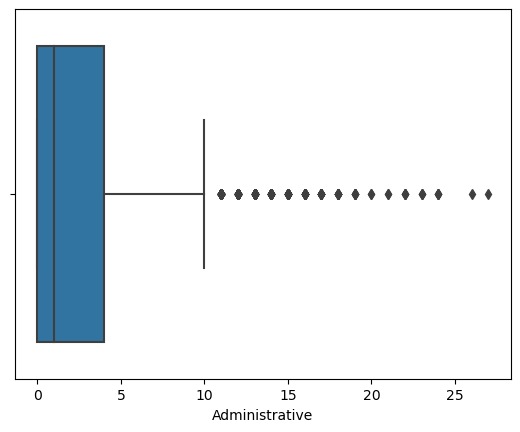

In [11]:
sns.boxplot(df['Administrative'])
plt.show()
#outliers are present above the upper whisker

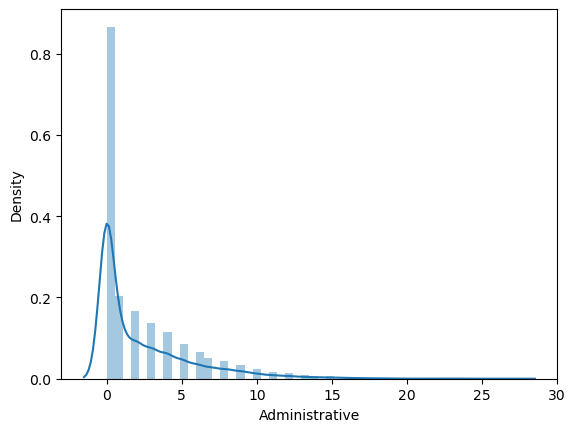

In [12]:
sns.distplot(df['Administrative'])
plt.show()
#right positive skewed distribution

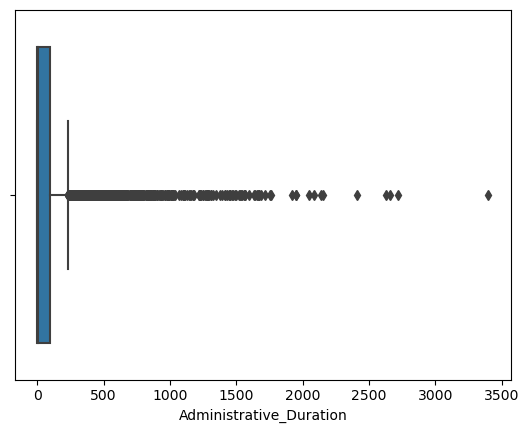

In [13]:
sns.boxplot(df['Administrative_Duration'])
plt.show()
#outliers and extreme values are present on upper whiskers

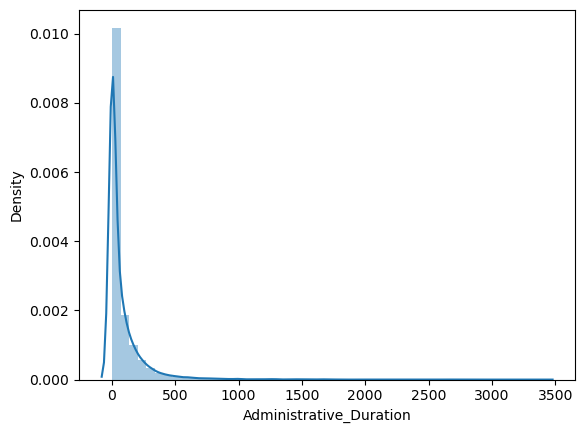

In [14]:
sns.distplot(df['Administrative_Duration'])
plt.show()
#right positive skewed distribution

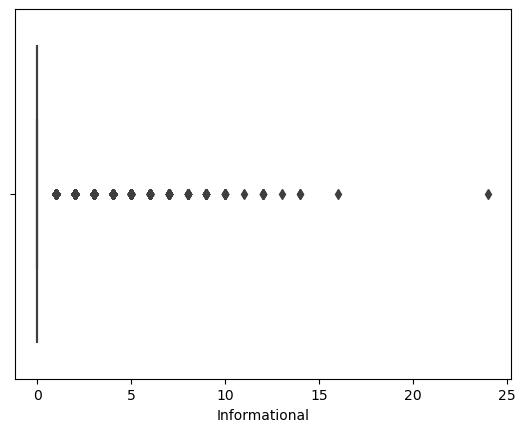

In [15]:
sns.boxplot(df['Informational'])
plt.show()
#outliers and extreme values are present on upper whisker

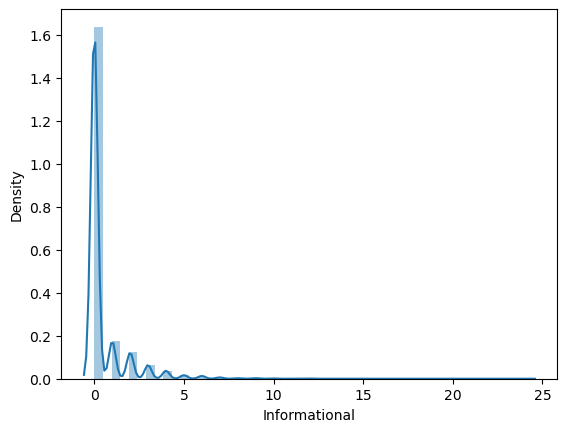

In [16]:
sns.distplot(df['Informational'])
plt.show()
#right positive skewed distribution 

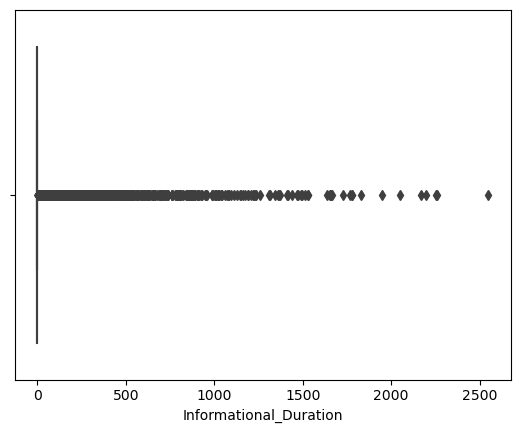

In [17]:
sns.boxplot(df['Informational_Duration'])
plt.show()
#outliers and extreme values are present on upper whisker

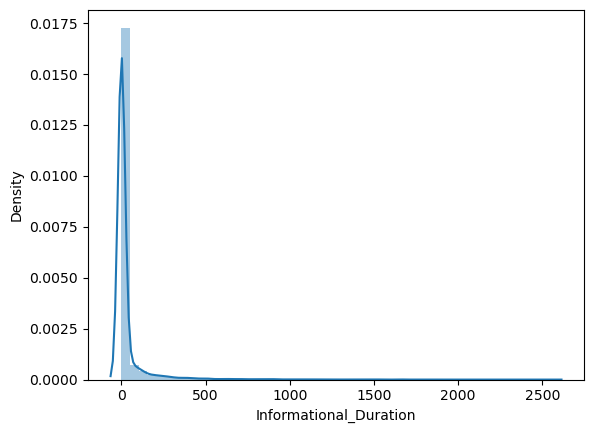

In [18]:
sns.distplot(df['Informational_Duration'])
plt.show()
#right positive skewed

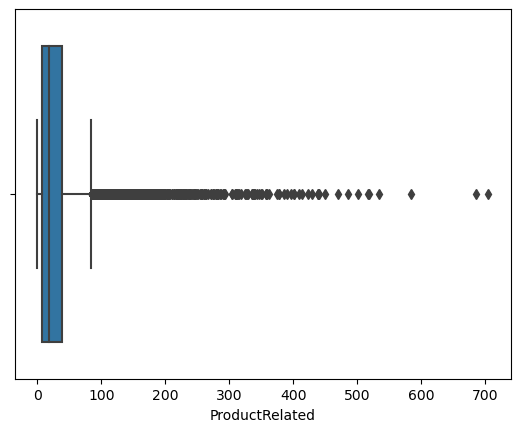

In [19]:
sns.boxplot(df['ProductRelated'])
plt.show()
#outliers and extreme values are present

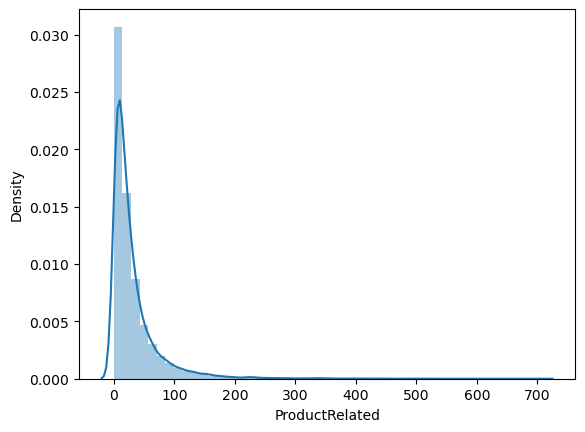

In [20]:
sns.distplot(df['ProductRelated'])
plt.show()
#right positive skewed distribution

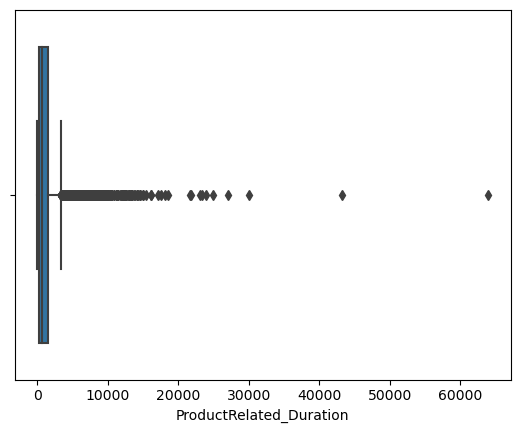

In [21]:
sns.boxplot(df['ProductRelated_Duration'])
plt.show()
#outliers and extreme values are present

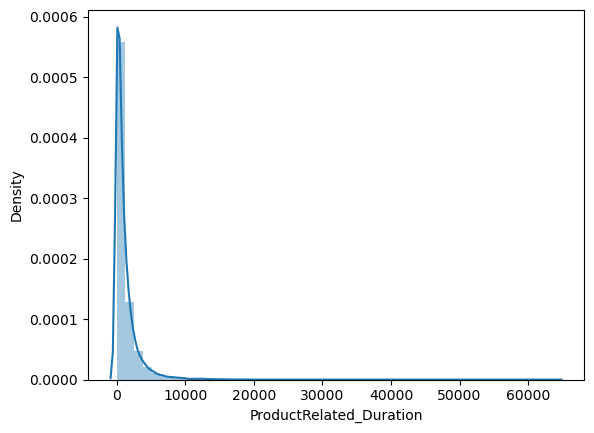

In [22]:
sns.distplot(df['ProductRelated_Duration'])
plt.show()
#right positive skewed distribution

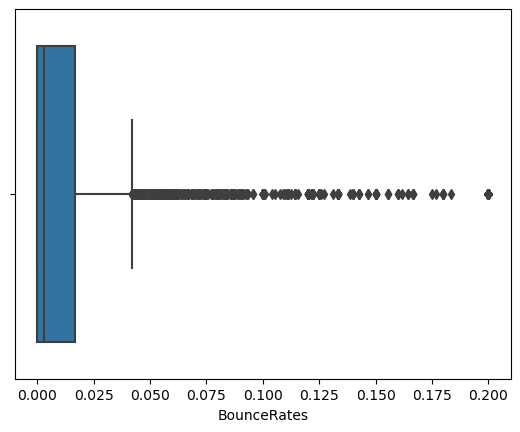

In [23]:
sns.boxplot(df['BounceRates'])
plt.show()
#ouliers are there

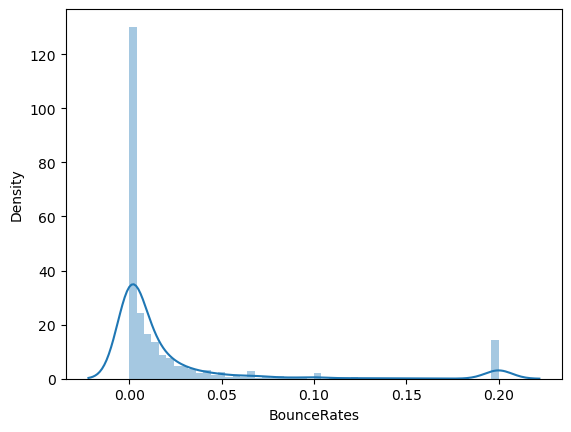

In [24]:
sns.distplot(df['BounceRates'])
plt.show()
#right positive skewed

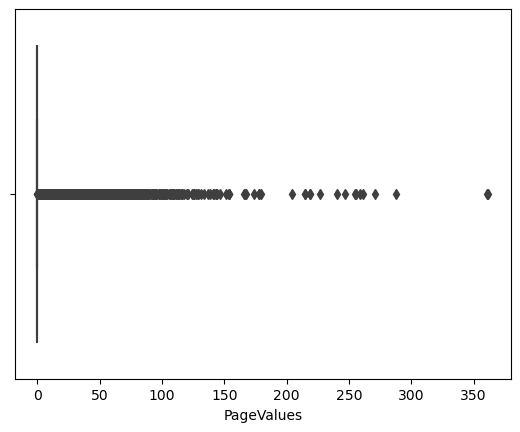

In [25]:
sns.boxplot(df['PageValues'])
plt.show()
#outliers are there

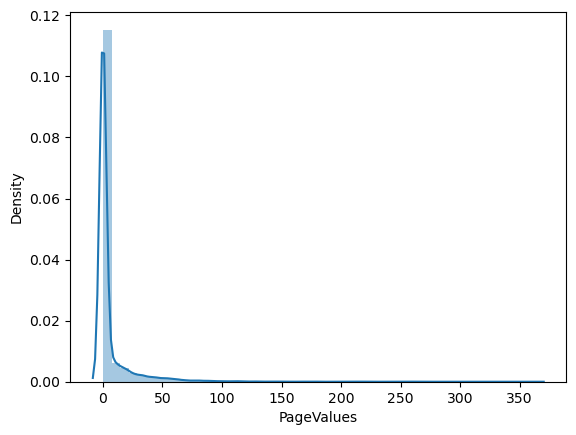

In [26]:
sns.distplot(df['PageValues'])
plt.show()
#right positive skewed

In [27]:
df_num.head(1)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                      0.0   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0          0.2        0.2         0.0         0.0                 1        1   

   Region  TrafficType  
0       1            1

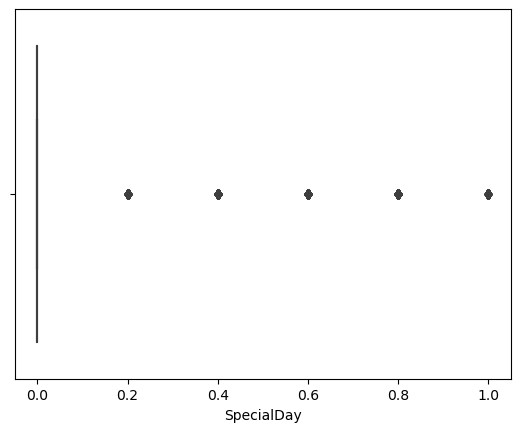

In [28]:
sns.boxplot(df['SpecialDay'])
plt.show()
#outliers are there

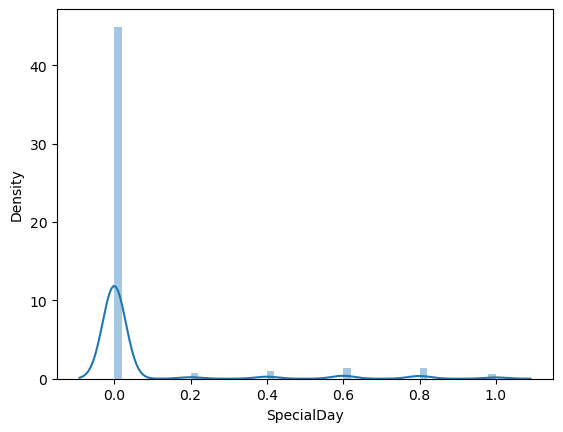

In [29]:
sns.distplot(df['SpecialDay'])
plt.show()
#right positive skewed

In [30]:
df_num.head(1)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                      0.0   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0          0.2        0.2         0.0         0.0                 1        1   

   Region  TrafficType  
0       1            1

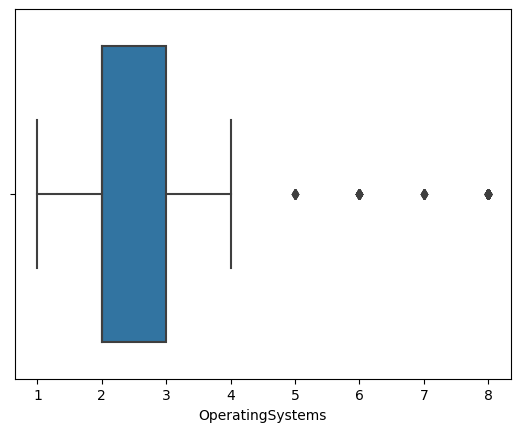

In [31]:
sns.boxplot(df['OperatingSystems'])
plt.show()

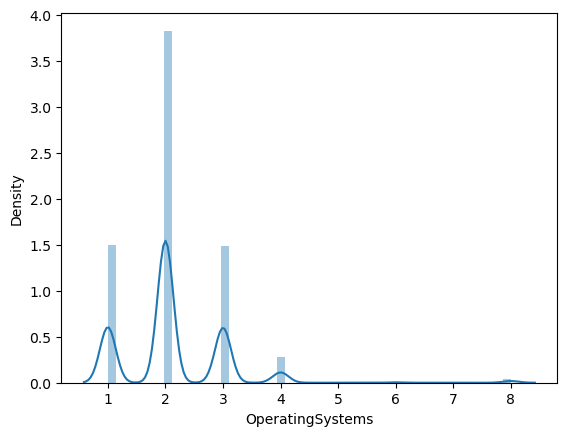

In [32]:
sns.distplot(df['OperatingSystems'])
plt.show()

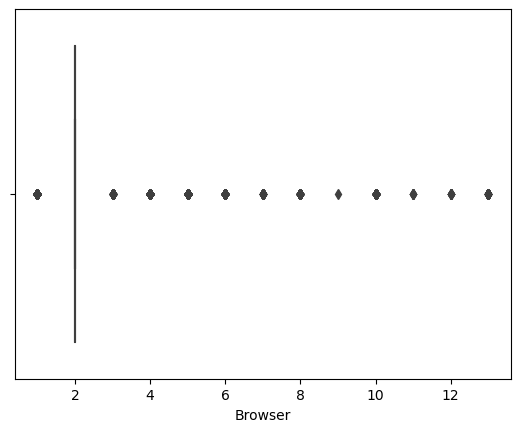

In [33]:
sns.boxplot(df['Browser'])
plt.show()

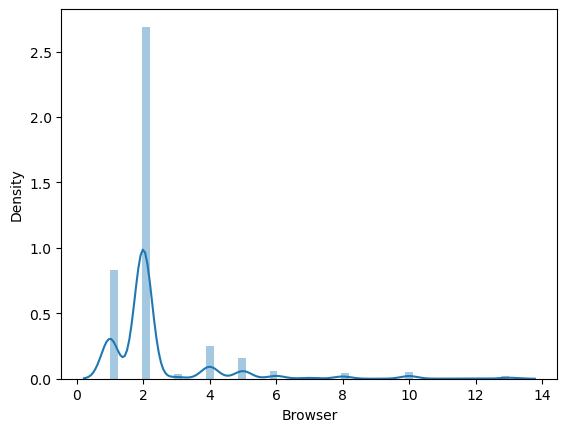

In [34]:
sns.distplot(df['Browser'])
plt.show()

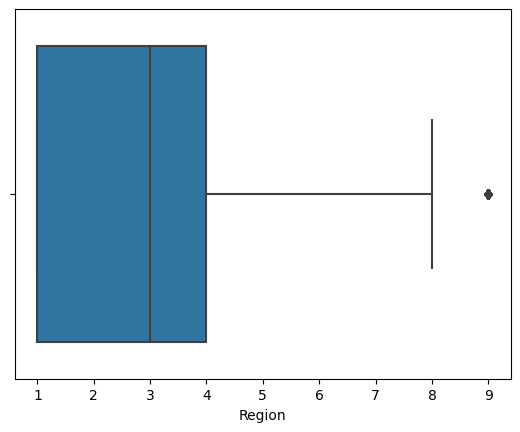

In [35]:
sns.boxplot(df['Region'])
plt.show()

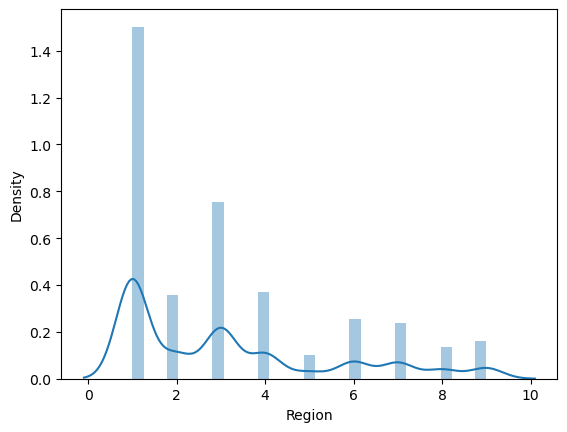

In [36]:
sns.distplot(df['Region'])
plt.show()

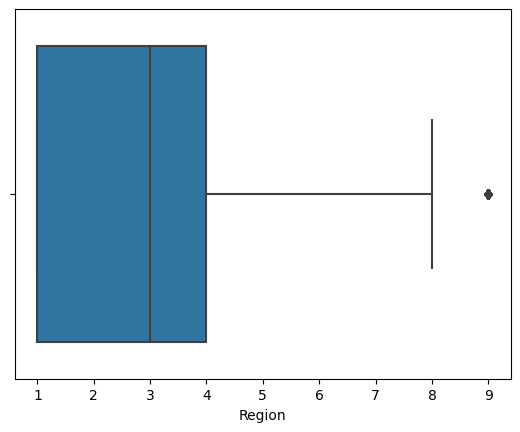

In [37]:
sns.boxplot(df['Region'])
plt.show()

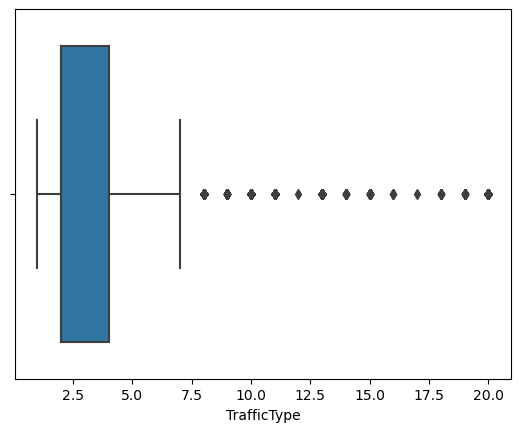

In [38]:

sns.boxplot(df['TrafficType'])
plt.show()

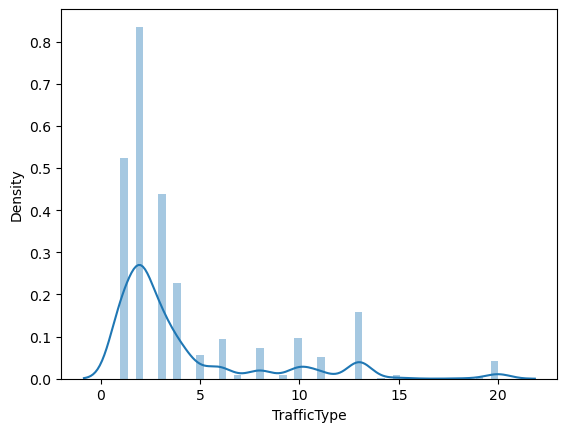

In [39]:
sns.distplot(df['TrafficType'])
plt.show()

In [40]:
df_cat=df.select_dtypes(include='object')
df_cat.head(1)

Month        VisitorType Weekend Revenue
0   Feb  Returning_Visitor   False   False

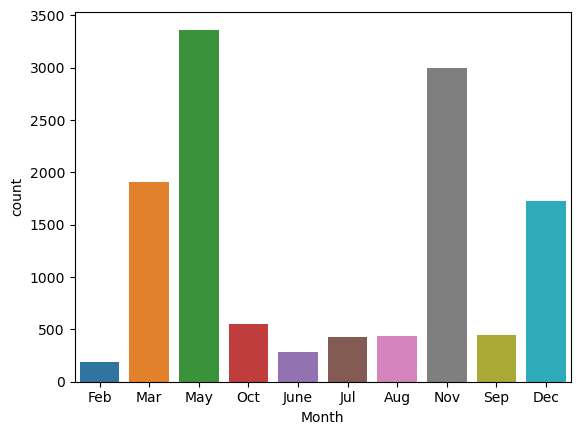

In [41]:
sns.countplot(df['Month'])
plt.show()
#values are imbalance

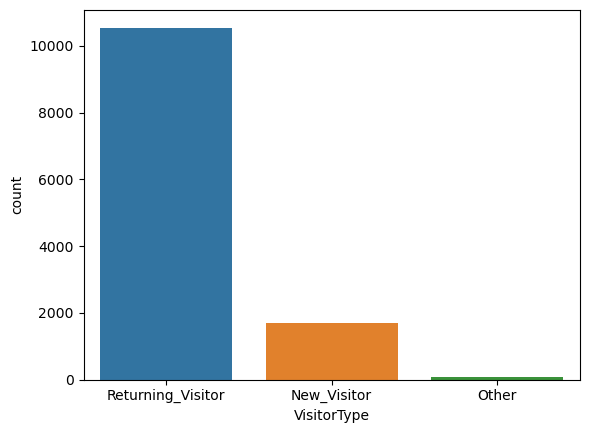

In [42]:
sns.countplot(df['VisitorType'])
plt.show()
#values are imbalance

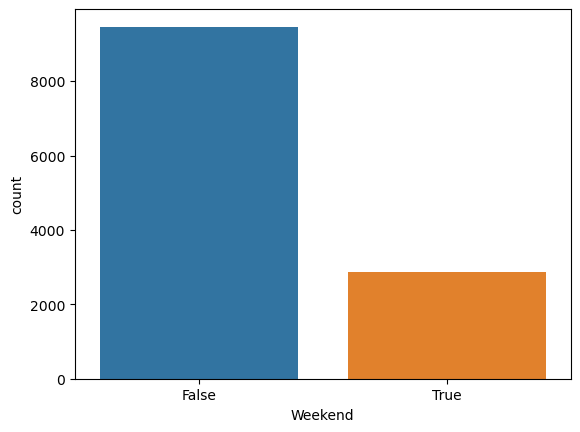

In [43]:
sns.countplot(df['Weekend'])
plt.show()
#values are imbalance

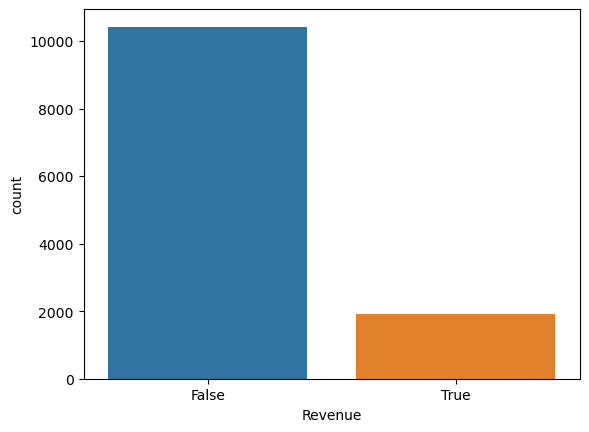

In [44]:
sns.countplot(df['Revenue'])
plt.show()
#values are imbalance

Bivariant analysis

In [45]:
df_num.head(1)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                      0.0   

   BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  Browser  \
0          0.2        0.2         0.0         0.0                 1        1   

   Region  TrafficType  
0       1            1

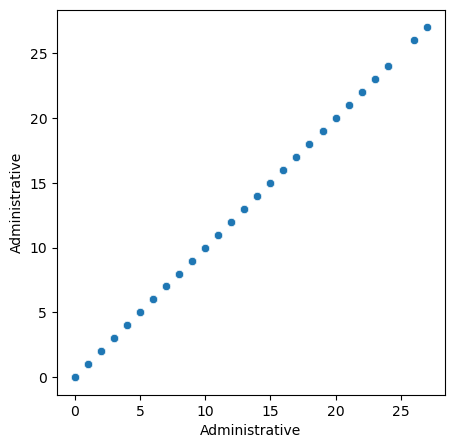

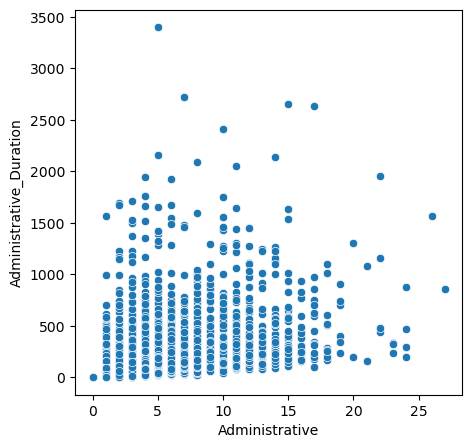

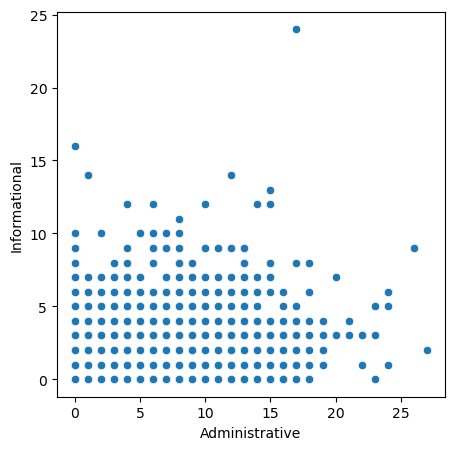

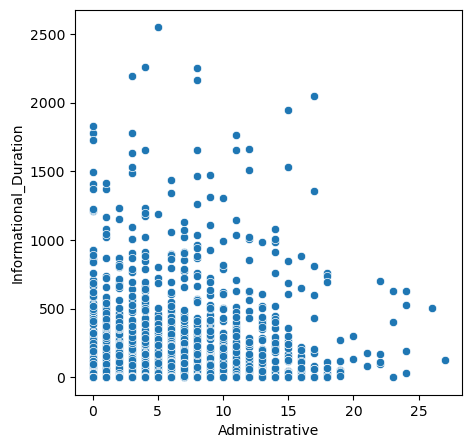

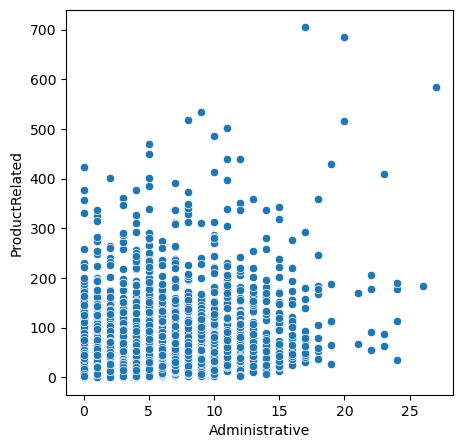

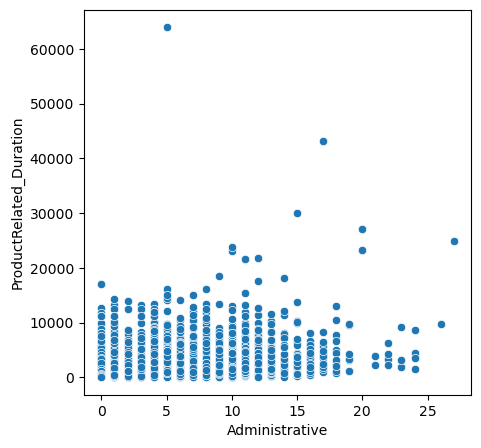

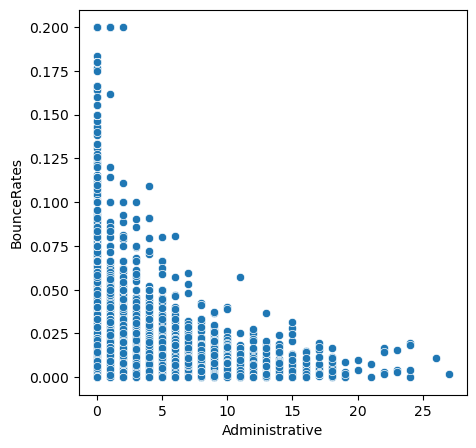

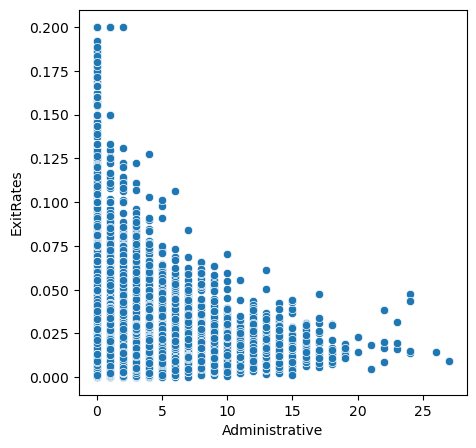

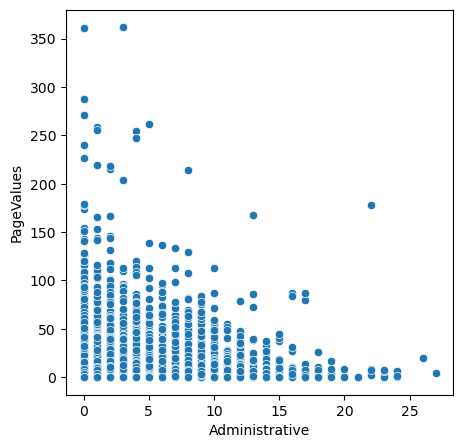

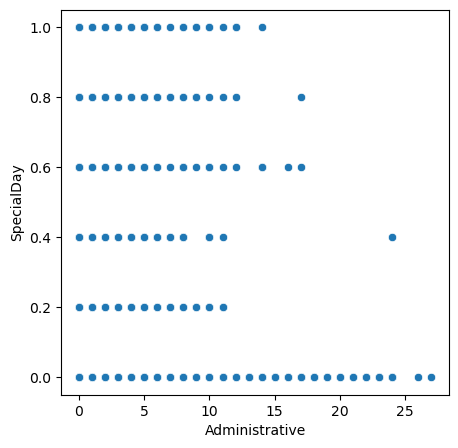

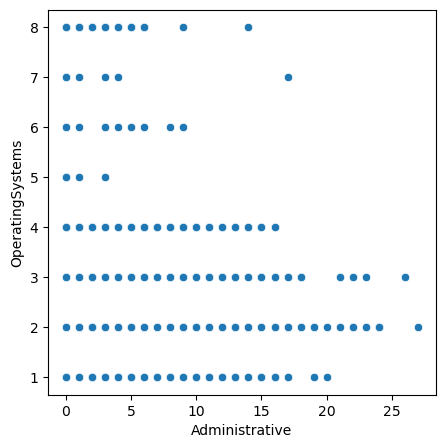

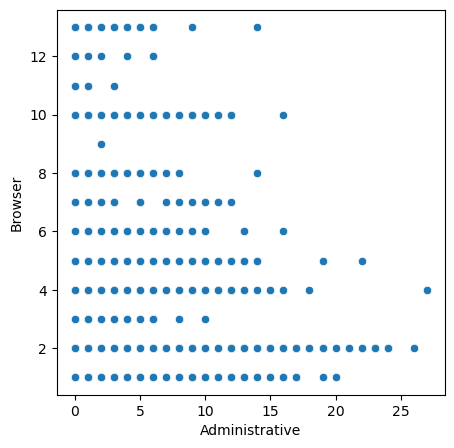

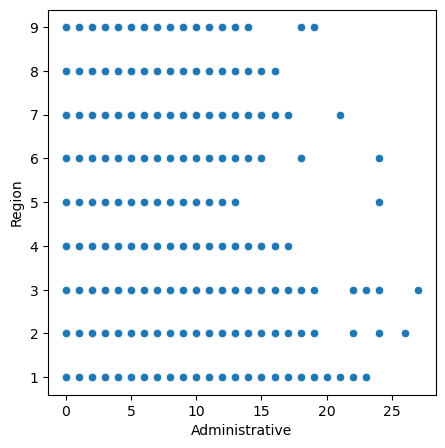

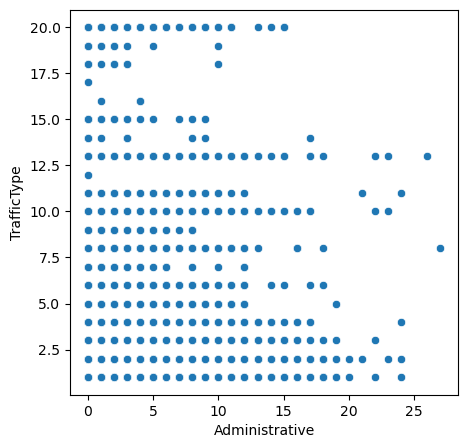

In [46]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["Administrative"], y=df[i])
    plt.show()

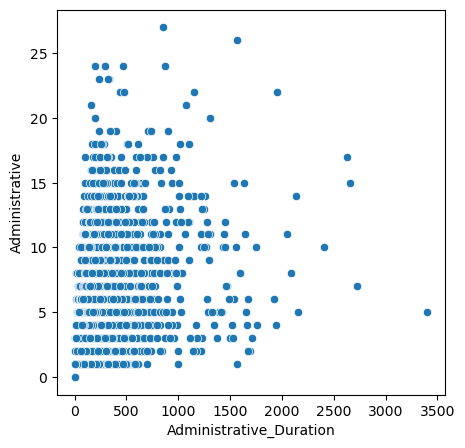

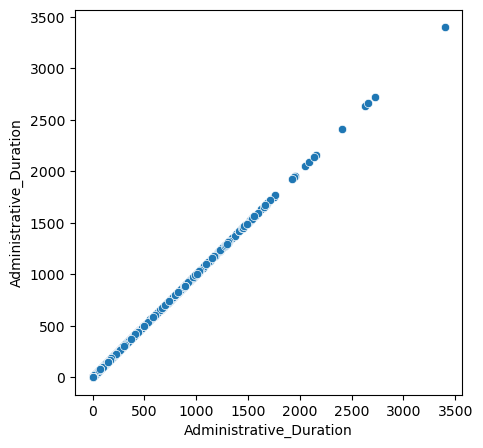

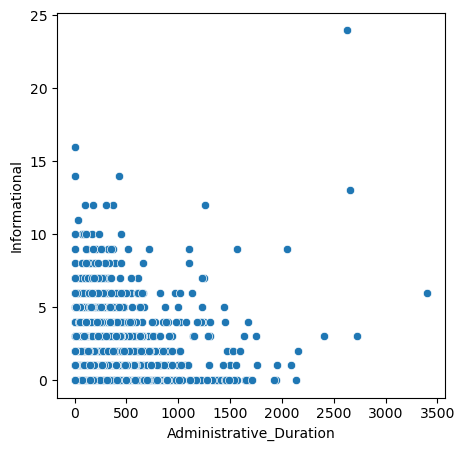

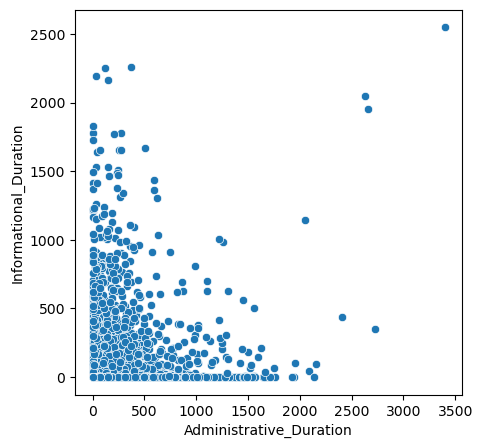

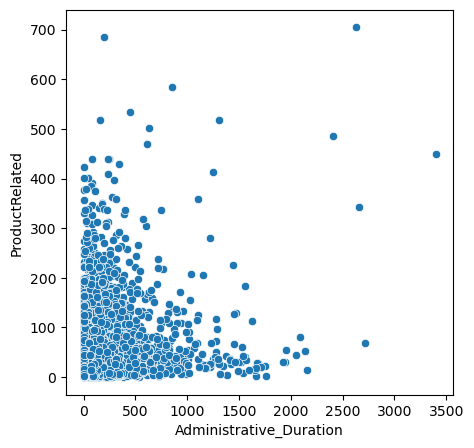

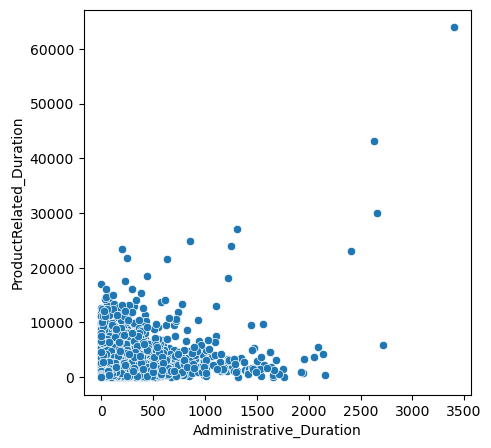

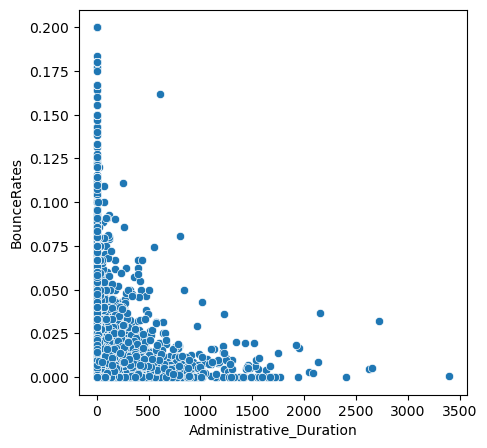

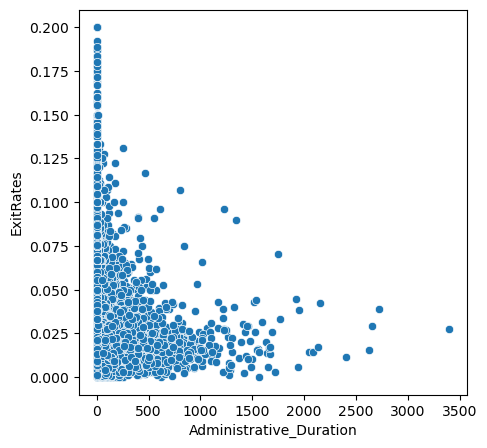

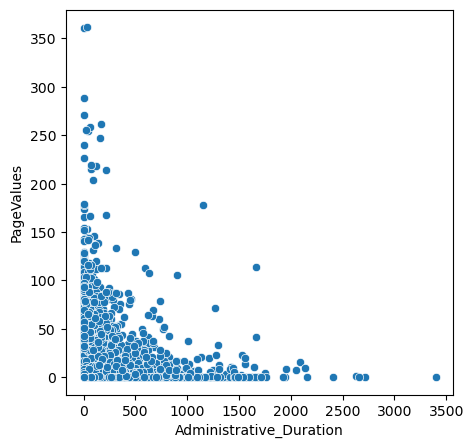

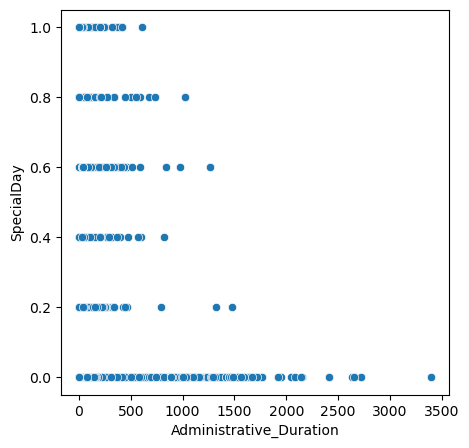

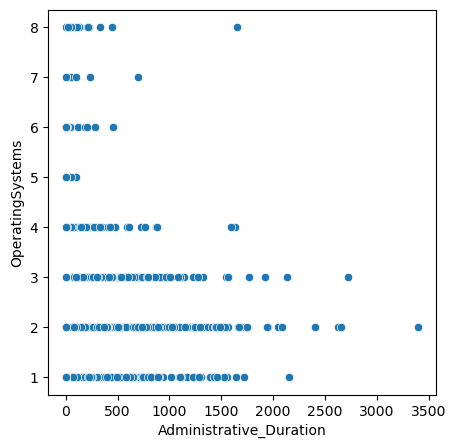

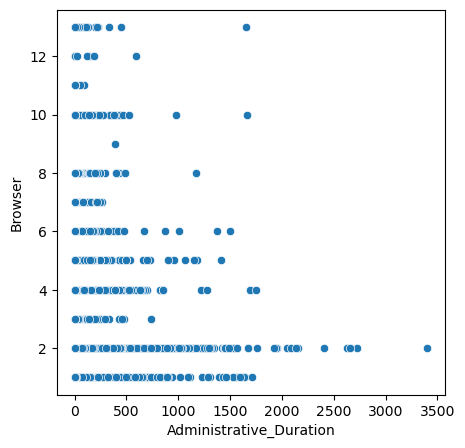

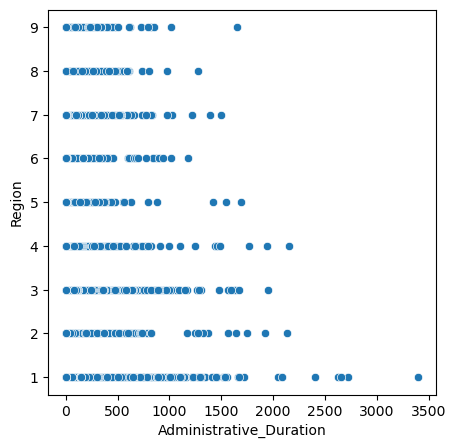

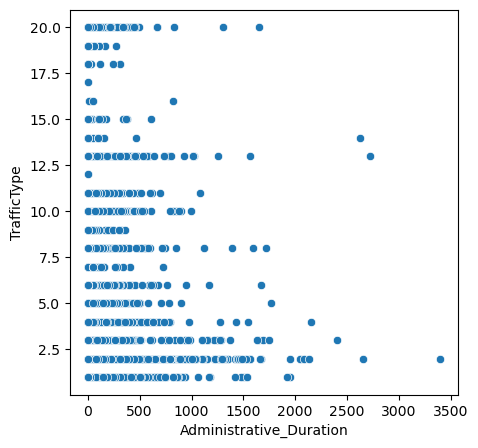

In [47]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["Administrative_Duration"], y=df[i])
    plt.show()

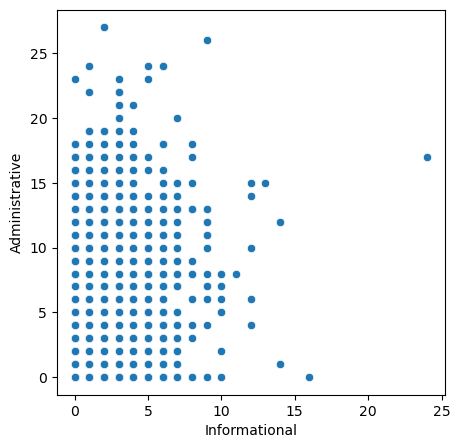

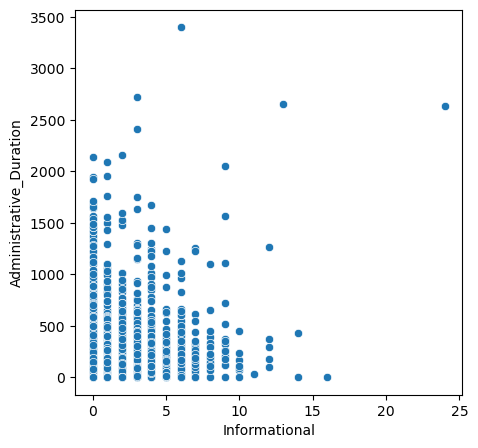

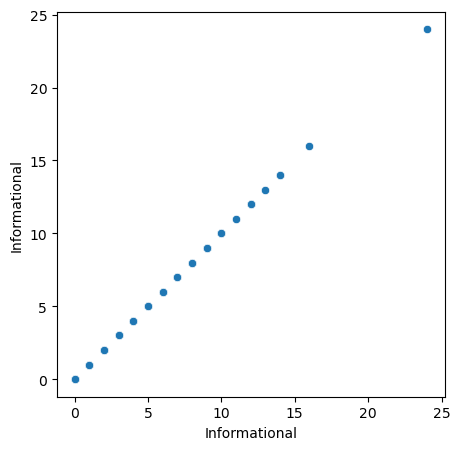

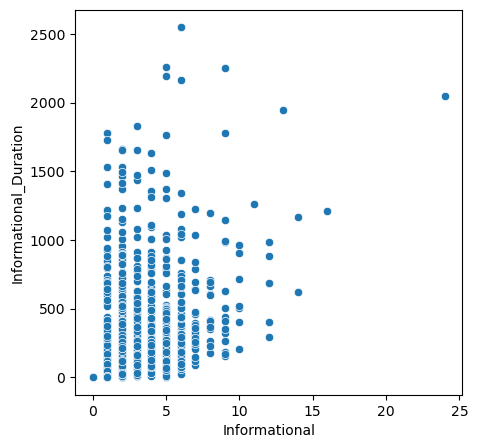

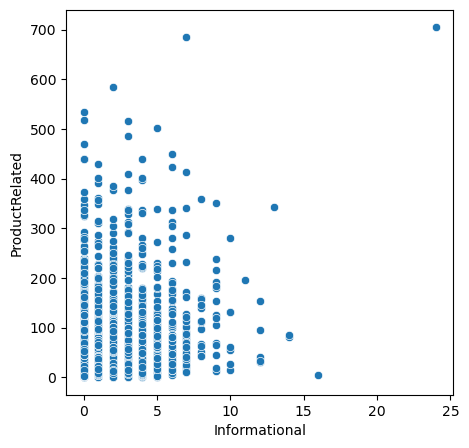

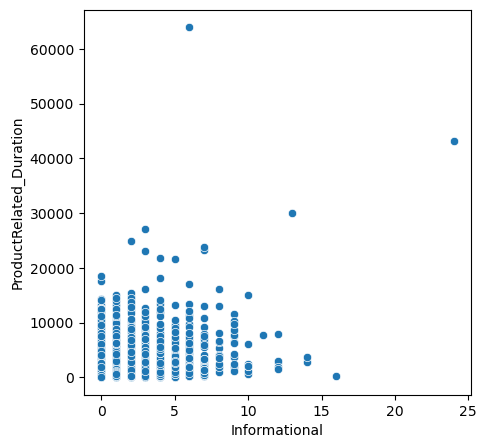

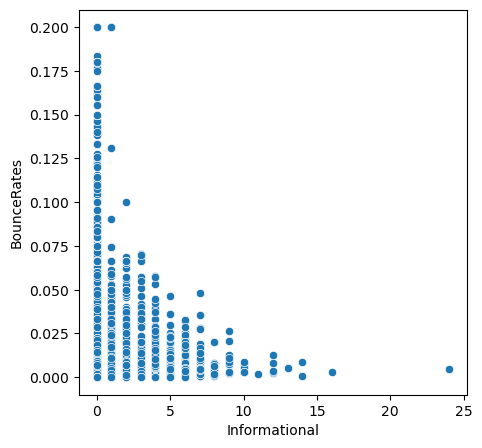

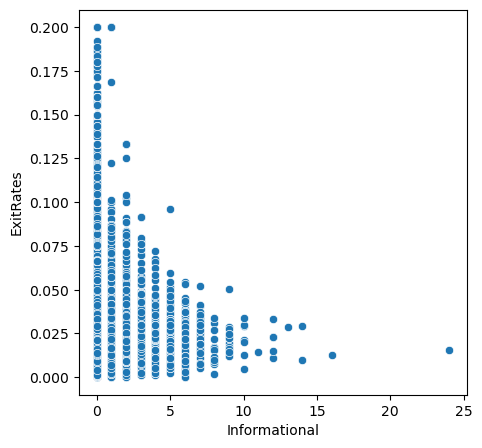

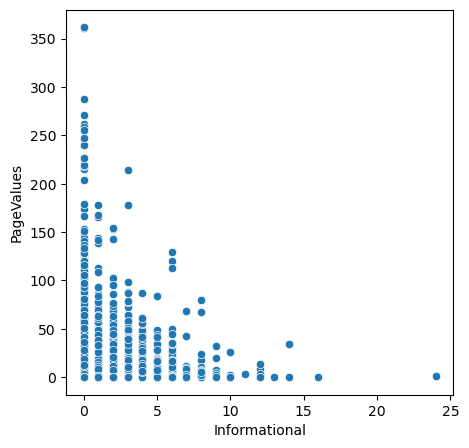

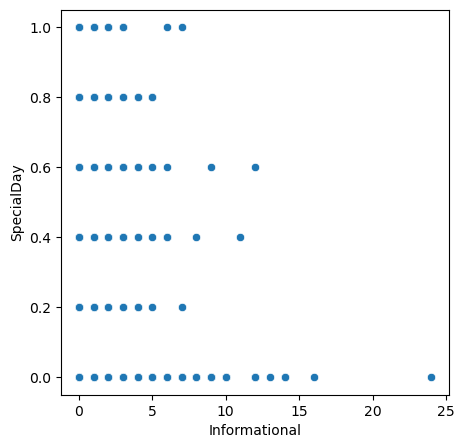

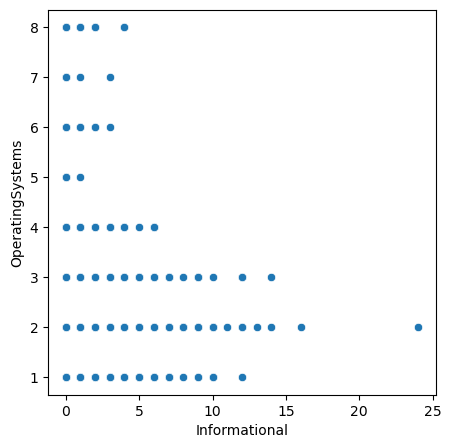

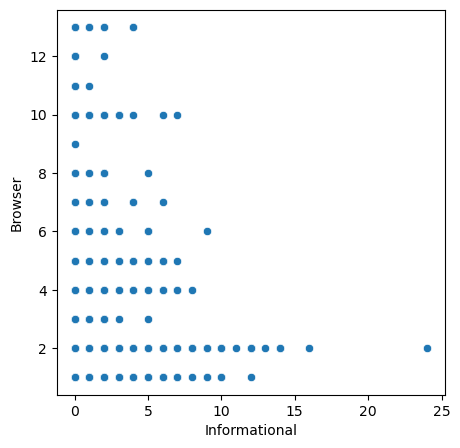

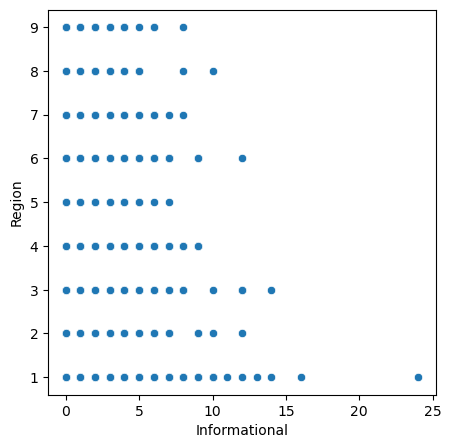

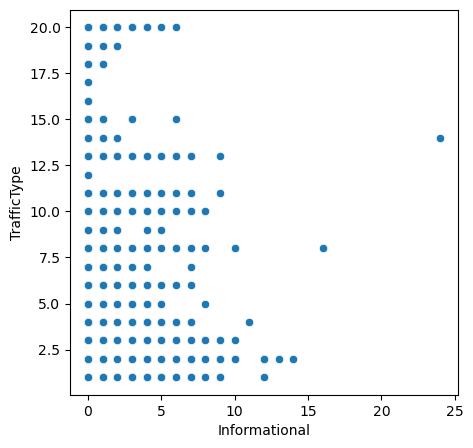

In [48]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["Informational"], y=df[i])
    plt.show()

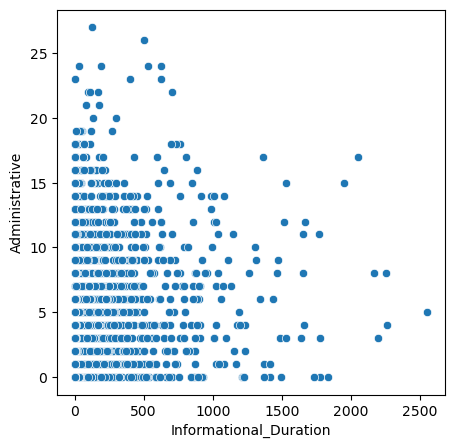

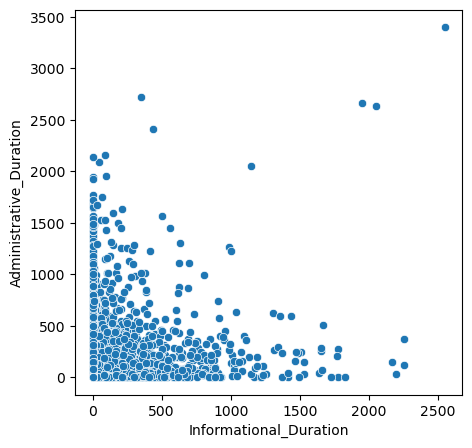

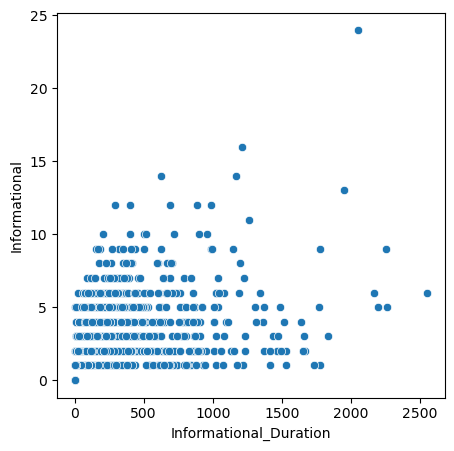

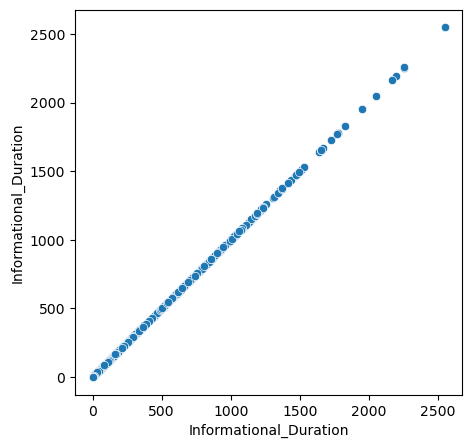

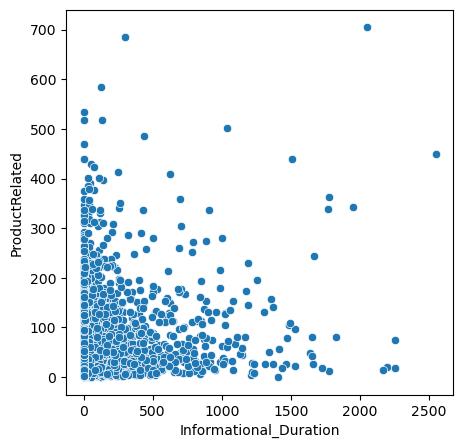

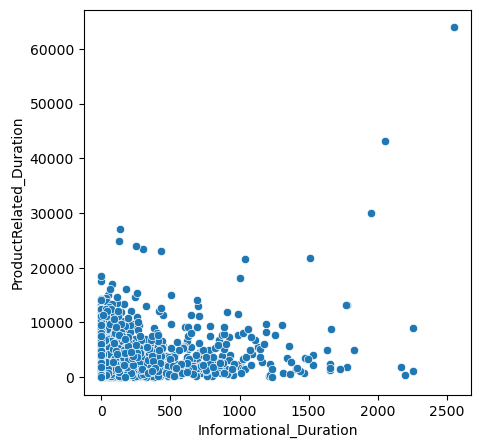

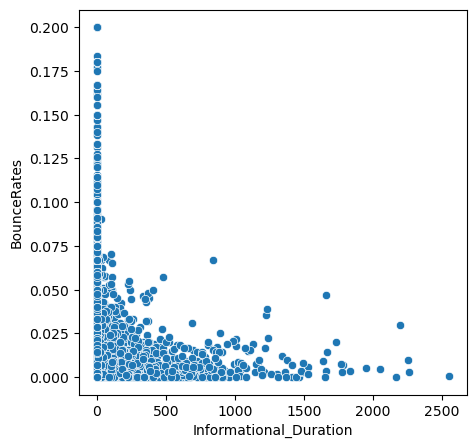

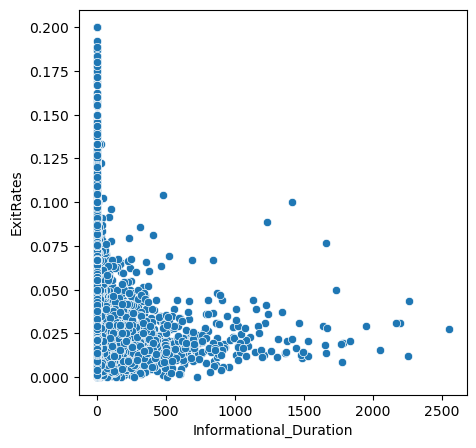

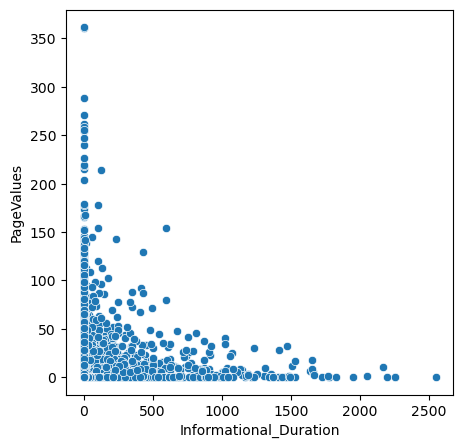

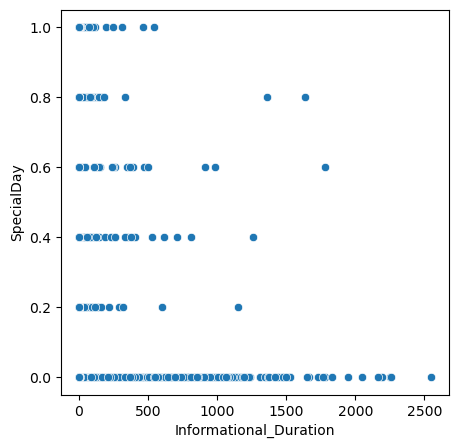

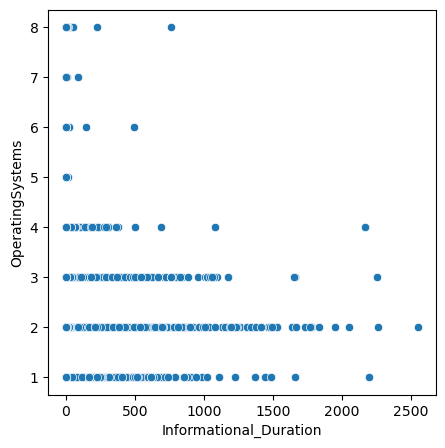

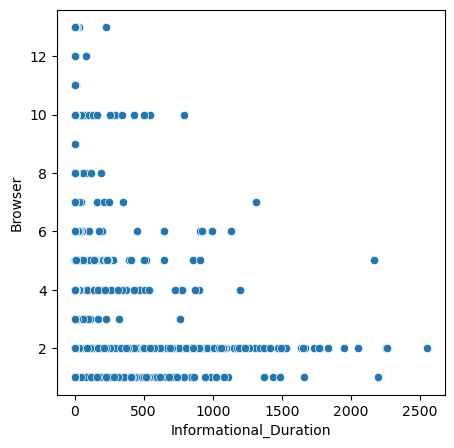

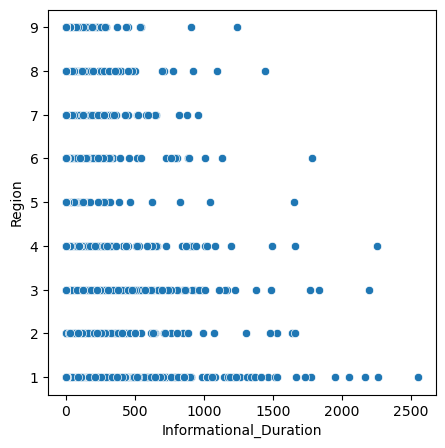

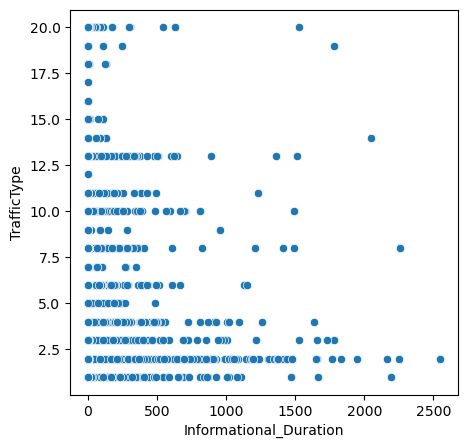

In [49]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["Informational_Duration"], y=df[i])
    plt.show()

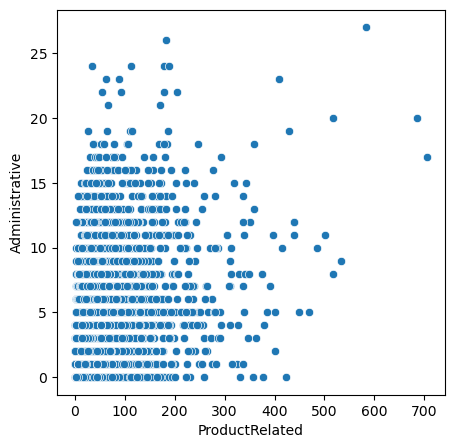

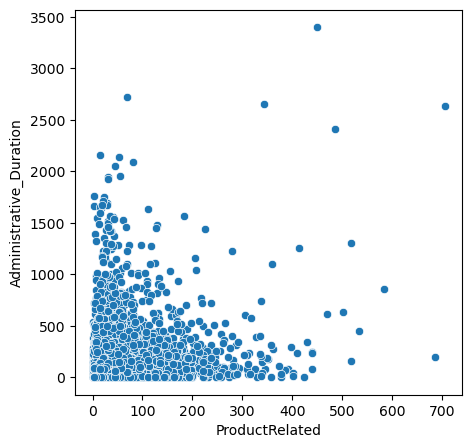

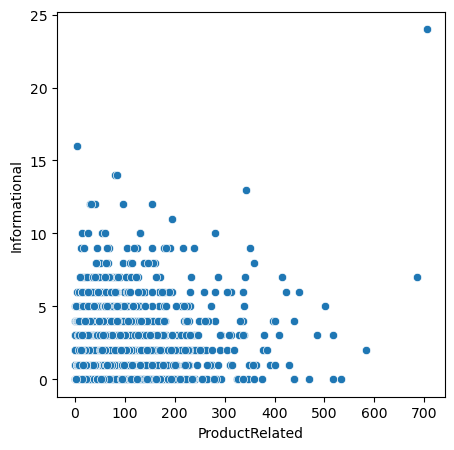

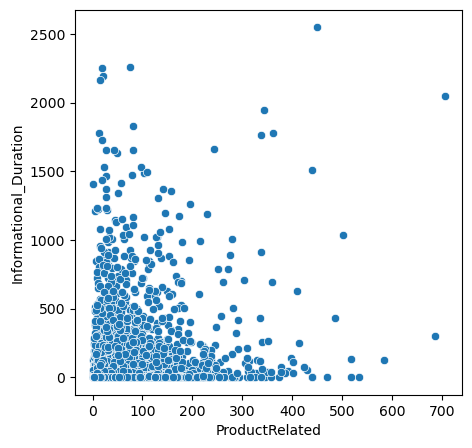

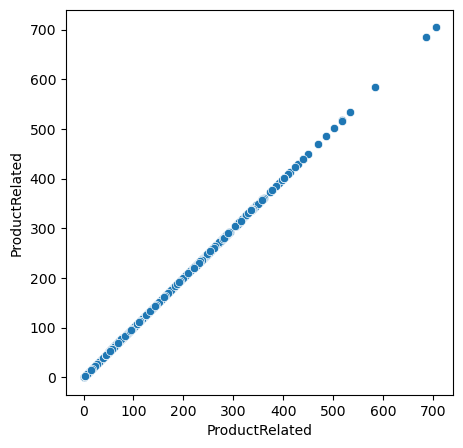

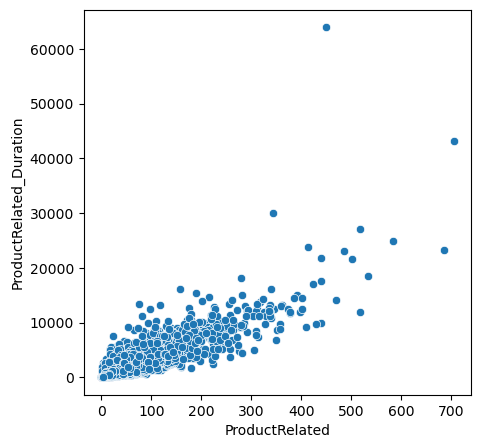

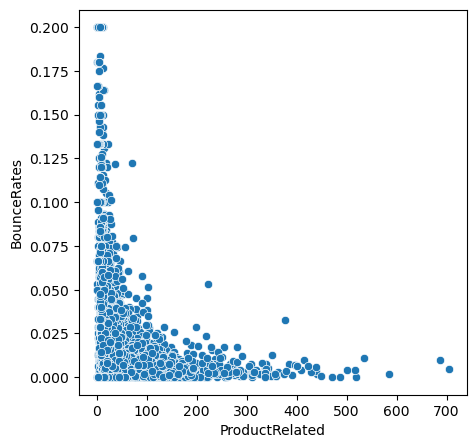

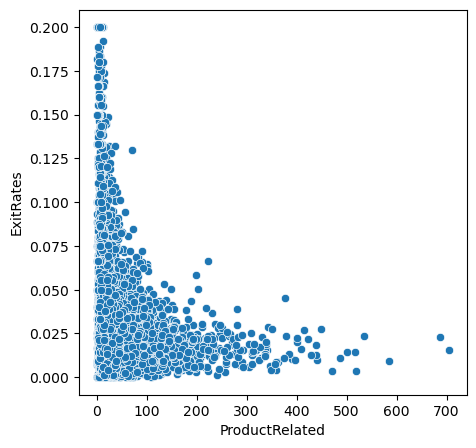

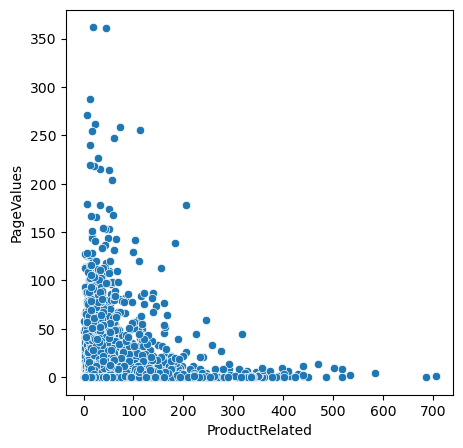

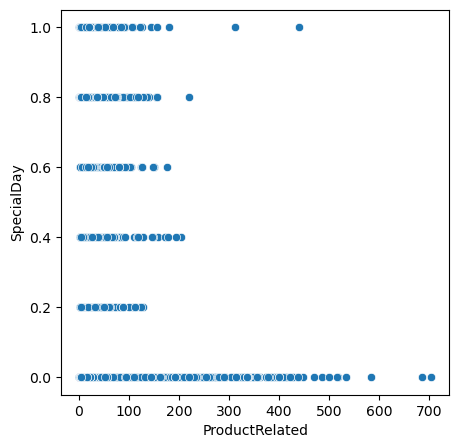

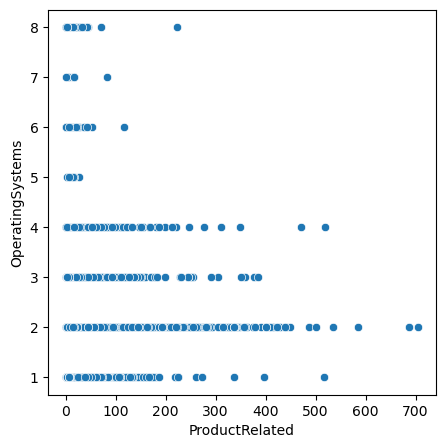

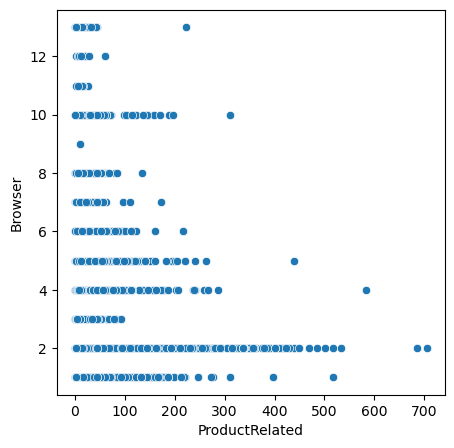

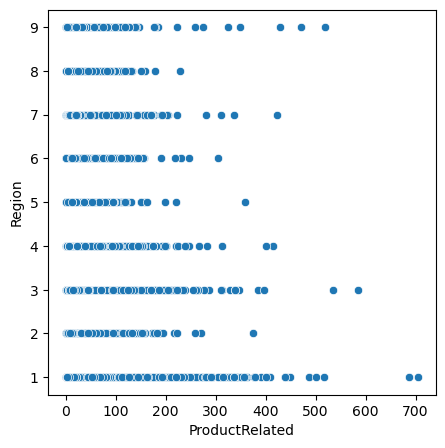

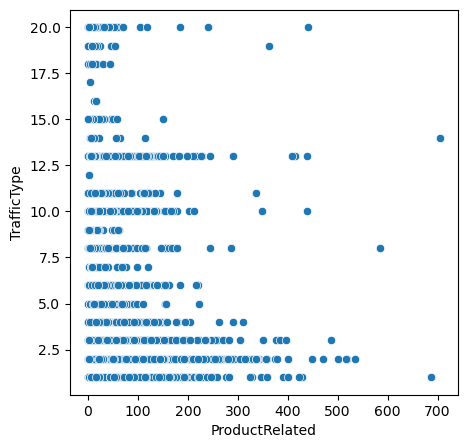

In [50]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["ProductRelated"], y=df[i])
    plt.show()

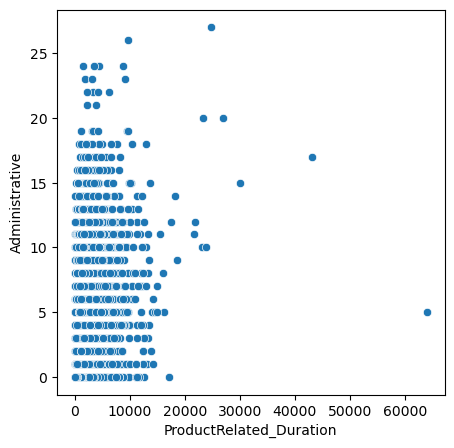

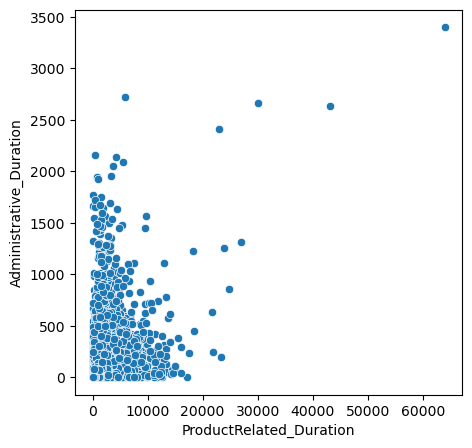

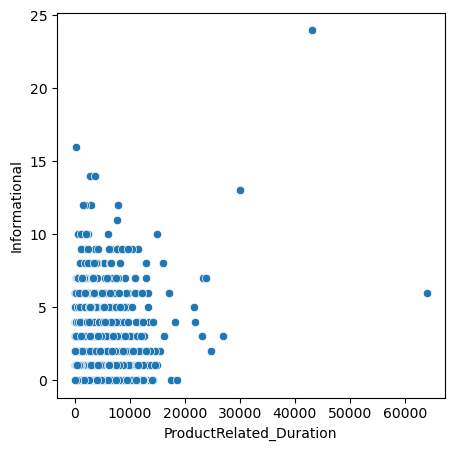

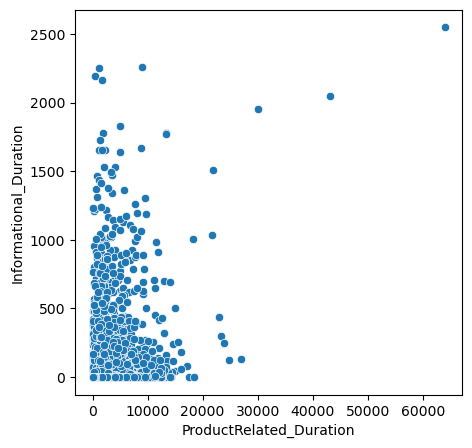

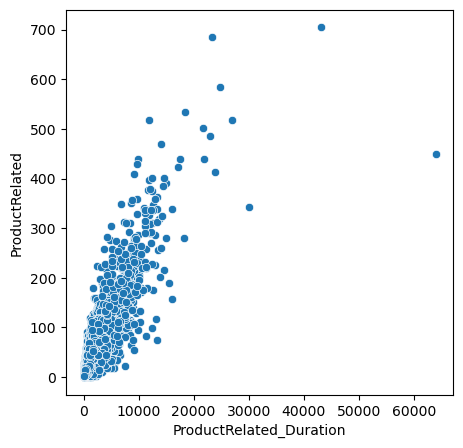

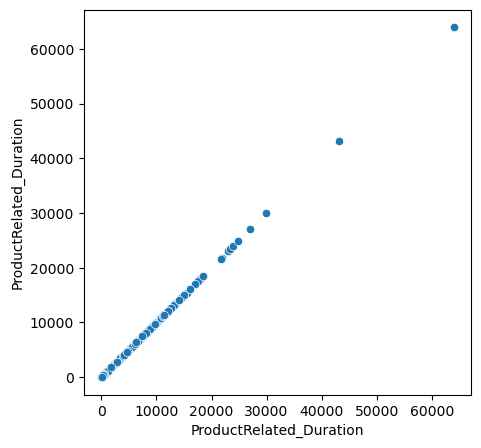

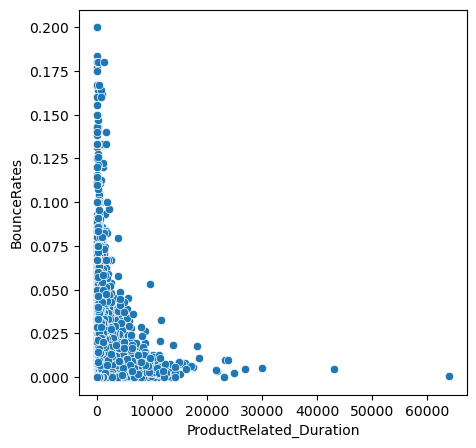

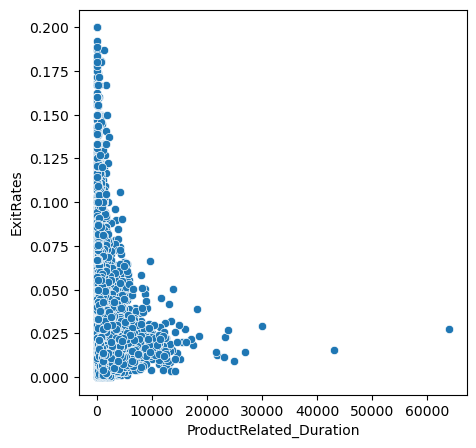

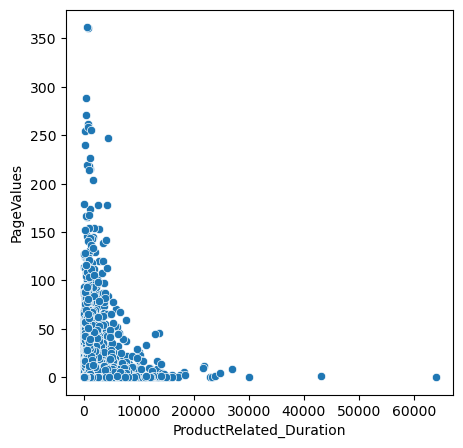

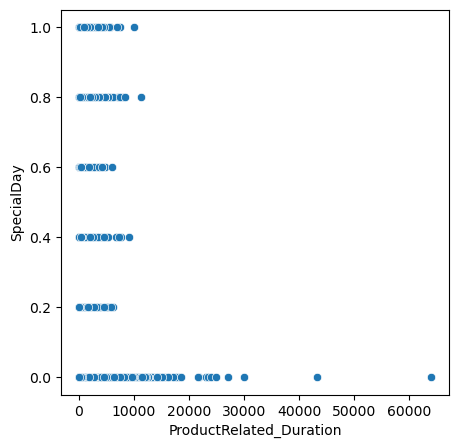

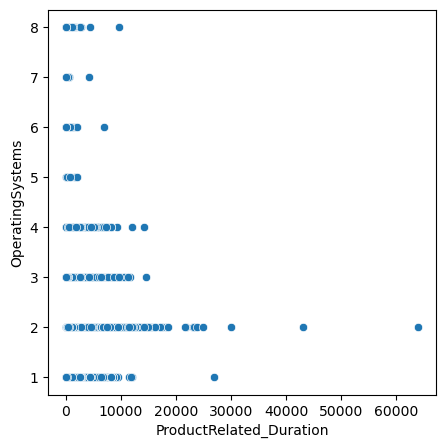

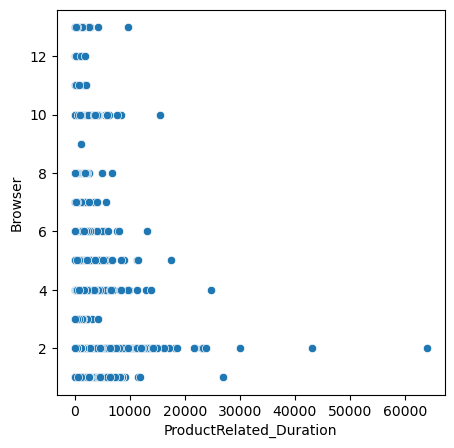

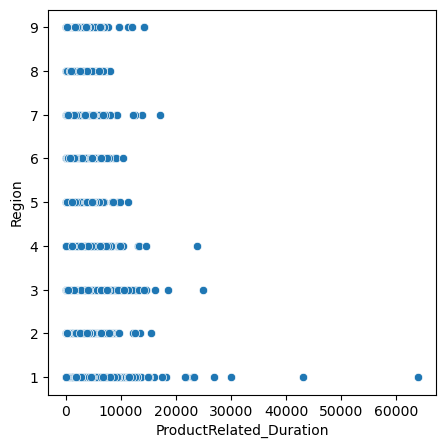

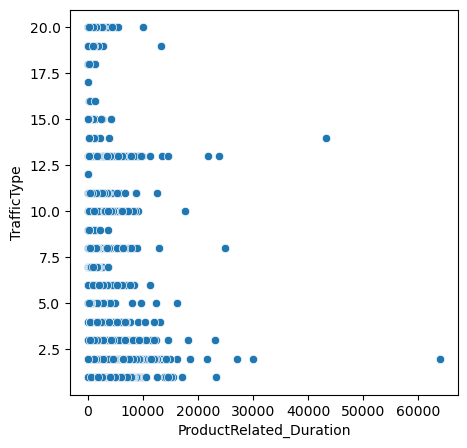

In [51]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["ProductRelated_Duration"], y=df[i])
    plt.show()

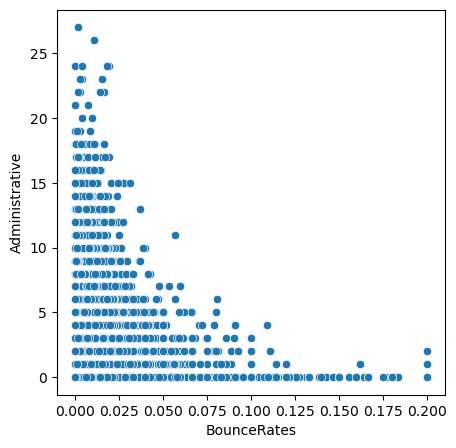

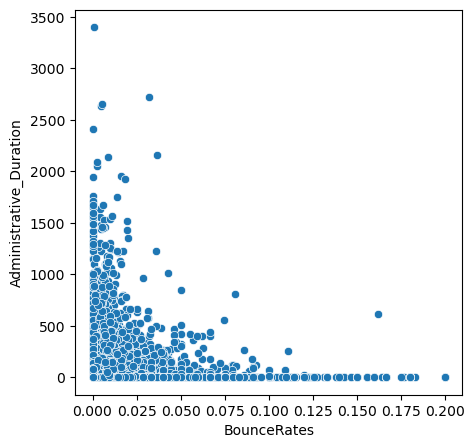

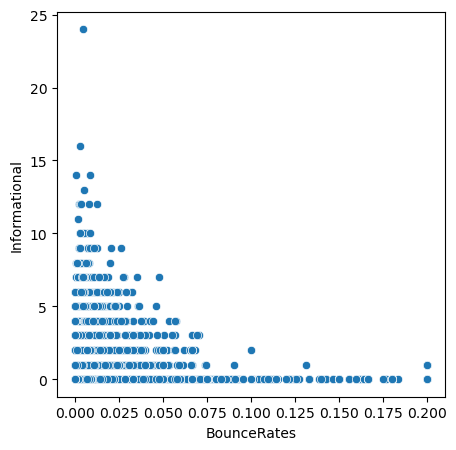

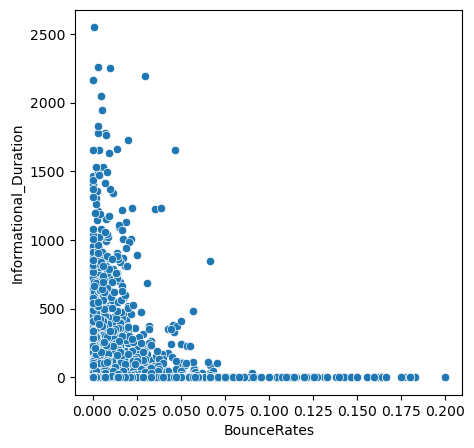

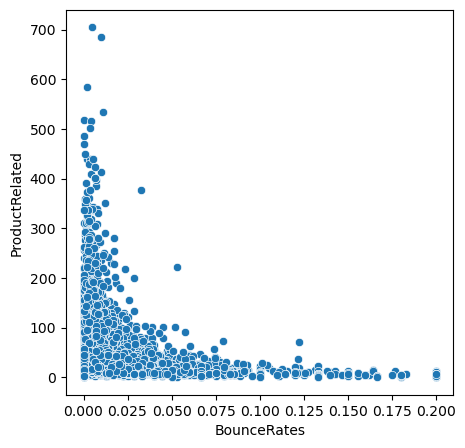

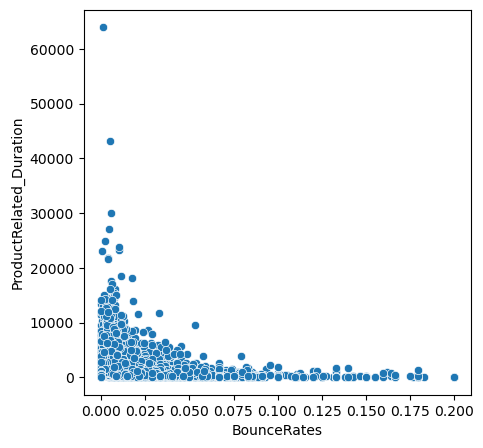

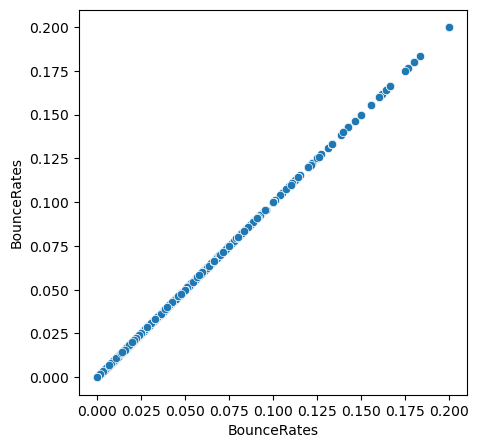

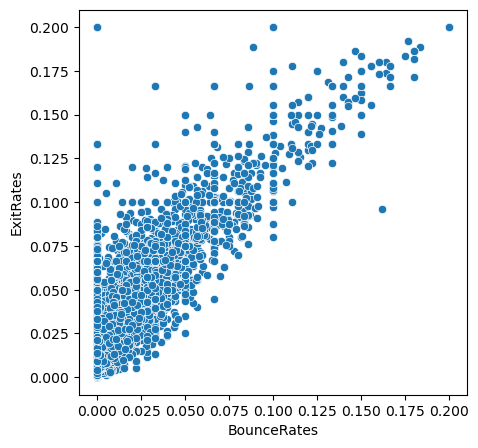

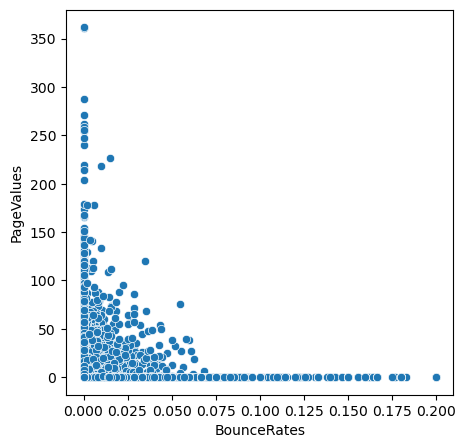

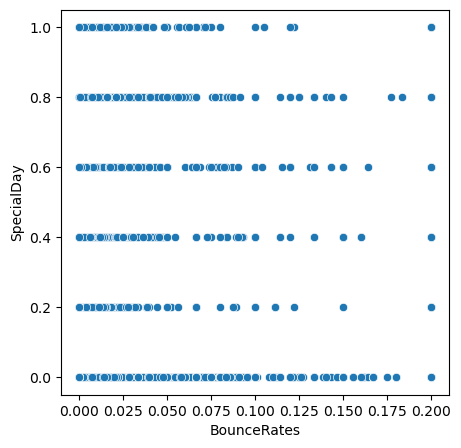

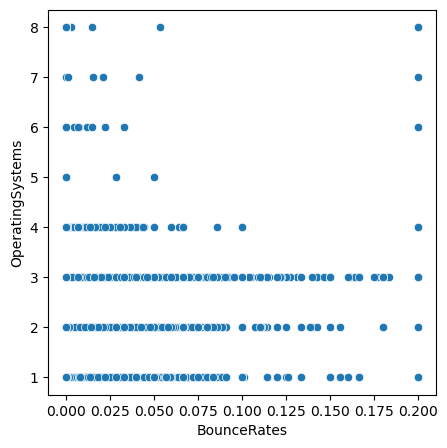

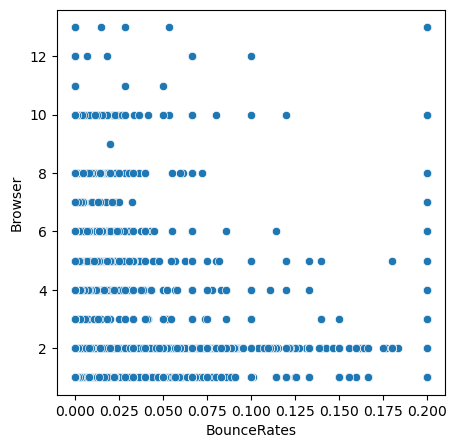

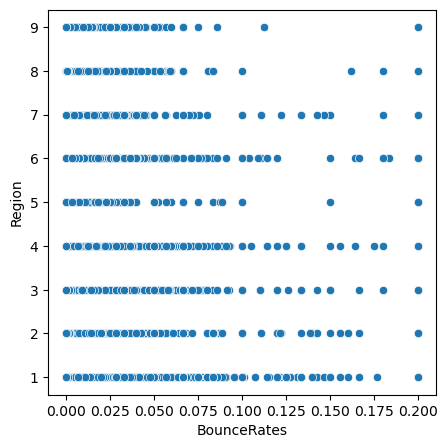

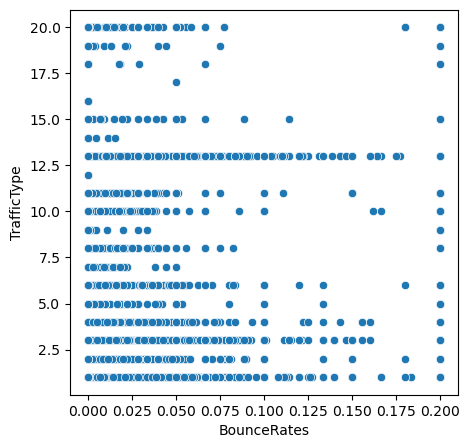

In [52]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["BounceRates"], y=df[i])
    plt.show()

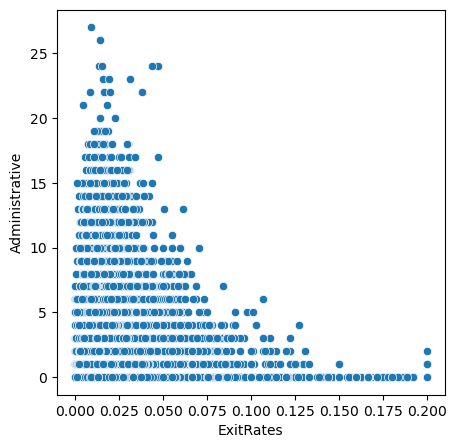

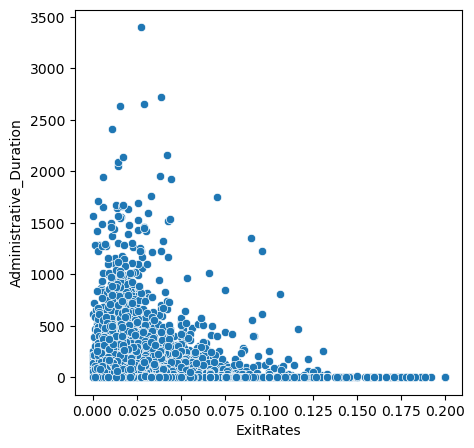

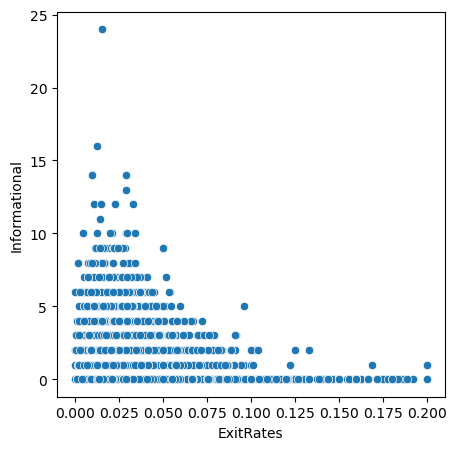

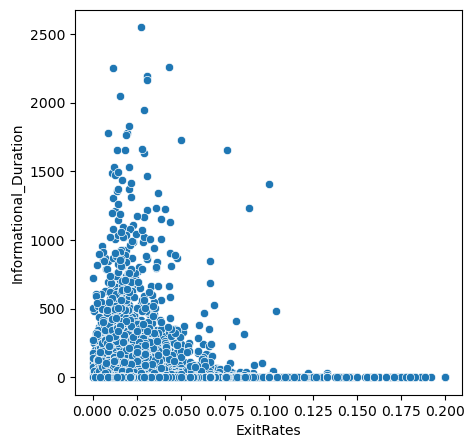

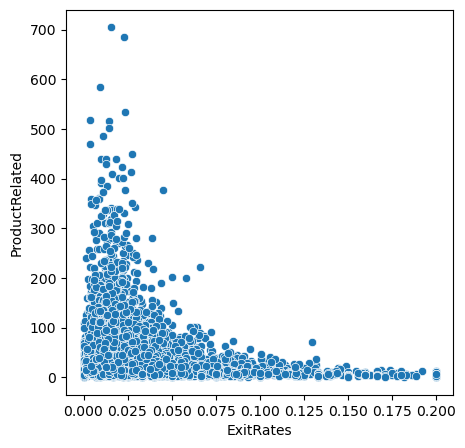

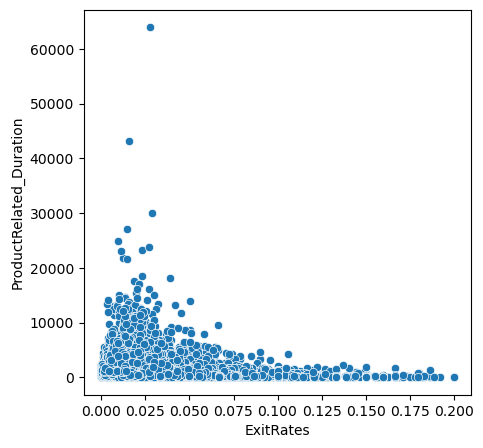

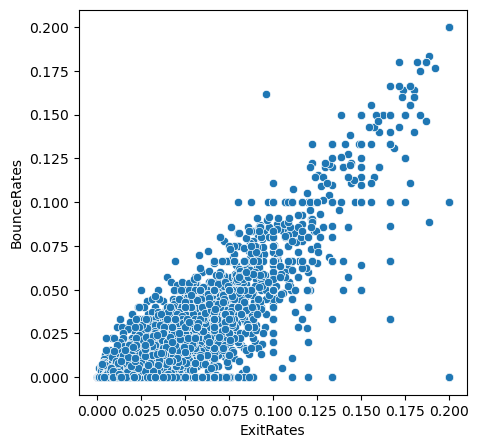

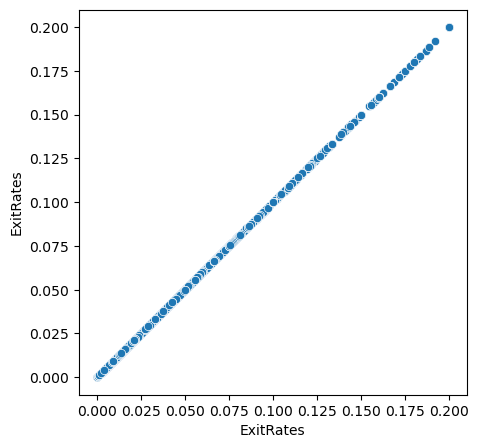

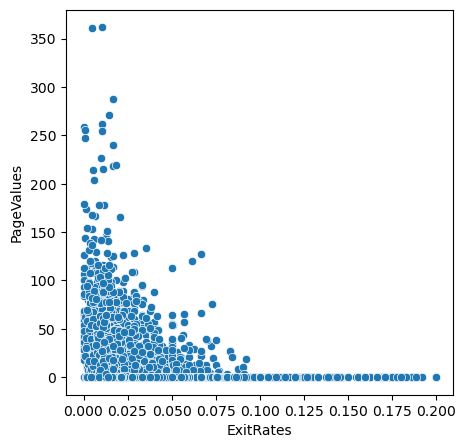

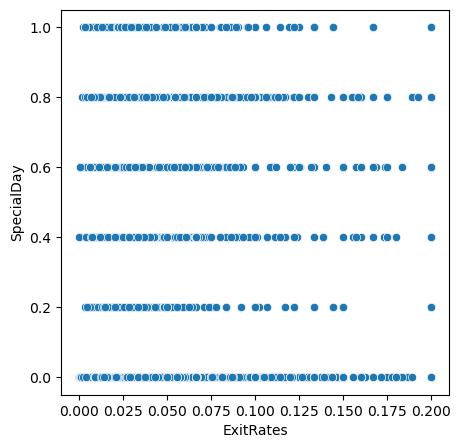

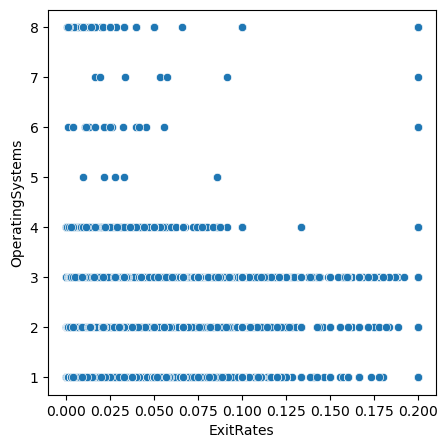

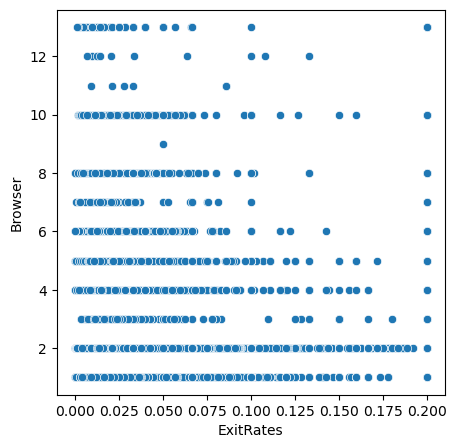

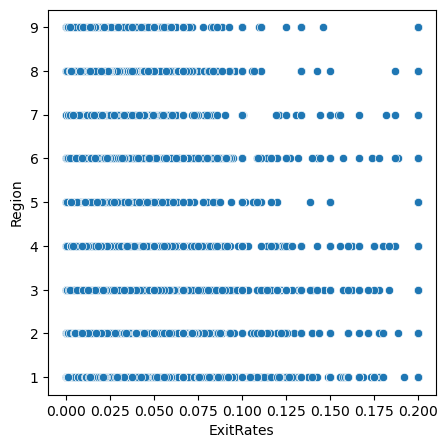

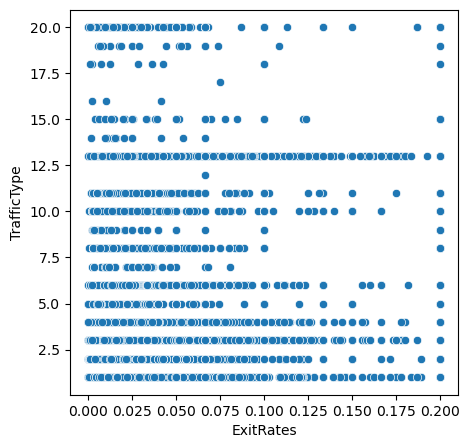

In [53]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["ExitRates"], y=df[i])
    plt.show()

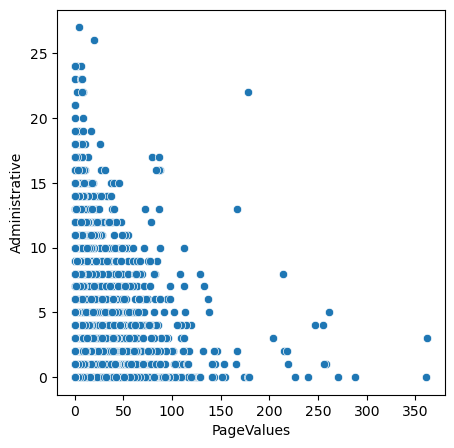

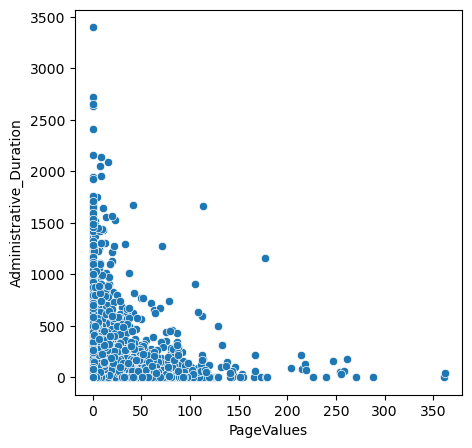

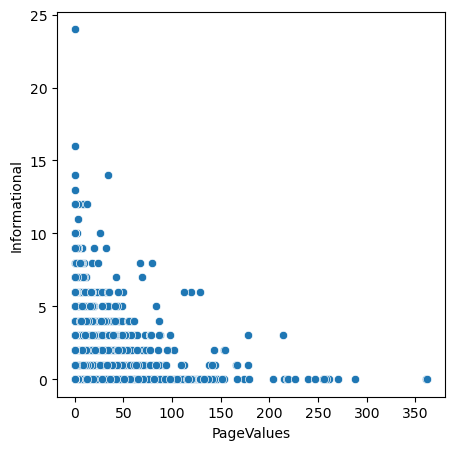

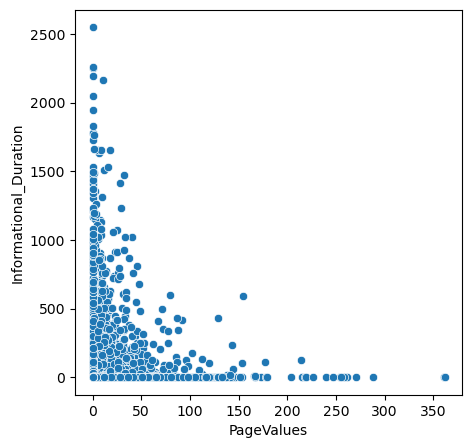

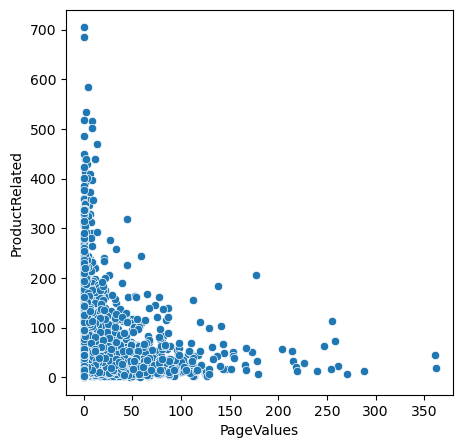

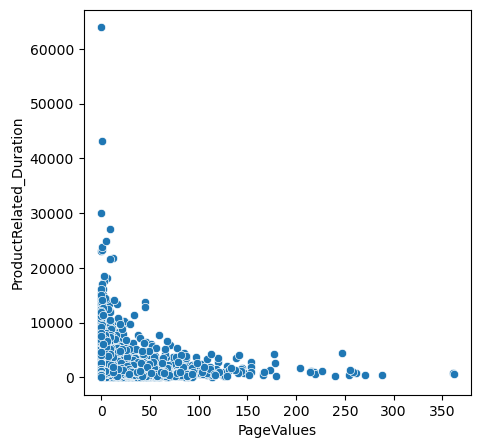

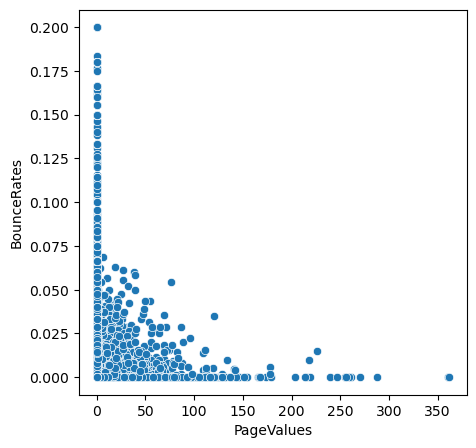

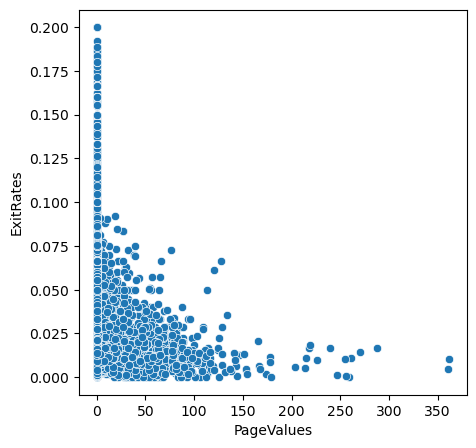

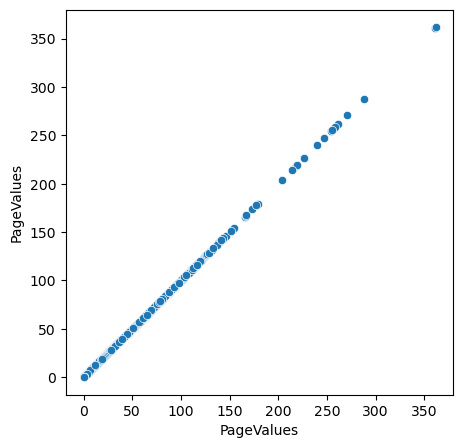

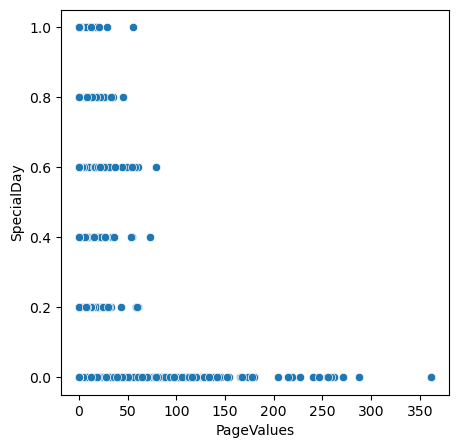

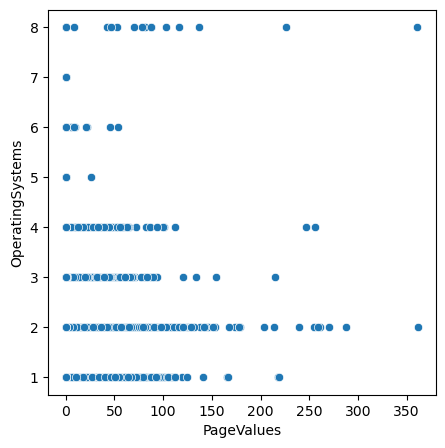

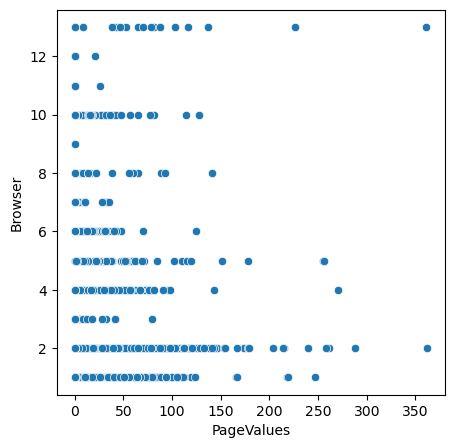

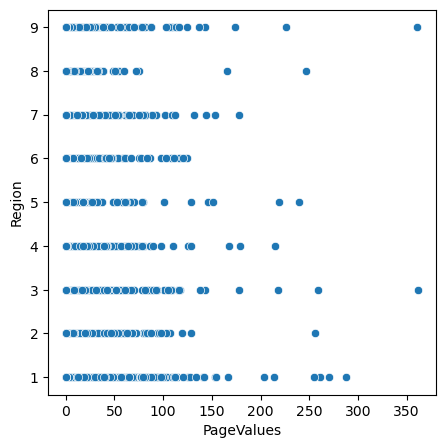

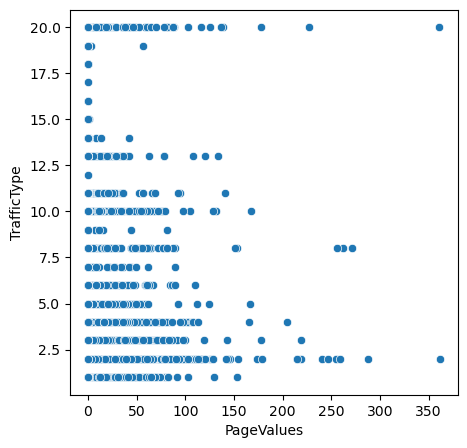

In [54]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["PageValues"], y=df[i])
    plt.show()

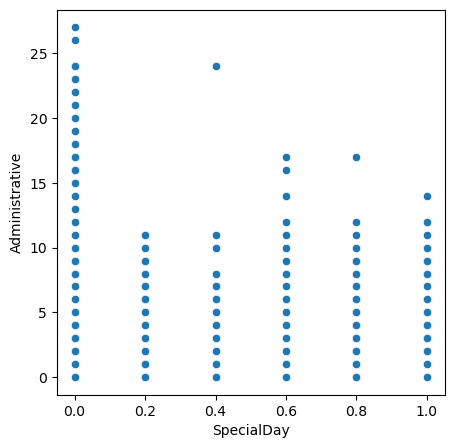

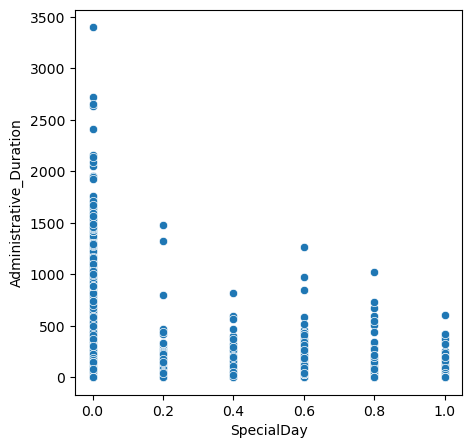

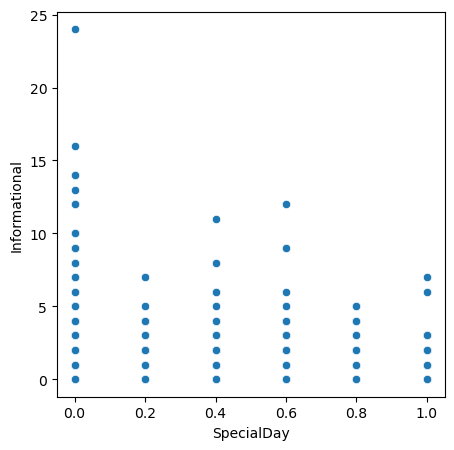

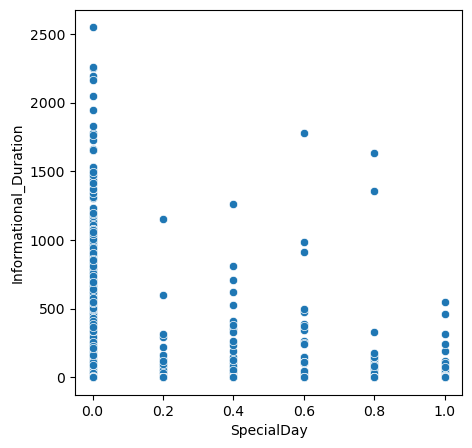

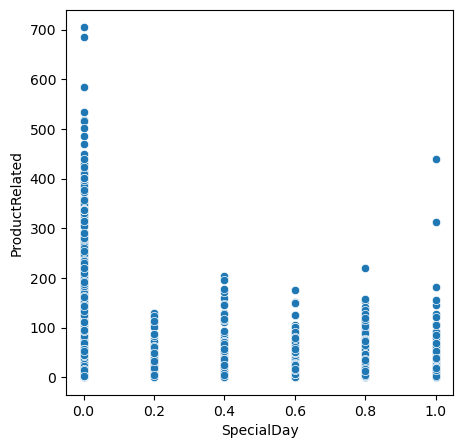

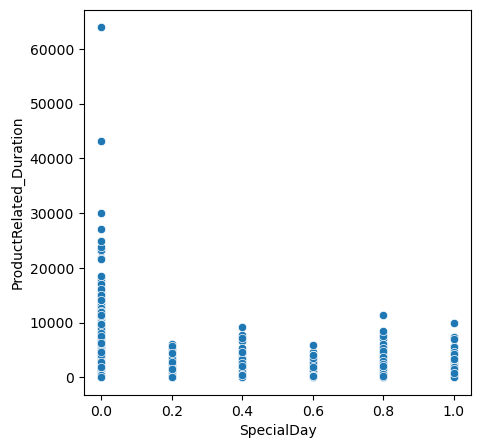

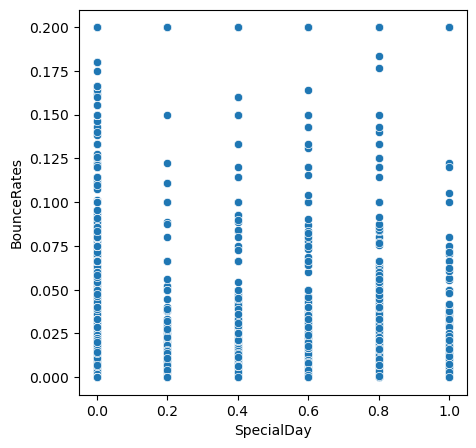

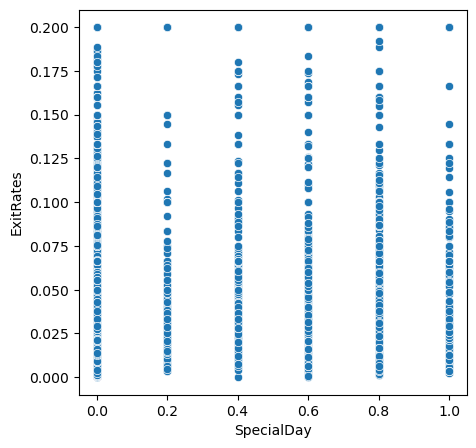

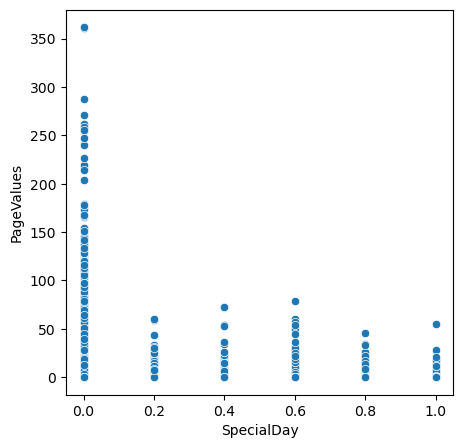

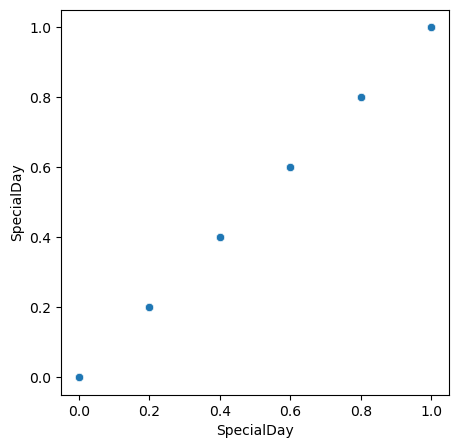

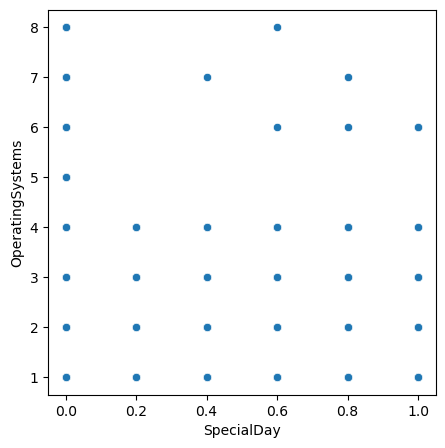

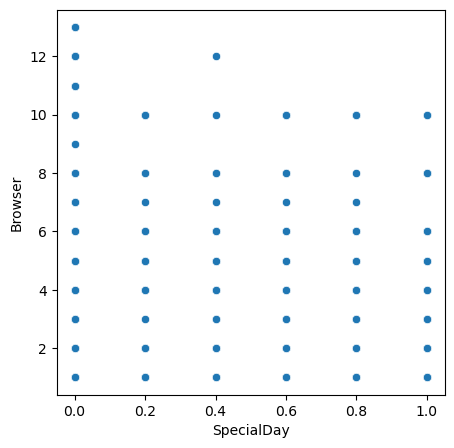

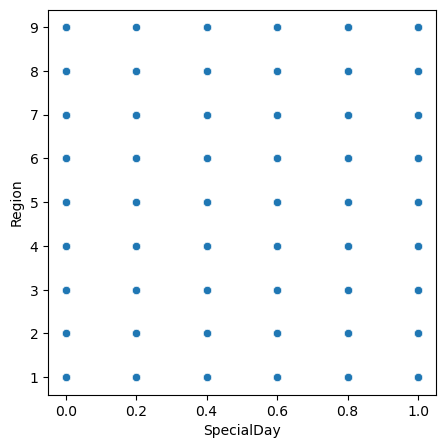

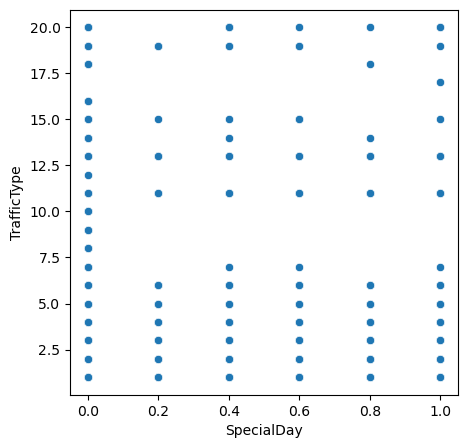

In [55]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["SpecialDay"], y=df[i])
    plt.show()

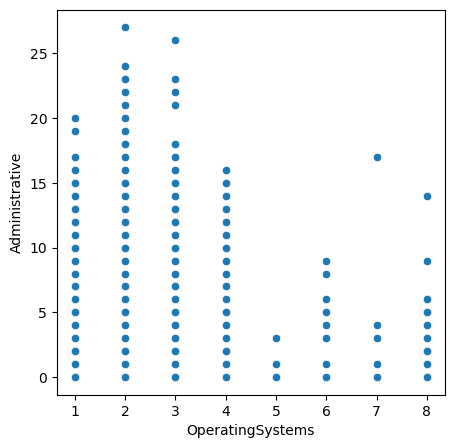

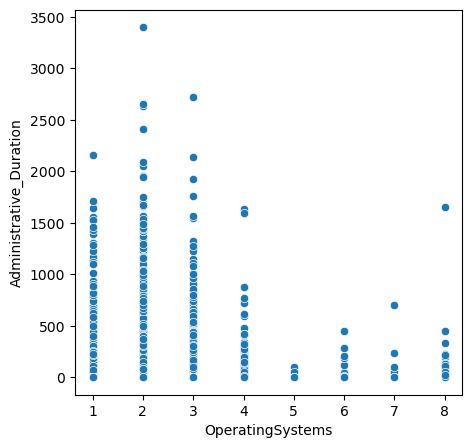

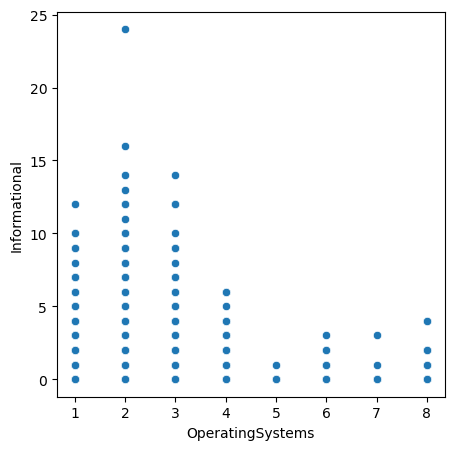

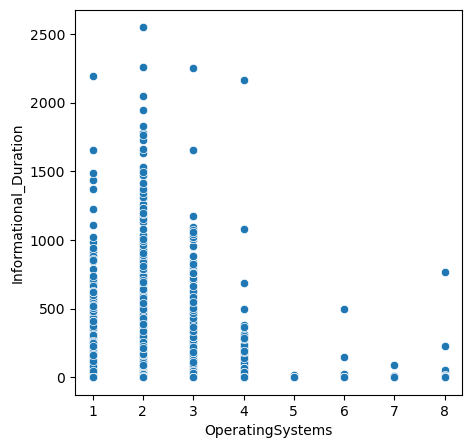

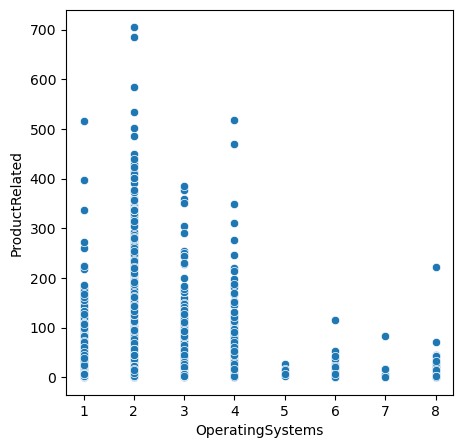

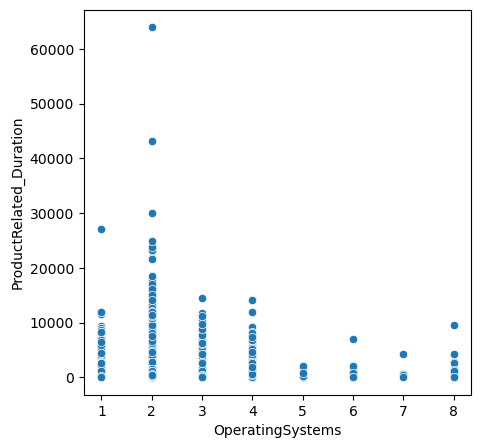

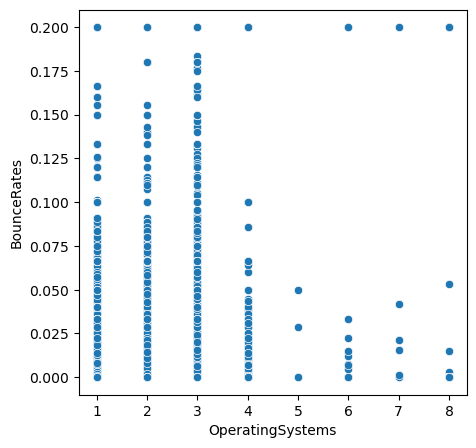

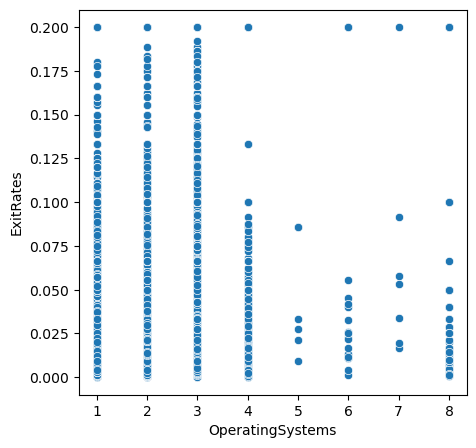

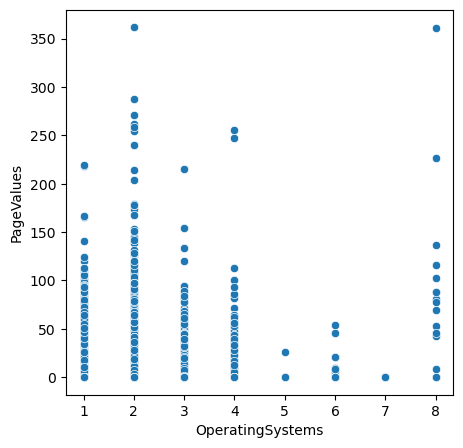

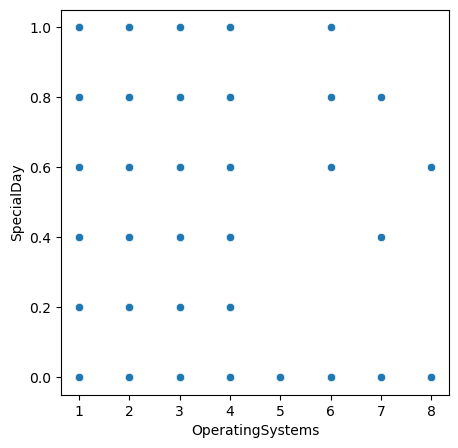

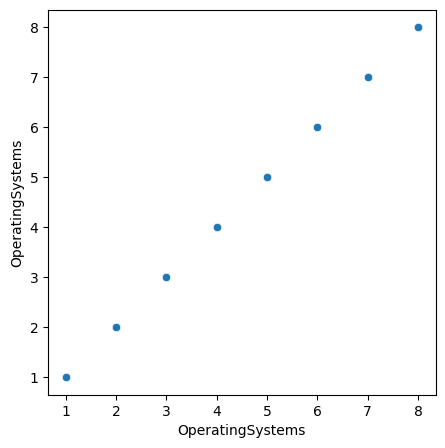

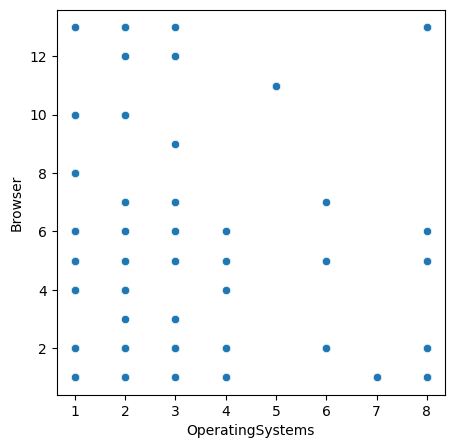

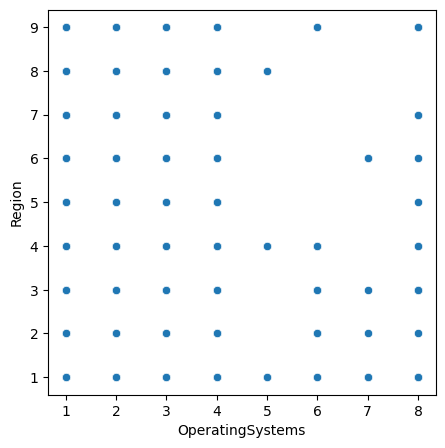

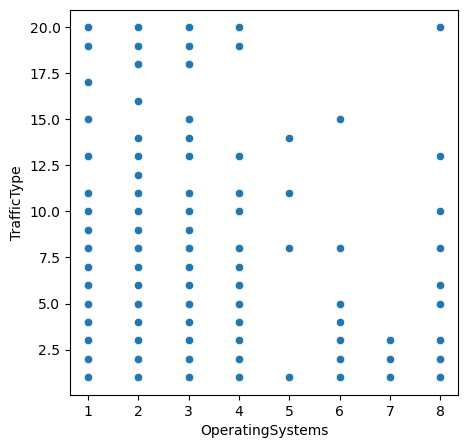

In [56]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["OperatingSystems"], y=df[i])
    plt.show()

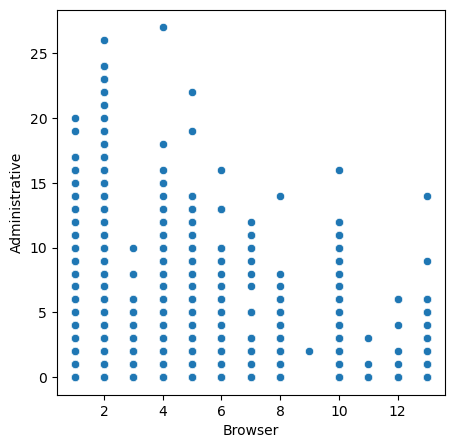

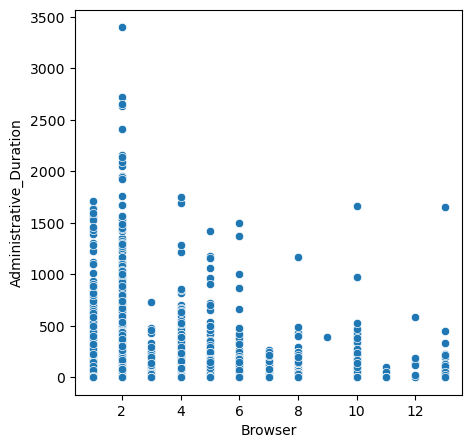

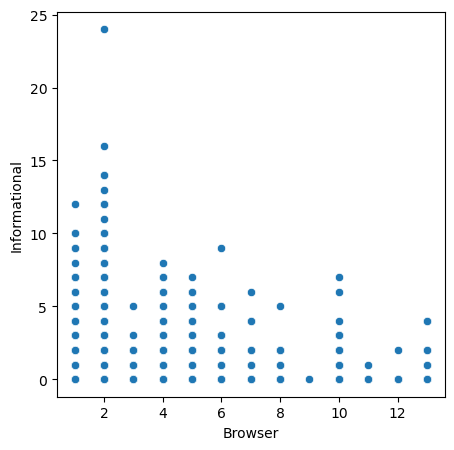

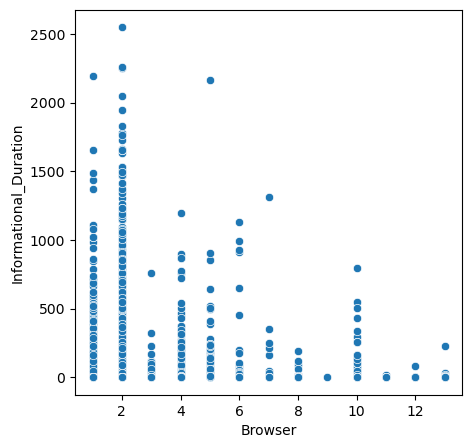

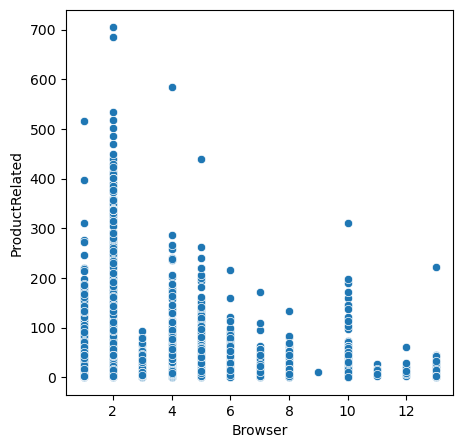

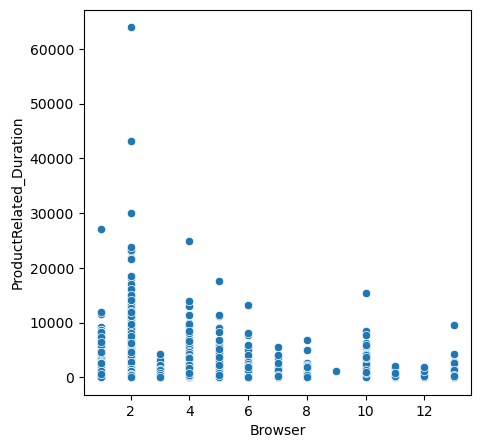

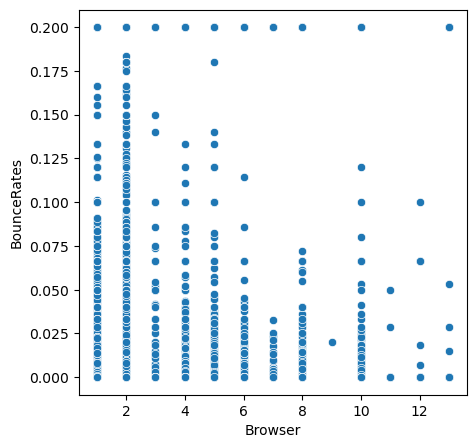

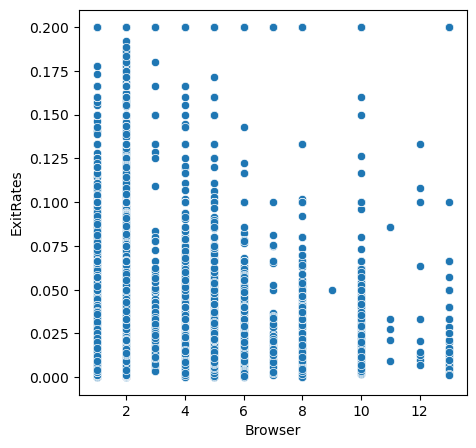

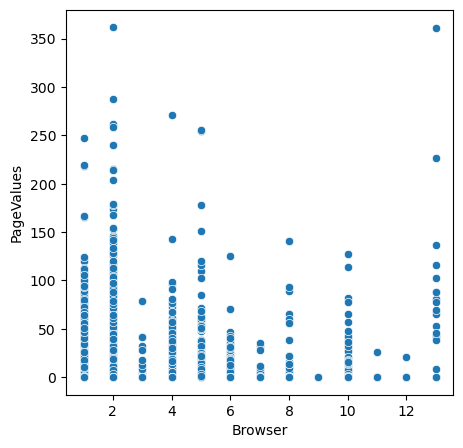

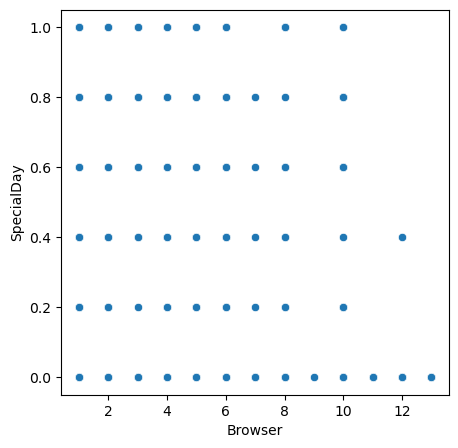

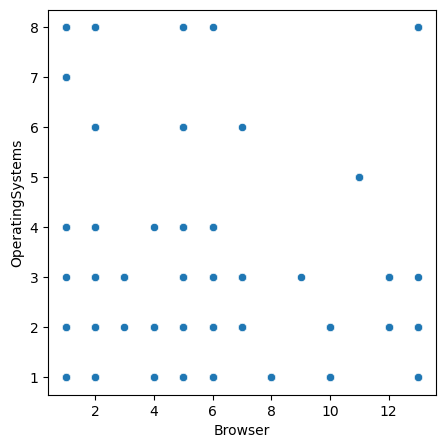

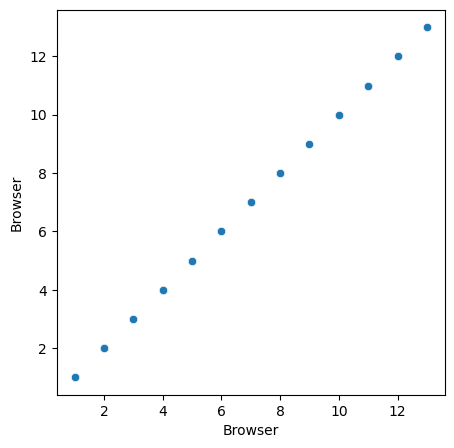

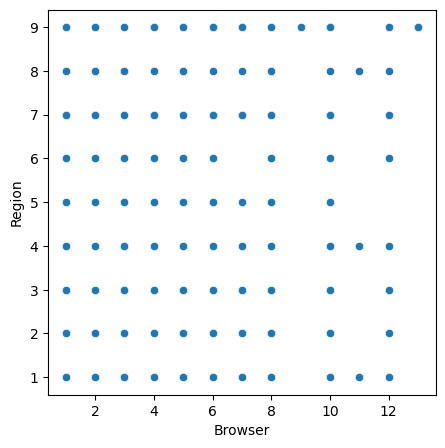

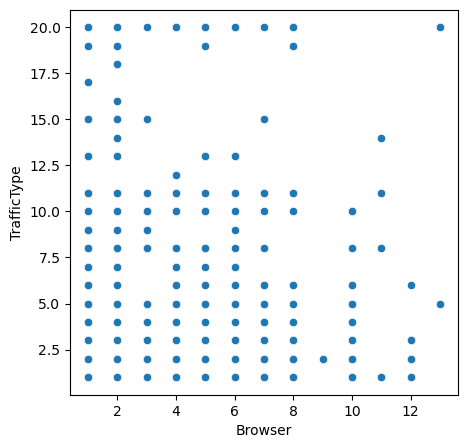

In [57]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["Browser"], y=df[i])
    plt.show()

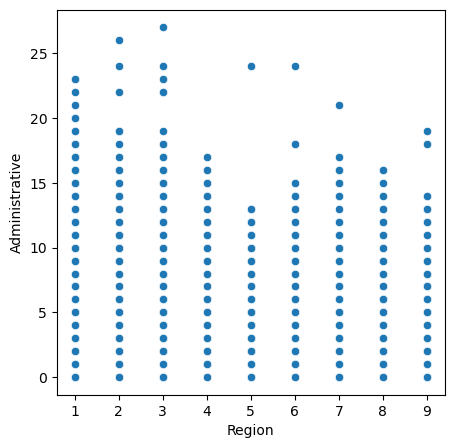

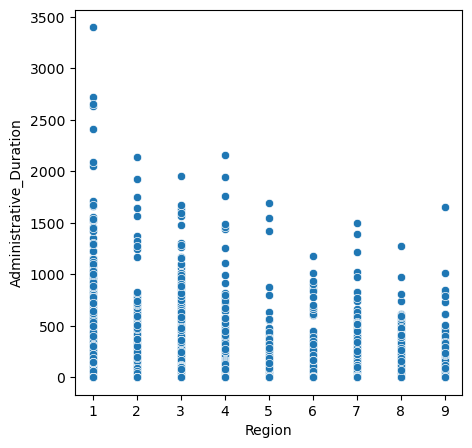

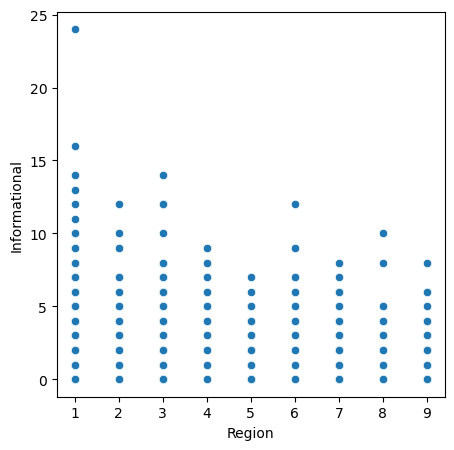

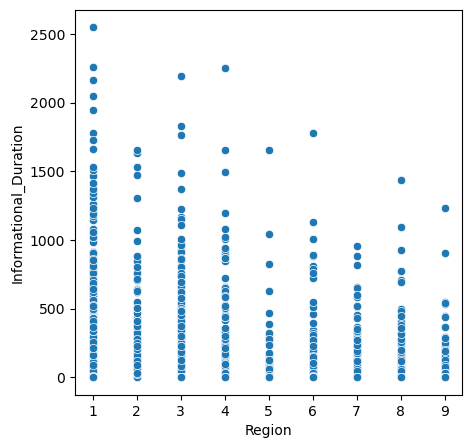

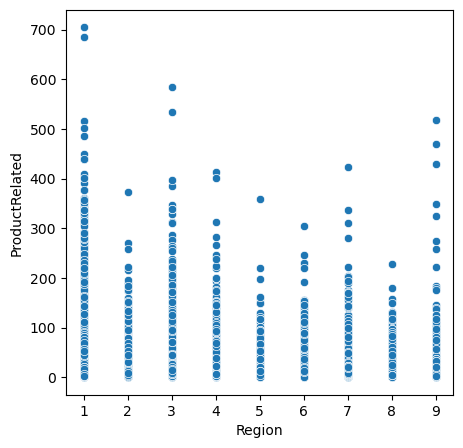

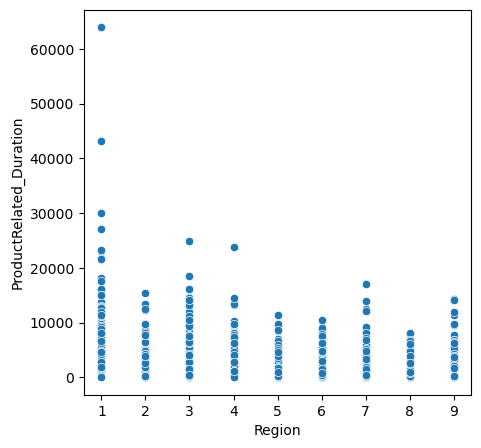

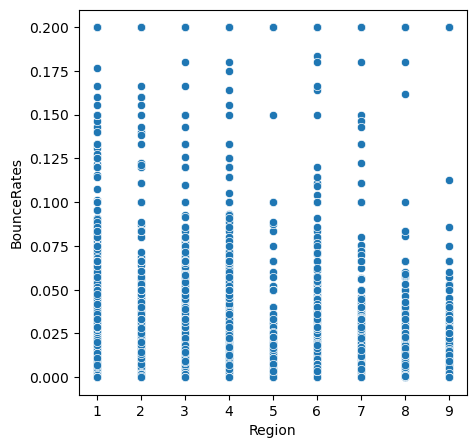

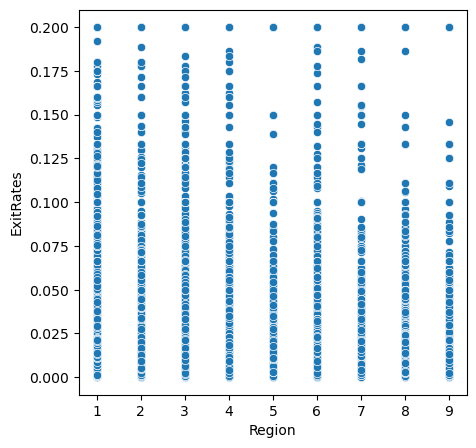

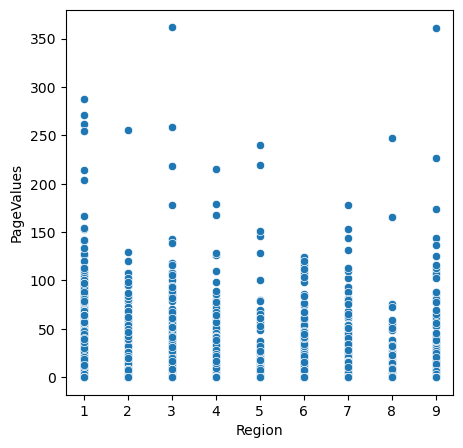

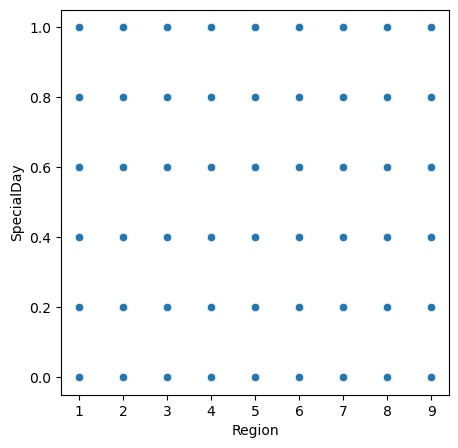

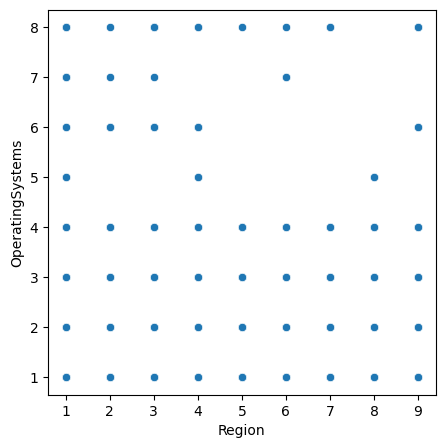

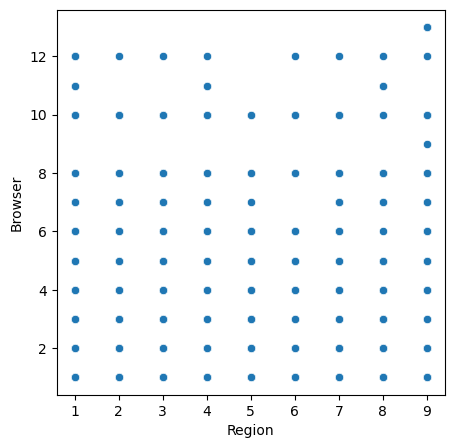

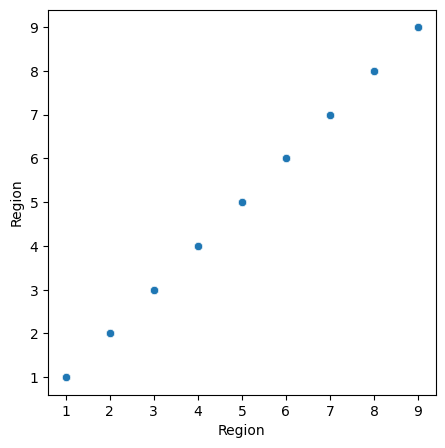

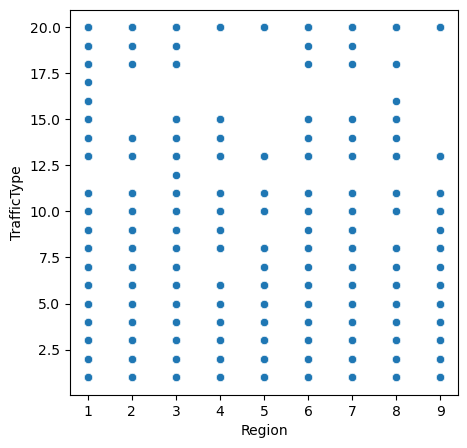

In [58]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["Region"], y=df[i])
    plt.show()

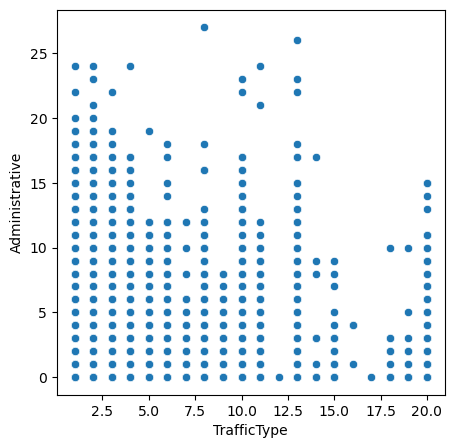

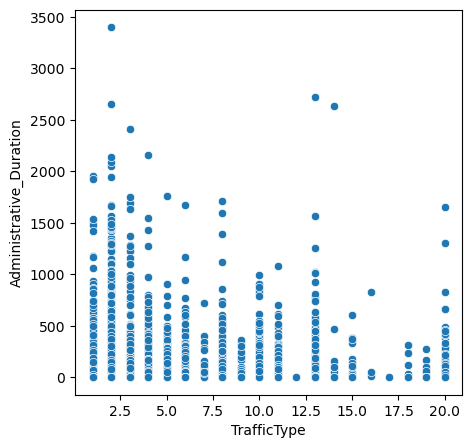

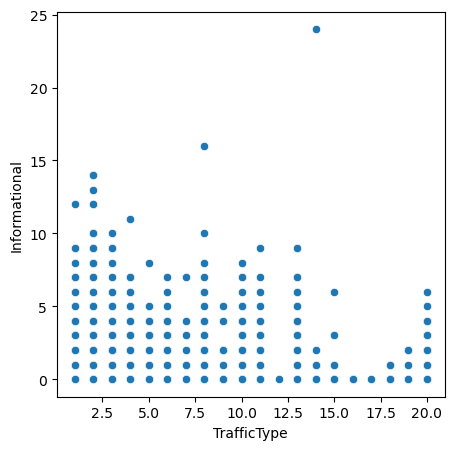

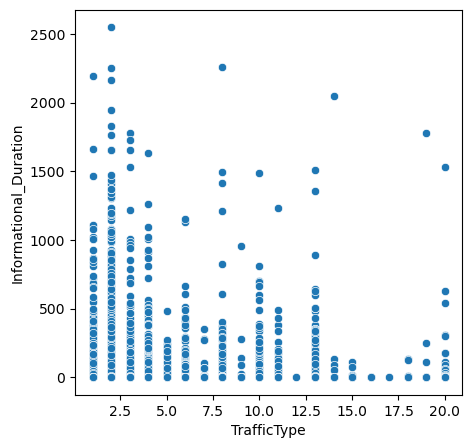

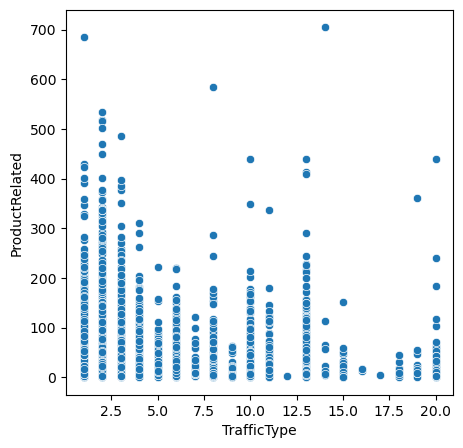

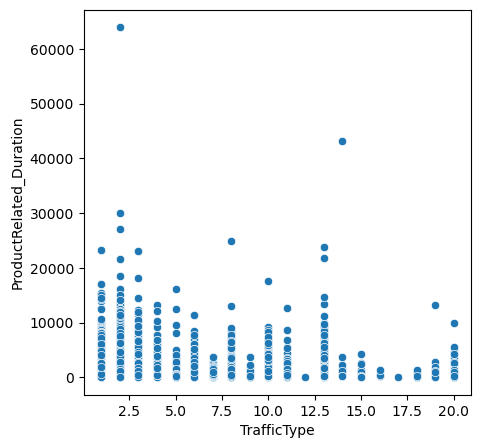

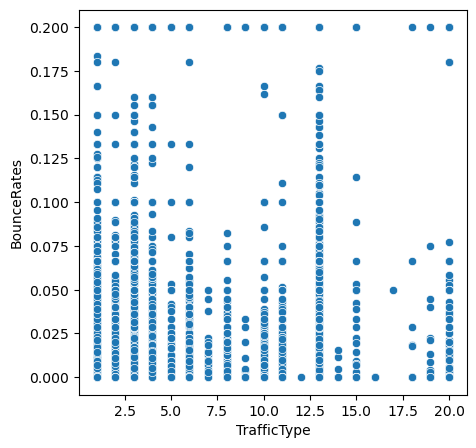

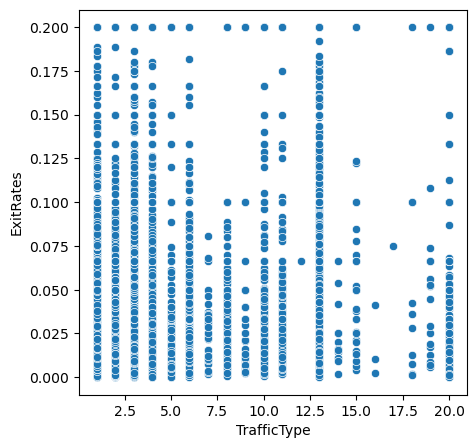

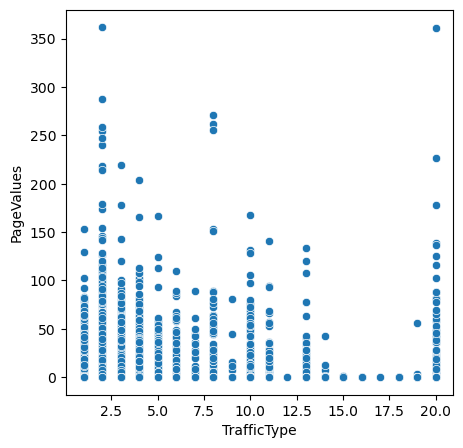

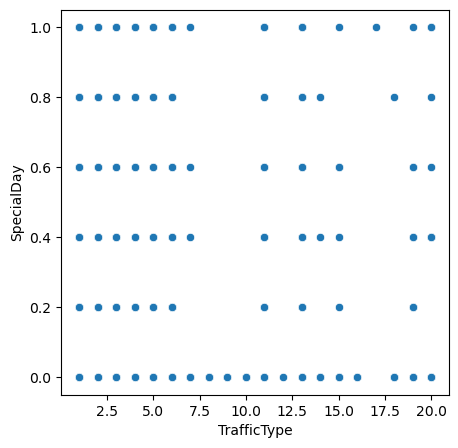

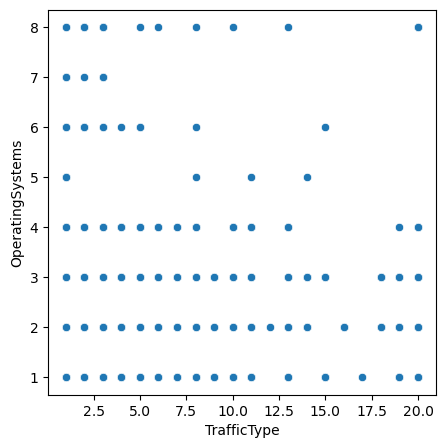

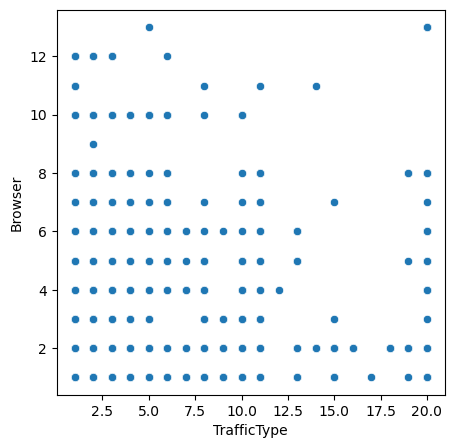

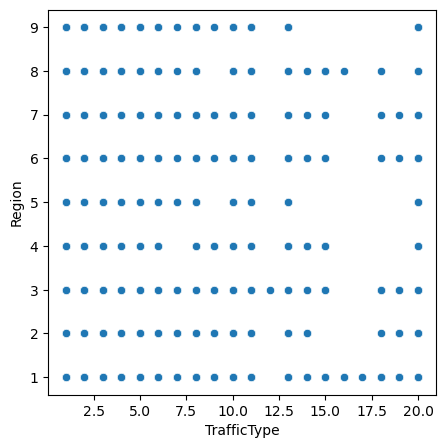

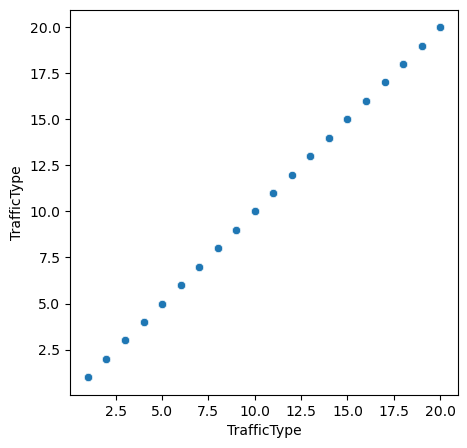

In [59]:
for i in df_num.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=df["TrafficType"], y=df[i])
    plt.show()

In [60]:
df_cat

Month        VisitorType Weekend Revenue
0       Feb  Returning_Visitor   False   False
1       Feb  Returning_Visitor   False   False
2       Feb  Returning_Visitor   False   False
3       Feb  Returning_Visitor   False   False
4       Feb  Returning_Visitor    True   False
...     ...                ...     ...     ...
12325   Dec  Returning_Visitor    True   False
12326   Nov  Returning_Visitor    True   False
12327   Nov  Returning_Visitor    True   False
12328   Nov  Returning_Visitor   False   False
12329   Nov        New_Visitor    True   False

[12330 rows x 4 columns]

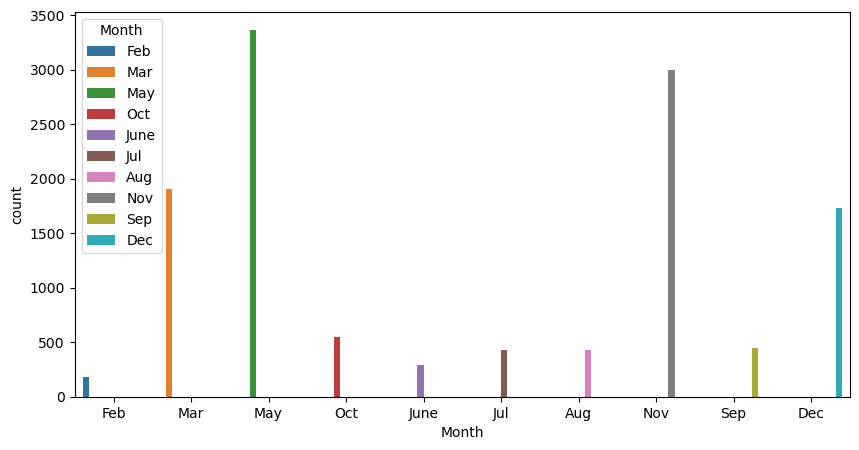

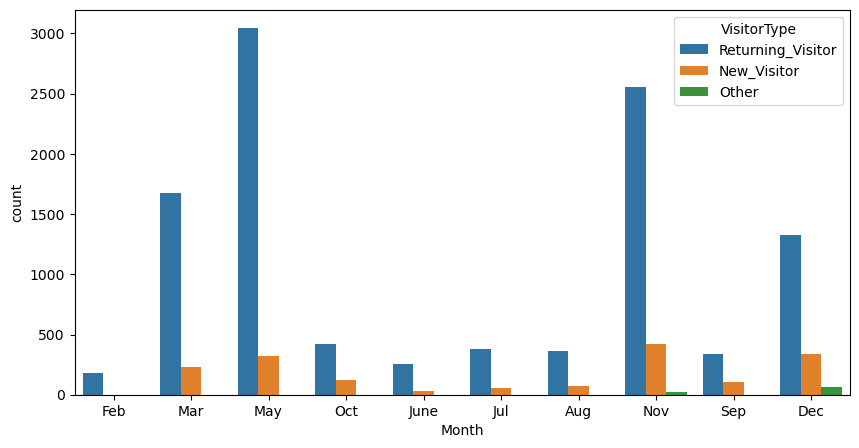

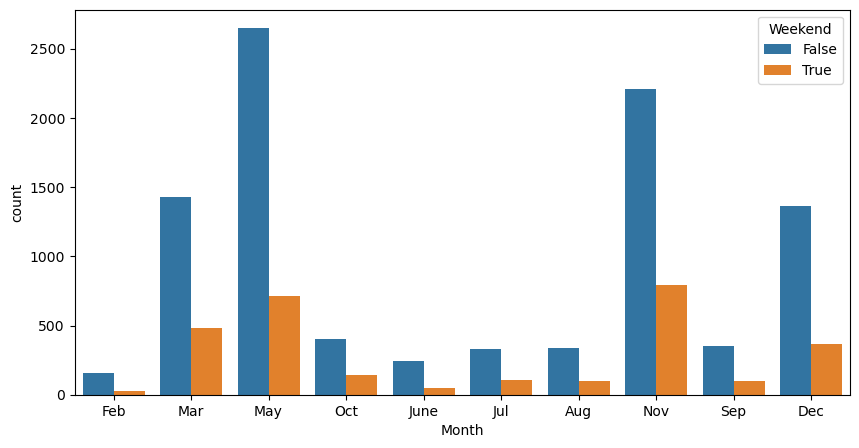

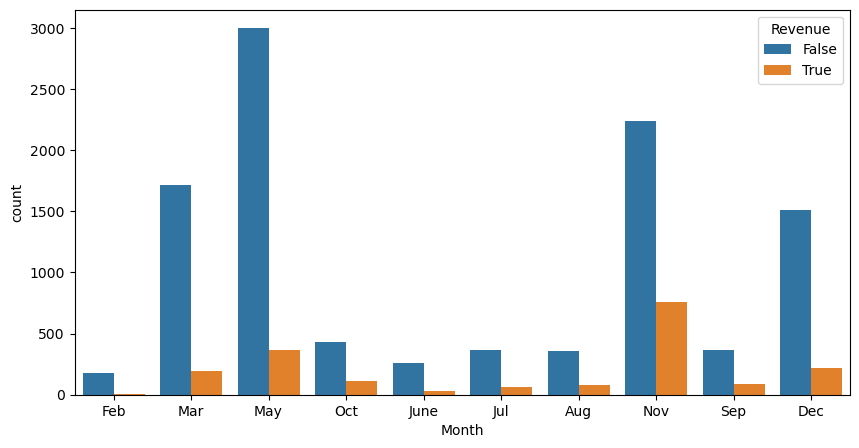

In [61]:
for i in df_cat.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=df_cat["Month"], hue=df_cat[i])
    plt.show()

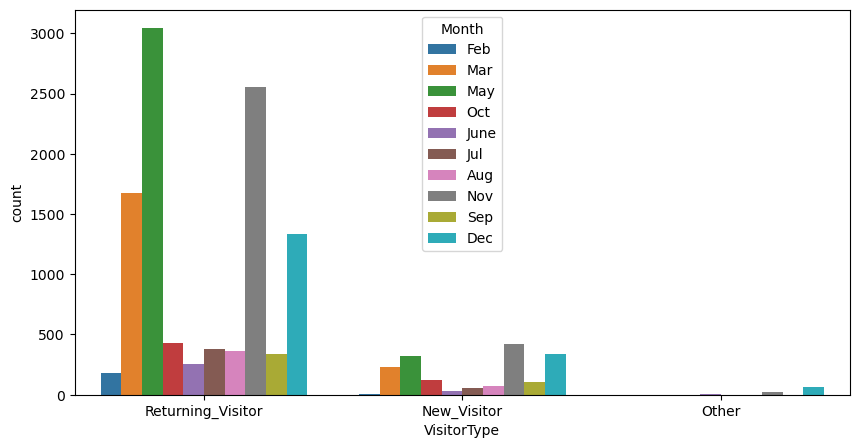

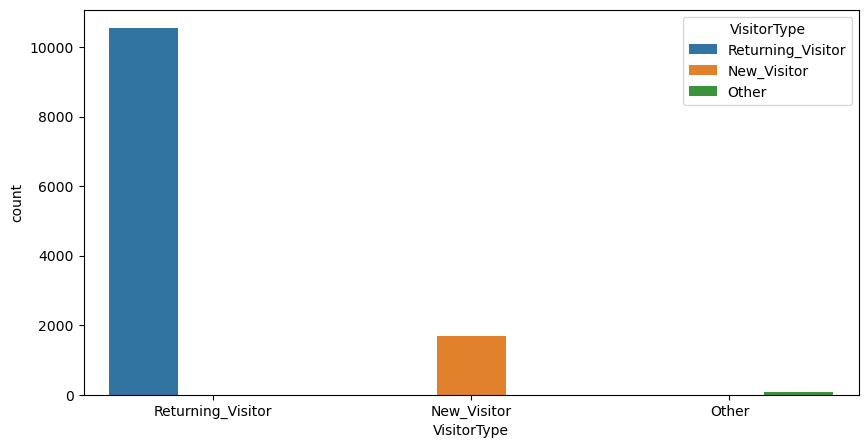

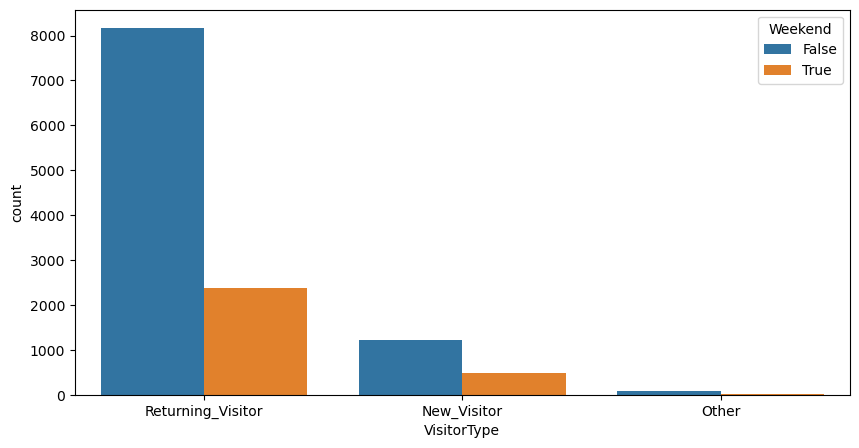

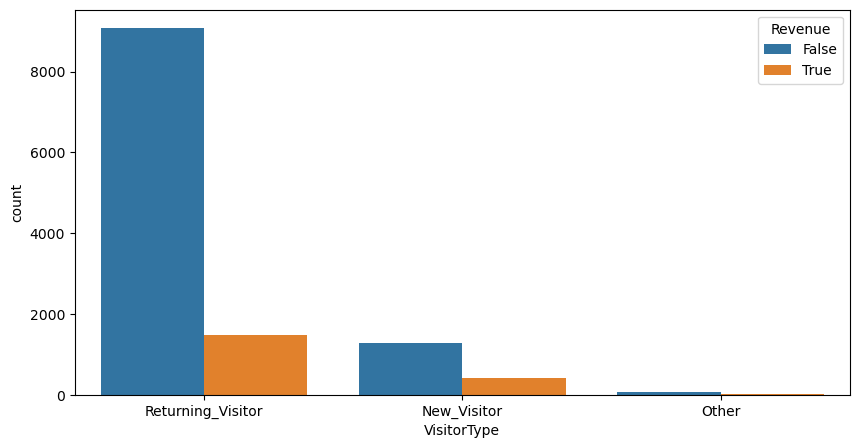

In [62]:
for i in df_cat.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=df_cat["VisitorType"], hue=df_cat[i])
    plt.show()

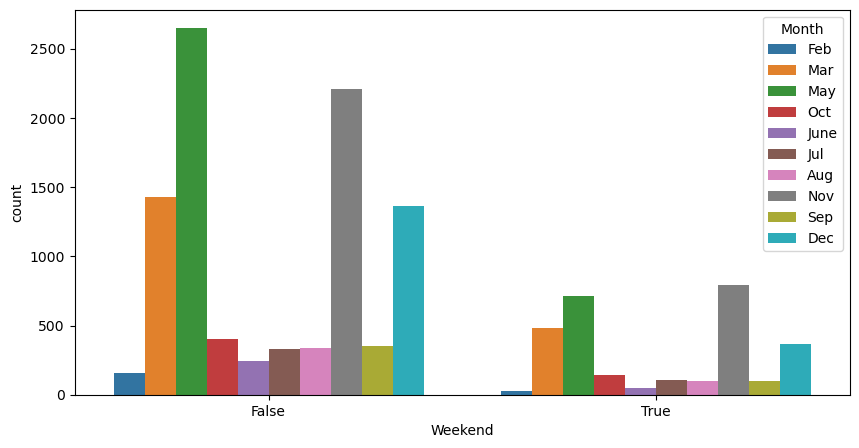

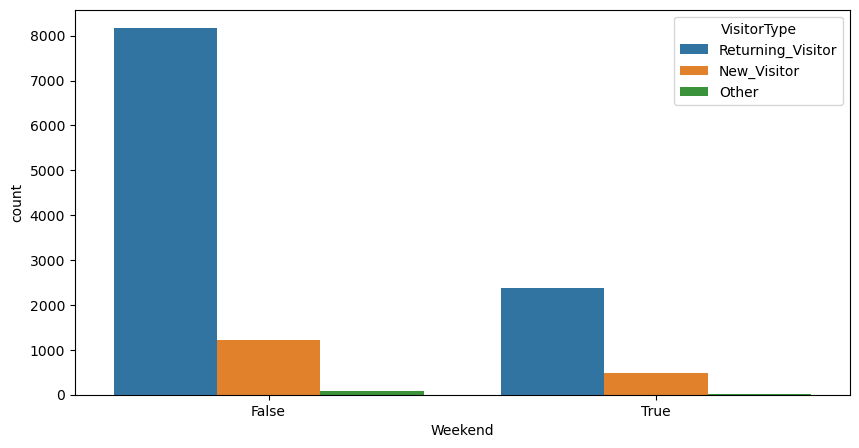

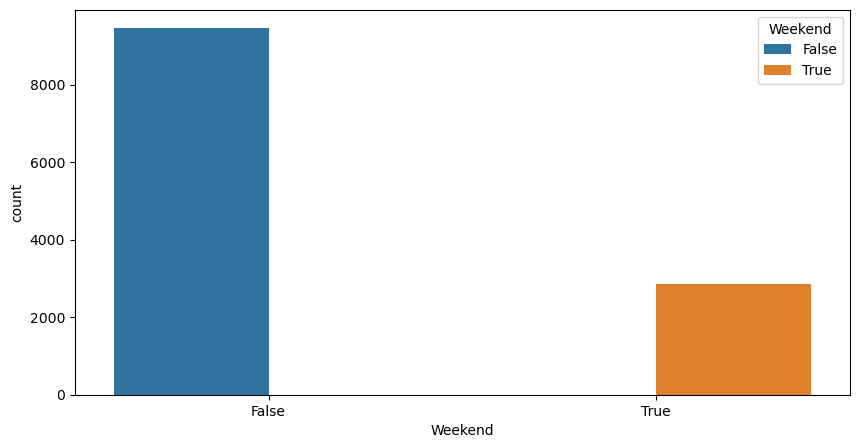

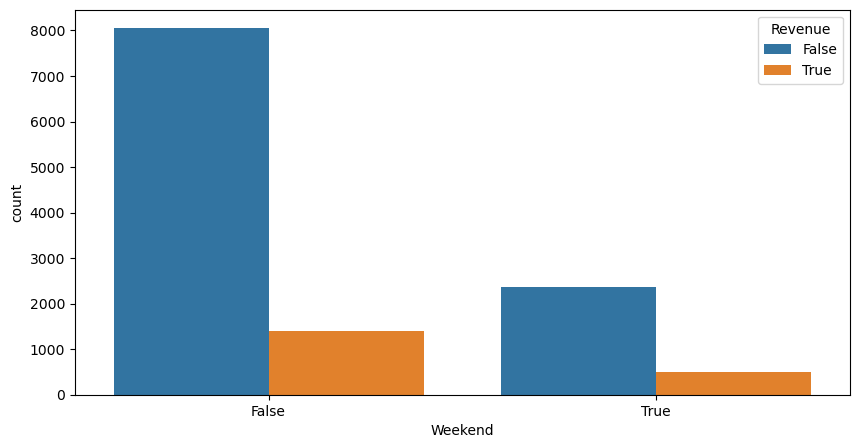

In [63]:
for i in df_cat.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=df_cat["Weekend"], hue=df_cat[i])
    plt.show()

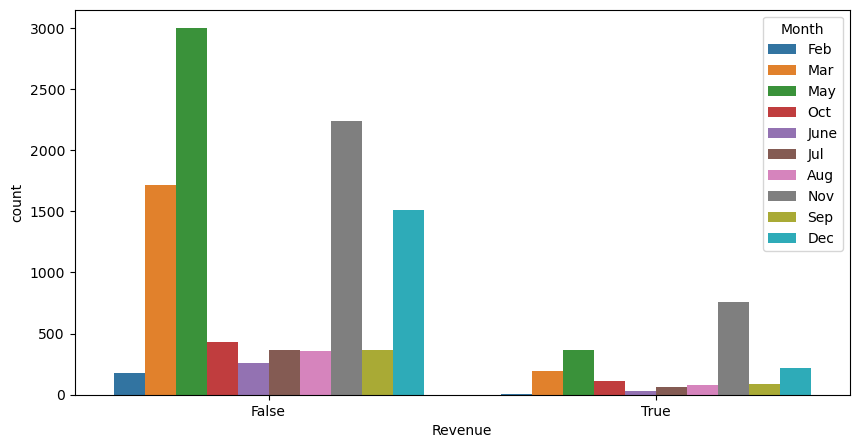

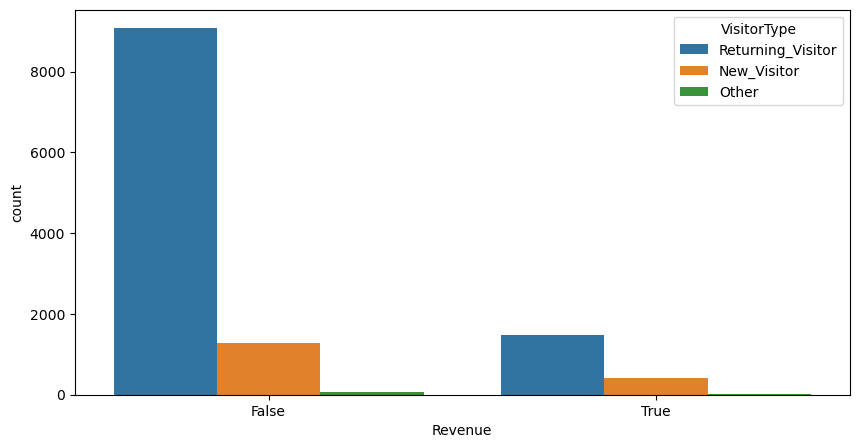

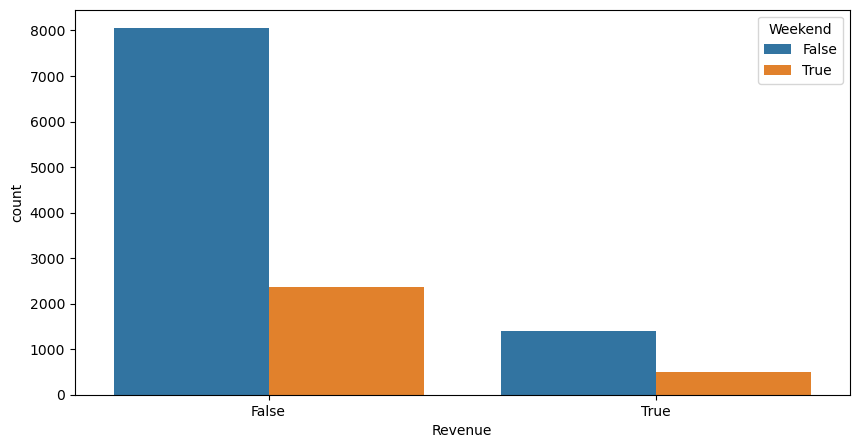

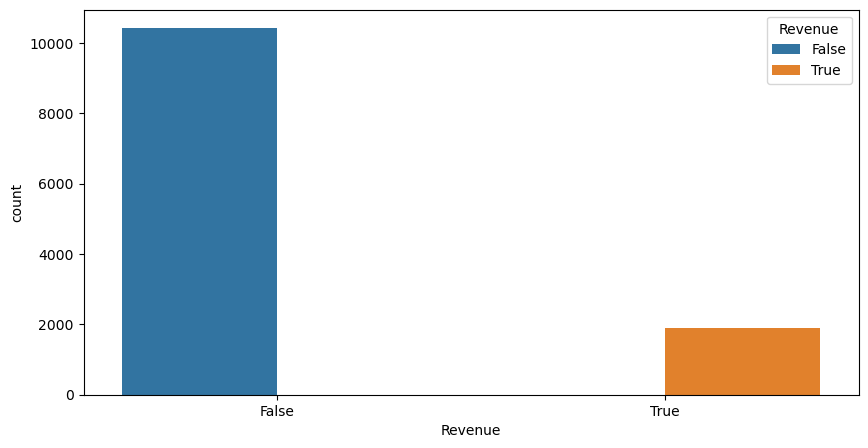

In [64]:
for i in df_cat.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=df_cat["Revenue"], hue=df_cat[i])
    plt.show()

Multivariate analysis

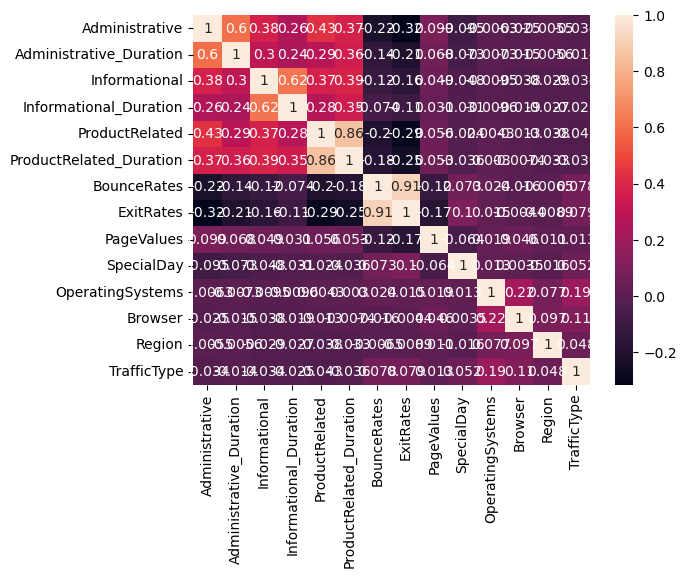

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [65]:
sns.heatmap(df.corr(),annot=True)
plt.show()
plt.figure(figsize=(20,10))

3. Perform required missing value treatment

In [66]:
df.isnull().sum()
#no missing values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

4. Perform Outlier treatment if required

In [67]:
df1=df.copy()

In [68]:

Q1 = df1.quantile(0.25)

Q3 = df1.quantile(0.75)

IQR = Q3 - Q1


df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df1.shape

(2550, 18)

<AxesSubplot:>

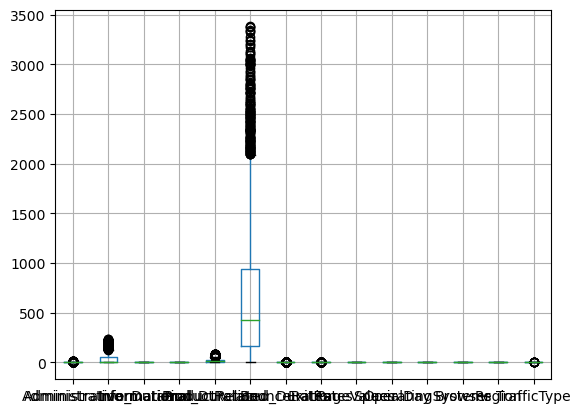

In [69]:
df1.boxplot()

In [70]:
#df2=df.copy()

In [71]:
#df1_num=df2.select_dtypes(include=np.number)

In [72]:
#df1_num.head(2)

In [73]:
#df2.describe()

In [74]:
#df1_num=df2.select_dtypes(include=np.number)
#df1_num.head(1)

In [75]:
#print(df2['Administrative'].skew())
#df2['Administrative']=np.sqrt(df2['Administrative'])
#print(df2['Administrative'].skew())

In [76]:
#print(df2['Administrative_Duration'].skew())
#df2['Administrative_Duration']=np.sqrt(df2['Administrative_Duration'])
#print(df2['Administrative_Duration'].skew())

In [77]:
#print(df2['Informational'].skew())
#df2['Informational']=np.sqrt(df2['Informational'])
#print(df2['Informational'].skew())

In [78]:
#print(df2['Informational_Duration'].skew())
#df2['Informational_Duration']=np.sqrt(df2['Informational_Duration'])
#print(df2['Informational_Duration'].skew())

In [79]:
#print(df2['ProductRelated'].skew())
#df2['ProductRelated']=np.sqrt(df2['ProductRelated'])
#print(df2['ProductRelated'].skew())

In [80]:
#print(df2['ProductRelated_Duration'].skew())
#df2['ProductRelated_Duration']=np.sqrt(df2['ProductRelated_Duration'])
#print(df2['ProductRelated_Duration'].skew())

In [81]:
#print(df2['BounceRates'].skew())
#df2['BounceRates']=np.sqrt(df2['BounceRates'])
#print(df2['BounceRates'].skew())

In [82]:

#print(df2['ExitRates'].skew())
#df2['ExitRates']=np.sqrt(df2['ExitRates'])
#print(df2['ExitRates'].skew())

In [83]:
#print(df2['Browser'].skew())
#df2['Browser']=np.sqrt(df2['Browser'])
#print(df2['Browser'].skew())

In [84]:


#print(df2['PageValues'].skew())
#df2['PageValues']=np.sqrt(df2['PageValues'])
#print(df2['PageValues'].skew())

In [85]:
#print(df2['SpecialDay'].skew())
#df2['SpecialDay']=np.sqrt(df2['SpecialDay'])
#print(df2['SpecialDay'].skew())

In [86]:
#print(df2['OperatingSystems'].skew())
#df2['OperatingSystems']=np.sqrt(df2['OperatingSystems'])
#print(df2['OperatingSystems'].skew())

In [87]:
#print(df2['Region'].skew())
#df2['Region']=np.sqrt(df2['Region'])
#print(df2['Region'].skew())

In [88]:
#print(df2['TrafficType'].skew())
#df2['TrafficType']=np.sqrt(df2['TrafficType'])
#print(df2['TrafficType'].skew())

5. Perform appropriate scaling

In [89]:
df1_num=df1.select_dtypes(include=np.number)

In [90]:

X_scaler = StandardScaler()

num_scaled = X_scaler.fit_transform(df1_num)

x = pd.DataFrame(num_scaled, columns = df1_num.columns)


6. Perform required encoding techniques

In [91]:
df1_cat=df1.select_dtypes(include='object')

In [92]:
dummy_var = pd.get_dummies(data = df1_cat, drop_first = True)


In [93]:
dummy_var.head()

Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  \
1           0          1          0           0          0          0   
5           0          1          0           0          0          0   
14          0          1          0           0          0          0   
18          0          1          0           0          0          0   
22          0          1          0           0          0          0   

    Month_Nov  Month_Oct  Month_Sep  VisitorType_Other  \
1           0          0          0                  0   
5           0          0          0                  0   
14          0          0          0                  0   
18          0          0          0                  0   
22          0          0          0                  0   

    VisitorType_Returning_Visitor  Weekend_True  Revenue_True  
1                               1             0             0  
5                               1             0             0  
14                              1             0             0  
18                              1             0             0  
22                              1             0             0

In [94]:
#x = pd.concat([df1_num_scaled, dummy_var], axis = 1)
#x.isnull().sum()

7. Build the different cluster models.

k means algorithm

3.1 Optimal Value of K Using Elbow Plot

In [95]:
wcss=[]

for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

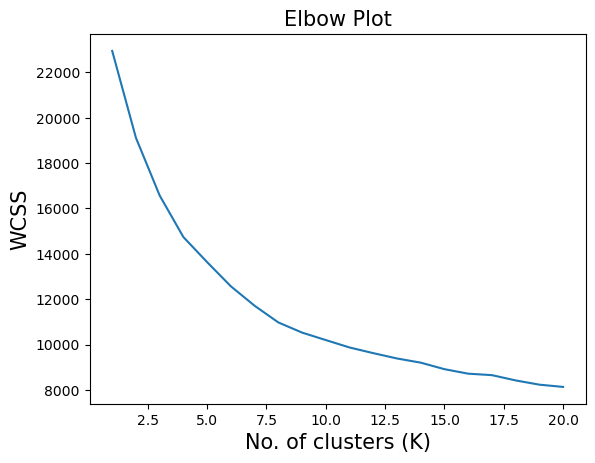

In [96]:

plt.plot(range(1,21), wcss)

plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

plt.show()

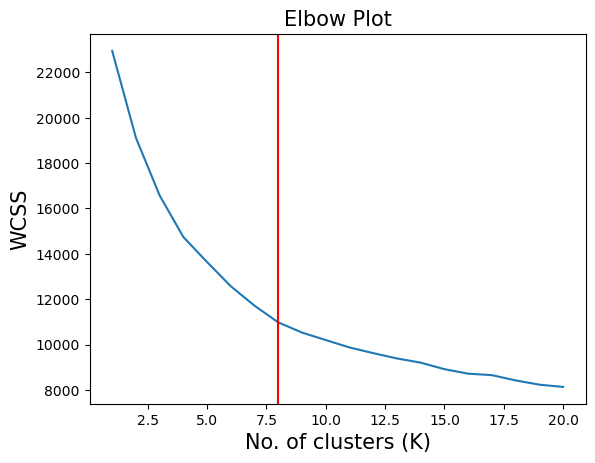

In [97]:

plt.plot(range(1,21), wcss)

plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)
plt.axvline(x = 8, color = 'red')
plt.show()

3.2 Optimal Value of K Using Silhouette Score

In [98]:
n_clusters = [5,6,7,8,9,10]
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(x)
    score = silhouette_score(x, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 5 clusters the silhouette score is 0.17184228050134875)
For 6 clusters the silhouette score is 0.17398492528228993)
For 7 clusters the silhouette score is 0.1764005979115541)
For 8 clusters the silhouette score is 0.18163756147468352)
For 9 clusters the silhouette score is 0.17656171433318682)
For 10 clusters the silhouette score is 0.17622266916233603)


In [99]:
!pip install yellowbrick 
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

Defaulting to user installation because normal site-packages is not writeable


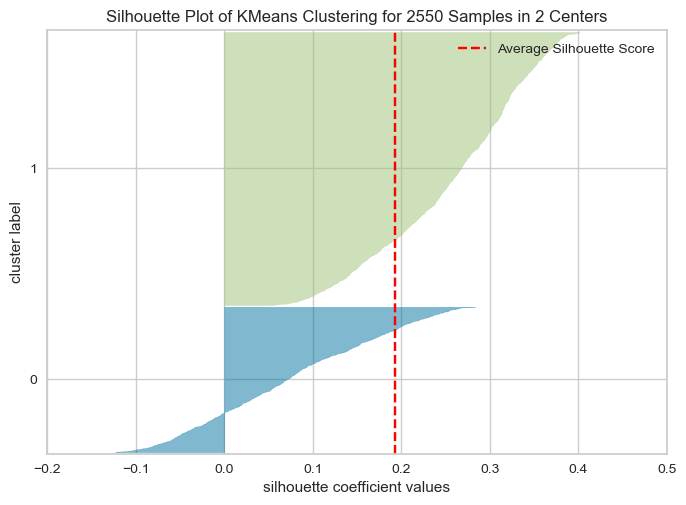

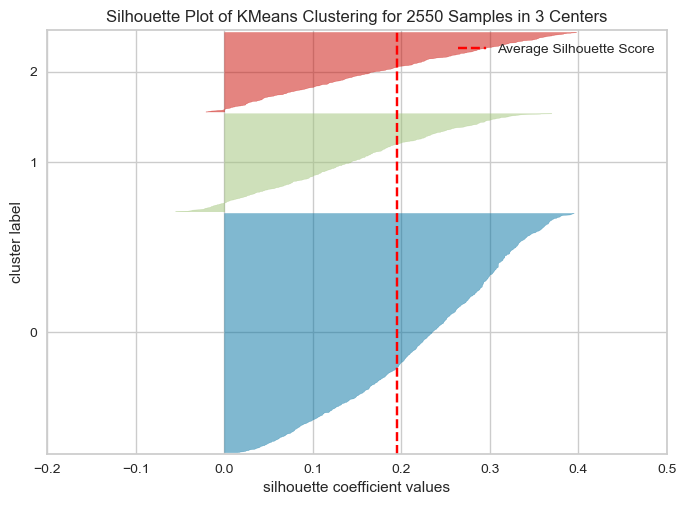

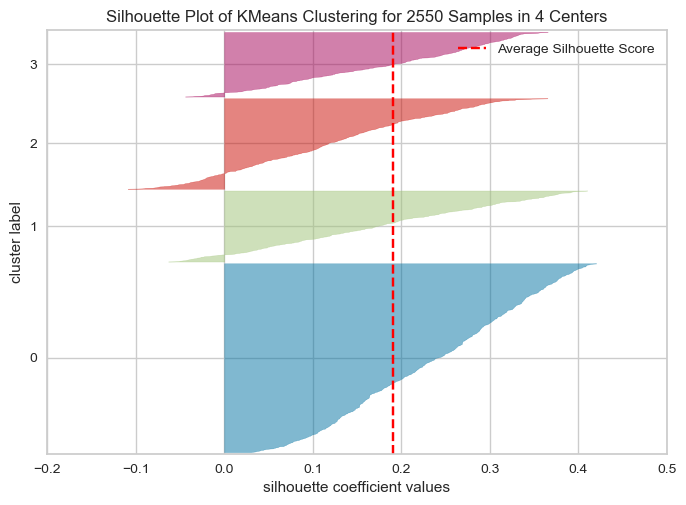

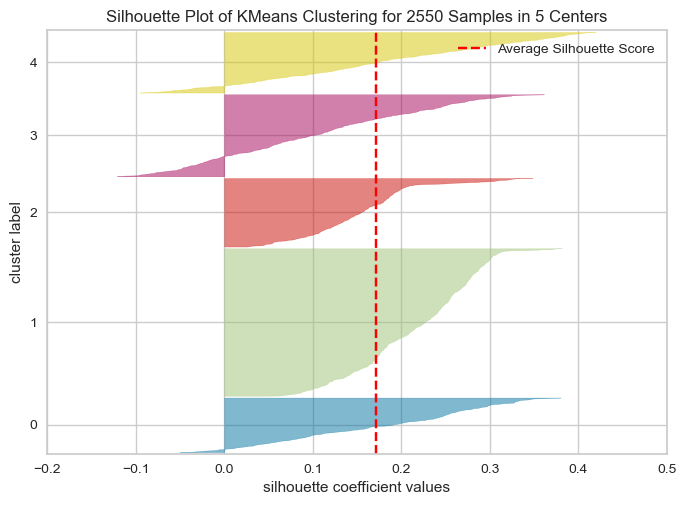

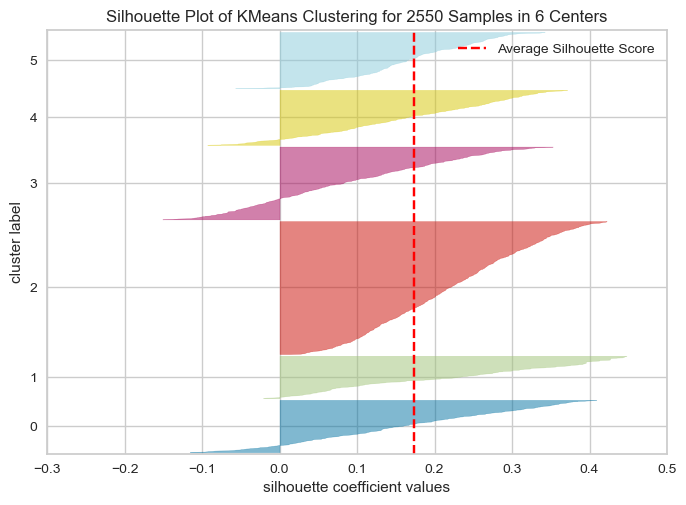

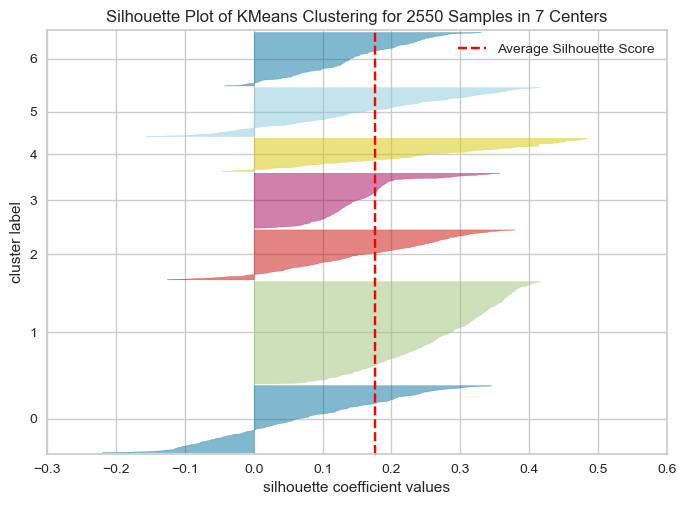

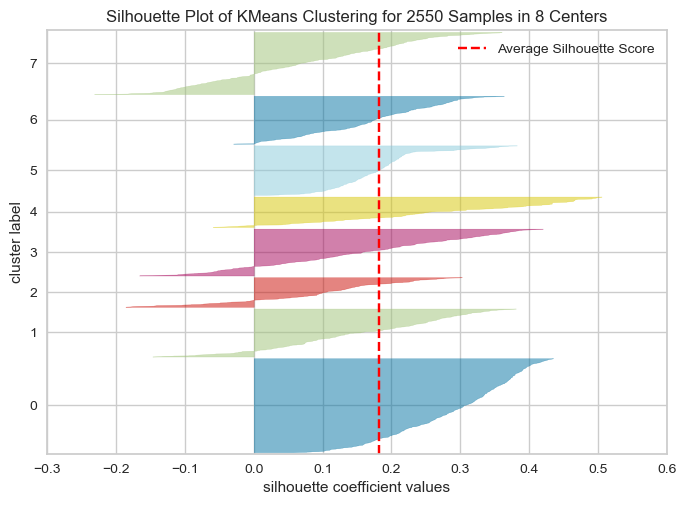

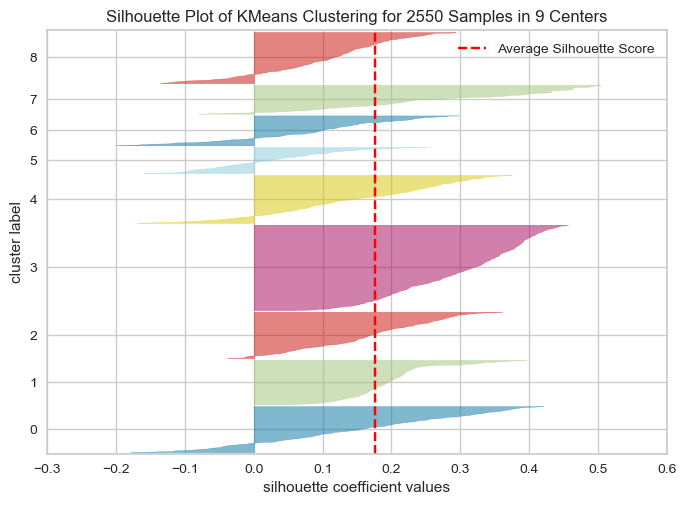

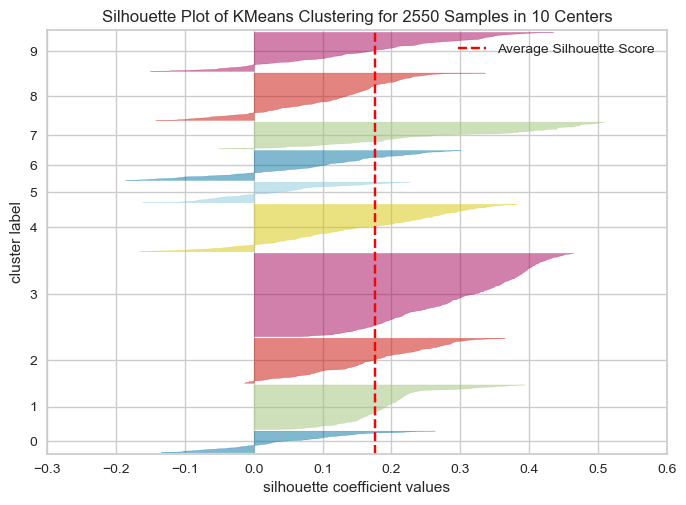

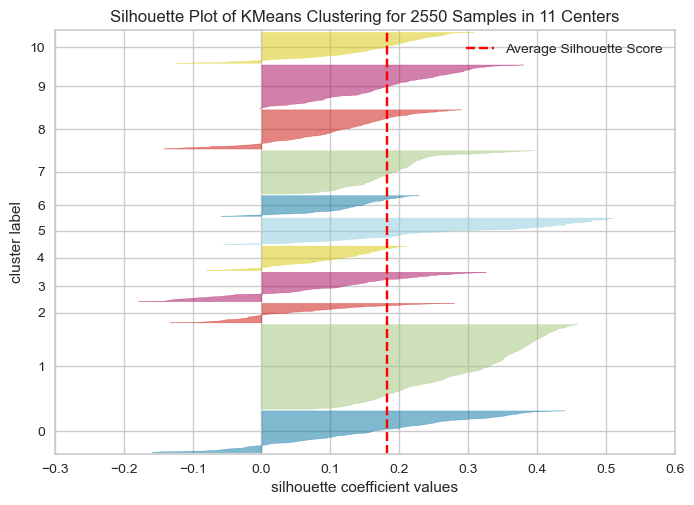

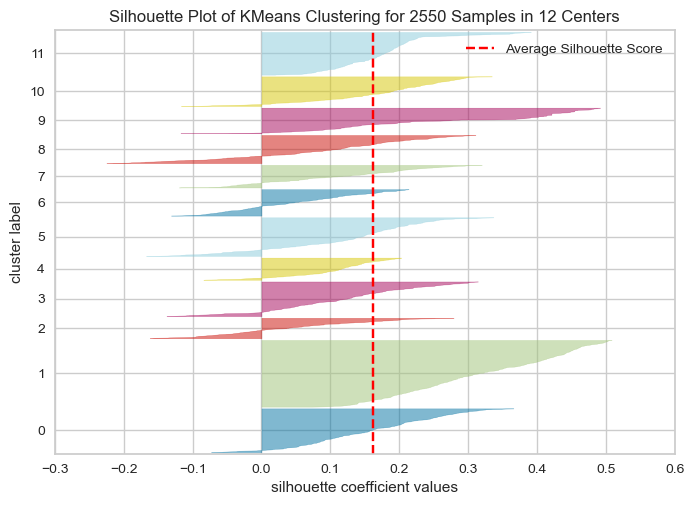

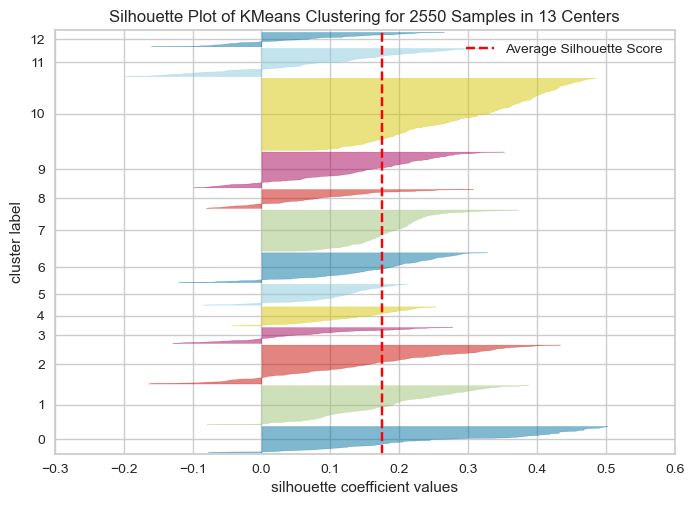

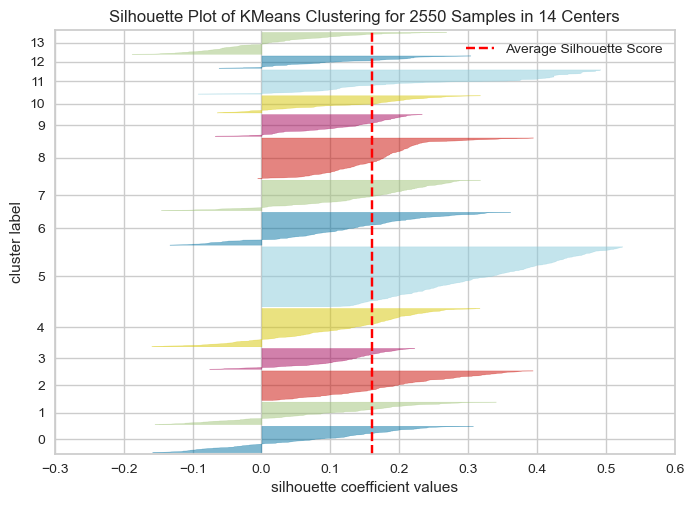

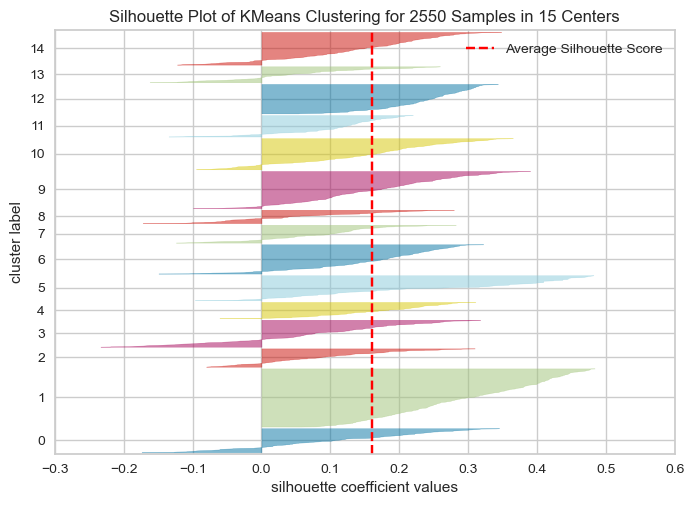

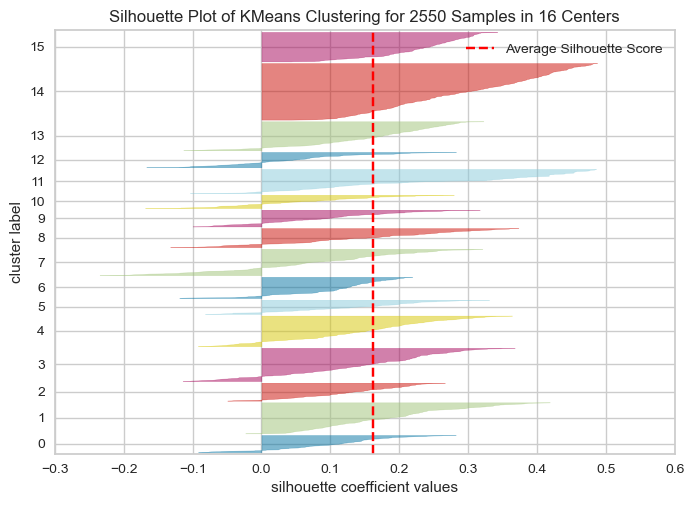

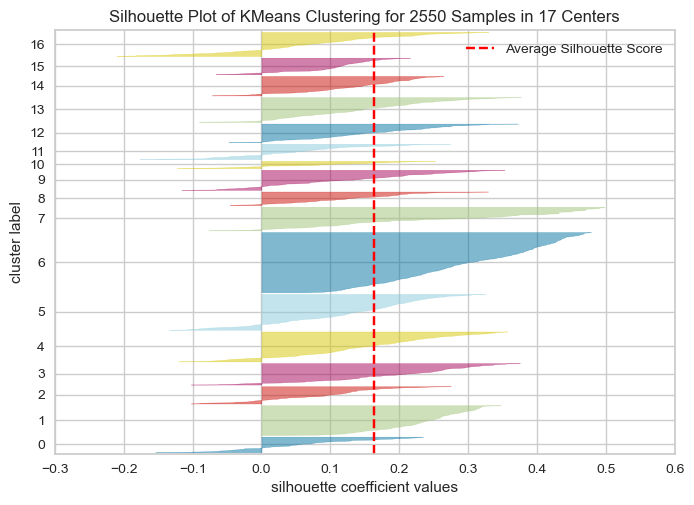

In [100]:
for i in range(2,18):
    kms= KMeans(n_clusters=i)
    kms.fit(x)
    model= KMeans(n_clusters=i,random_state=10)
    v=SilhouetteVisualizer(model,colors='yellowbrick')
    v.fit(x)
    v.show()

3.3 Build the Clusters

In [101]:

new_clusters = KMeans(n_clusters = 8, random_state = 10)

new_clusters.fit(x)

df1['Cluster'] = new_clusters.labels_

In [102]:
df1.head()

Administrative  Administrative_Duration  Informational  \
1                0                      0.0              0   
5                0                      0.0              0   
14               0                      0.0              0   
18               0                      0.0              0   
22               0                      0.0              0   

    Informational_Duration  ProductRelated  ProductRelated_Duration  \
1                      0.0               2                64.000000   
5                      0.0              19               154.216667   
14                     0.0               2                68.000000   
18                     0.0               2                32.000000   
22                     0.0               3               105.000000   

    BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
1      0.000000   0.100000         0.0         0.0   Feb                 2   
5      0.015789   0.024561         0.0         0.0   Feb                 2   
14     0.000000   0.100000         0.0         0.0   Feb                 3   
18     0.000000   0.100000         0.0         0.0   Feb                 2   
22     0.000000   0.033333         0.0         0.0   Feb                 3   

    Browser  Region  TrafficType        VisitorType Weekend Revenue  Cluster  
1         2       1            2  Returning_Visitor   False   False        4  
5         2       1            3  Returning_Visitor   False   False        0  
14        2       3            3  Returning_Visitor   False   False        4  
18        2       1            3  Returning_Visitor   False   False        4  
22        2       1            5  Returning_Visitor   False   False        2

In [103]:
df1.Cluster.value_counts()

0    586
7    388
5    309
1    300
6    299
3    293
4    190
2    185
Name: Cluster, dtype: int64

Analyse the optimum number of cluster using appropriate techniques

In [105]:
len(df1[df1['Cluster'] == 0])

586

In [130]:
len(df1[df1['Cluster'] == 1])


300

In [129]:
len(df1[df1['Cluster'] == 2])


185

In [128]:
len(df1[df1['Cluster'] == 3])


293

In [127]:
len(df1[df1['Cluster'] == 4])


190

In [126]:
len(df1[df1['Cluster'] == 5])


309

In [125]:
len(df1[df1['Cluster'] == 6])


299

In [124]:
len(df1[df1['Cluster'] == 7])


388

Perform the EDA on cluster groups to understand the cluster characteristics.

In [116]:
df1[df1.Cluster==0].describe()

Administrative  Administrative_Duration  Informational  \
count      586.000000               586.000000          586.0   
mean         0.696246                11.884449            0.0   
std          1.079674                20.950216            0.0   
min          0.000000                 0.000000            0.0   
25%          0.000000                 0.000000            0.0   
50%          0.000000                 0.000000            0.0   
75%          1.000000                17.500000            0.0   
max          5.000000               108.800000            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                   586.0      586.000000               586.000000   
mean                      0.0       15.175768               458.177022   
std                       0.0        9.704426               365.930747   
min                       0.0        1.000000                 4.000000   
25%                       0.0        8.000000               169.925000   
50%                       0.0       13.000000               357.700000   
75%                       0.0       21.000000               665.054167   
max                       0.0       49.000000              2028.500000   

       BounceRates   ExitRates  PageValues  SpecialDay  OperatingSystems  \
count   586.000000  586.000000       586.0       586.0        586.000000   
mean      0.001881    0.024493         0.0         0.0          1.943686   
std       0.004392    0.012989         0.0         0.0          0.230724   
min       0.000000    0.000000         0.0         0.0          1.000000   
25%       0.000000    0.014286         0.0         0.0          2.000000   
50%       0.000000    0.022857         0.0         0.0          2.000000   
75%       0.000000    0.033333         0.0         0.0          2.000000   
max       0.022222    0.061728         0.0         0.0          2.000000   

       Browser      Region  TrafficType  Cluster  
count    586.0  586.000000   586.000000    586.0  
mean       2.0    1.779863     2.027304      0.0  
std        0.0    1.014933     0.820218      0.0  
min        2.0    1.000000     1.000000      0.0  
25%        2.0    1.000000     1.000000      0.0  
50%        2.0    1.000000     2.000000      0.0  
75%        2.0    3.000000     2.000000      0.0  
max        2.0    4.000000     4.000000      0.0

In [117]:
df1[df1.Cluster==1].describe()

Administrative  Administrative_Duration  Informational  \
count      300.000000               300.000000          300.0   
mean         0.553333                13.570120            0.0   
std          1.118627                33.902393            0.0   
min          0.000000                 0.000000            0.0   
25%          0.000000                 0.000000            0.0   
50%          0.000000                 0.000000            0.0   
75%          1.000000                 2.000000            0.0   
max          5.000000               222.500000            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                   300.0      300.000000               300.000000   
mean                      0.0       15.753333               559.233576   
std                       0.0       10.047004               503.793490   
min                       0.0        3.000000                 8.000000   
25%                       0.0        8.000000               179.000000   
50%                       0.0       13.000000               389.925000   
75%                       0.0       21.000000               755.652778   
max                       0.0       60.000000              2559.433333   

       BounceRates   ExitRates  PageValues  SpecialDay  OperatingSystems  \
count   300.000000  300.000000       300.0       300.0        300.000000   
mean      0.029367    0.056025         0.0         0.0          2.363333   
std       0.006868    0.015834         0.0         0.0          0.570738   
min       0.014286    0.014286         0.0         0.0          1.000000   
25%       0.025000    0.044444         0.0         0.0          2.000000   
50%       0.028571    0.055556         0.0         0.0          2.000000   
75%       0.033333    0.066667         0.0         0.0          3.000000   
max       0.041667    0.100000         0.0         0.0          4.000000   

       Browser      Region  TrafficType  Cluster  
count    300.0  300.000000   300.000000    300.0  
mean       2.0    3.120000     2.076667      1.0  
std        0.0    2.024664     1.161300      0.0  
min        2.0    1.000000     1.000000      1.0  
25%        2.0    1.000000     1.000000      1.0  
50%        2.0    3.000000     2.000000      1.0  
75%        2.0    4.000000     3.000000      1.0  
max        2.0    8.000000     6.000000      1.0

In [118]:
df1[df1.Cluster==2].describe()

Administrative  Administrative_Duration  Informational  \
count      185.000000               185.000000          185.0   
mean         1.583784                36.456847            0.0   
std          1.599849                42.151942            0.0   
min          0.000000                 0.000000            0.0   
25%          0.000000                 0.000000            0.0   
50%          1.000000                28.000000            0.0   
75%          3.000000                60.291667            0.0   
max          7.000000               210.600000            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                   185.0      185.000000               185.000000   
mean                      0.0       14.345946               474.078025   
std                       0.0       11.872021               503.047677   
min                       0.0        0.000000                 0.000000   
25%                       0.0        6.000000               123.750000   
50%                       0.0       11.000000               303.100000   
75%                       0.0       19.000000               641.480952   
max                       0.0       71.000000              2479.342857   

       BounceRates   ExitRates  PageValues  SpecialDay  OperatingSystems  \
count   185.000000  185.000000       185.0       185.0        185.000000   
mean      0.004389    0.027471         0.0         0.0          2.302703   
std       0.007523    0.017320         0.0         0.0          0.546971   
min       0.000000    0.000000         0.0         0.0          1.000000   
25%       0.000000    0.013889         0.0         0.0          2.000000   
50%       0.000000    0.025000         0.0         0.0          2.000000   
75%       0.007407    0.037037         0.0         0.0          3.000000   
max       0.033333    0.080000         0.0         0.0          4.000000   

       Browser      Region  TrafficType  Cluster  
count    185.0  185.000000   185.000000    185.0  
mean       2.0    3.335135     5.518919      2.0  
std        0.0    2.302198     0.814888      0.0  
min        2.0    1.000000     4.000000      2.0  
25%        2.0    1.000000     5.000000      2.0  
50%        2.0    3.000000     6.000000      2.0  
75%        2.0    5.000000     6.000000      2.0  
max        2.0    8.000000     7.000000      2.0

In [119]:
df1[df1.Cluster==3].describe()

Administrative  Administrative_Duration  Informational  \
count      293.000000               293.000000          293.0   
mean         1.331058                27.250692            0.0   
std          1.654060                38.218724            0.0   
min          0.000000                 0.000000            0.0   
25%          0.000000                 0.000000            0.0   
50%          1.000000                 6.000000            0.0   
75%          2.000000                45.800000            0.0   
max          7.000000               172.000000            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                   293.0      293.000000               293.000000   
mean                      0.0       50.150171              2046.924795   
std                       0.0       16.543984               627.918122   
min                       0.0       13.000000               663.527778   
25%                       0.0       38.000000              1546.500000   
50%                       0.0       50.000000              2032.272727   
75%                       0.0       62.000000              2495.615079   
max                       0.0       84.000000              3382.083333   

       BounceRates   ExitRates  PageValues  SpecialDay  OperatingSystems  \
count   293.000000  293.000000       293.0       293.0        293.000000   
mean      0.006145    0.020931         0.0         0.0          2.133106   
std       0.006689    0.012738         0.0         0.0          0.452576   
min       0.000000    0.000556         0.0         0.0          1.000000   
25%       0.000000    0.011628         0.0         0.0          2.000000   
50%       0.004444    0.018783         0.0         0.0          2.000000   
75%       0.009804    0.027936         0.0         0.0          2.000000   
max       0.030435    0.062409         0.0         0.0          4.000000   

       Browser      Region  TrafficType  Cluster  
count    293.0  293.000000   293.000000    293.0  
mean       2.0    2.607509     2.044369      3.0  
std        0.0    1.924841     1.037686      0.0  
min        2.0    1.000000     1.000000      3.0  
25%        2.0    1.000000     1.000000      3.0  
50%        2.0    2.000000     2.000000      3.0  
75%        2.0    3.000000     2.000000      3.0  
max        2.0    8.000000     6.000000      3.0

In [120]:
df1[df1.Cluster==4].describe()

Administrative  Administrative_Duration  Informational  \
count      190.000000               190.000000          190.0   
mean         0.084211                 1.617018            0.0   
std          0.402720                12.516678            0.0   
min          0.000000                 0.000000            0.0   
25%          0.000000                 0.000000            0.0   
50%          0.000000                 0.000000            0.0   
75%          0.000000                 0.000000            0.0   
max          4.000000               162.200000            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                   190.0      190.000000               190.000000   
mean                      0.0        3.715789               125.406035   
std                       0.0        2.864352               211.375108   
min                       0.0        0.000000                 0.000000   
25%                       0.0        2.000000                21.437500   
50%                       0.0        3.000000                51.000000   
75%                       0.0        4.000000               126.812500   
max                       0.0       17.000000              1439.500000   

       BounceRates   ExitRates  PageValues  SpecialDay  OperatingSystems  \
count   190.000000  190.000000       190.0       190.0        190.000000   
mean      0.000683    0.081869         0.0         0.0          2.168421   
std       0.002960    0.018490         0.0         0.0          0.463541   
min       0.000000    0.050000         0.0         0.0          1.000000   
25%       0.000000    0.066667         0.0         0.0          2.000000   
50%       0.000000    0.080000         0.0         0.0          2.000000   
75%       0.000000    0.100000         0.0         0.0          2.000000   
max       0.020000    0.100000         0.0         0.0          4.000000   

       Browser      Region  TrafficType  Cluster  
count    190.0  190.000000   190.000000    190.0  
mean       2.0    2.773684     2.347368      4.0  
std        0.0    1.839123     1.240997      0.0  
min        2.0    1.000000     1.000000      4.0  
25%        2.0    1.000000     1.000000      4.0  
50%        2.0    3.000000     2.000000      4.0  
75%        2.0    4.000000     3.000000      4.0  
max        2.0    8.000000     6.000000      4.0

In [121]:
df1[df1.Cluster==5].describe()

Administrative  Administrative_Duration  Informational  \
count      309.000000               309.000000          309.0   
mean         0.579288                12.171367            0.0   
std          0.979178                23.499109            0.0   
min          0.000000                 0.000000            0.0   
25%          0.000000                 0.000000            0.0   
50%          0.000000                 0.000000            0.0   
75%          1.000000                13.000000            0.0   
max          4.000000               110.000000            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                   309.0      309.000000               309.000000   
mean                      0.0       15.582524               469.392195   
std                       0.0       11.582166               410.496538   
min                       0.0        1.000000                13.000000   
25%                       0.0        7.000000               157.000000   
50%                       0.0       12.000000               350.375000   
75%                       0.0       22.000000               676.600000   
max                       0.0       58.000000              2706.375000   

       BounceRates   ExitRates  PageValues  SpecialDay  OperatingSystems  \
count   309.000000  309.000000       309.0       309.0        309.000000   
mean      0.003947    0.024024         0.0         0.0          3.161812   
std       0.006371    0.014825         0.0         0.0          0.368876   
min       0.000000    0.000000         0.0         0.0          3.000000   
25%       0.000000    0.012500         0.0         0.0          3.000000   
50%       0.000000    0.022222         0.0         0.0          3.000000   
75%       0.007407    0.033333         0.0         0.0          3.000000   
max       0.025000    0.075000         0.0         0.0          4.000000   

       Browser      Region  TrafficType  Cluster  
count    309.0  309.000000   309.000000    309.0  
mean       2.0    2.042071     2.288026      5.0  
std        0.0    1.302412     0.945539      0.0  
min        2.0    1.000000     1.000000      5.0  
25%        2.0    1.000000     2.000000      5.0  
50%        2.0    1.000000     2.000000      5.0  
75%        2.0    3.000000     3.000000      5.0  
max        2.0    8.000000     5.000000      5.0

In [122]:
df1[df1.Cluster==6].describe()

Administrative  Administrative_Duration  Informational  \
count      299.000000               299.000000          299.0   
mean         0.742475                14.221215            0.0   
std          1.194465                25.970545            0.0   
min          0.000000                 0.000000            0.0   
25%          0.000000                 0.000000            0.0   
50%          0.000000                 0.000000            0.0   
75%          1.000000                19.166667            0.0   
max          5.000000               125.000000            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                   299.0      299.000000               299.000000   
mean                      0.0       16.648829               562.412453   
std                       0.0       11.174054               456.622984   
min                       0.0        0.000000                 0.000000   
25%                       0.0        8.000000               212.500000   
50%                       0.0       14.000000               434.500000   
75%                       0.0       23.000000               824.033333   
max                       0.0       53.000000              2209.750000   

       BounceRates   ExitRates  PageValues  SpecialDay  OperatingSystems  \
count   299.000000  299.000000       299.0       299.0        299.000000   
mean      0.003540    0.025545         0.0         0.0          2.200669   
std       0.006449    0.014429         0.0         0.0          0.491402   
min       0.000000    0.000000         0.0         0.0          1.000000   
25%       0.000000    0.014760         0.0         0.0          2.000000   
50%       0.000000    0.023810         0.0         0.0          2.000000   
75%       0.005196    0.033772         0.0         0.0          2.000000   
max       0.025000    0.066667         0.0         0.0          3.000000   

       Browser      Region  TrafficType  Cluster  
count    299.0  299.000000   299.000000    299.0  
mean       2.0    6.709030     1.979933      6.0  
std        0.0    0.907991     0.885907      0.0  
min        2.0    5.000000     1.000000      6.0  
25%        2.0    6.000000     1.000000      6.0  
50%        2.0    7.000000     2.000000      6.0  
75%        2.0    7.000000     2.000000      6.0  
max        2.0    8.000000     4.000000      6.0

In [123]:
df1[df1.Cluster==7].describe()

Administrative  Administrative_Duration  Informational  \
count      388.000000               388.000000          388.0   
mean         4.806701               122.261607            0.0   
std          2.132862                47.175914            0.0   
min          1.000000                17.348485            0.0   
25%          3.000000                87.812500            0.0   
50%          4.000000               114.083333            0.0   
75%          6.000000               155.625000            0.0   
max         10.000000               231.750000            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count                   388.0      388.000000               388.000000   
mean                      0.0       21.164948               658.574917   
std                       0.0       14.714636               523.290128   
min                       0.0        0.000000                 0.000000   
25%                       0.0       10.000000               251.008929   
50%                       0.0       17.000000               485.808333   
75%                       0.0       29.000000               955.067054   
max                       0.0       74.000000              2518.266667   

       BounceRates   ExitRates  PageValues  SpecialDay  OperatingSystems  \
count   388.000000  388.000000       388.0       388.0        388.000000   
mean      0.004042    0.018761         0.0         0.0          2.288660   
std       0.007195    0.012946         0.0         0.0          0.605039   
min       0.000000    0.000000         0.0         0.0          1.000000   
25%       0.000000    0.008652         0.0         0.0          2.000000   
50%       0.000000    0.015587         0.0         0.0          2.000000   
75%       0.005690    0.027333         0.0         0.0          3.000000   
max       0.033333    0.068924         0.0         0.0          4.000000   

       Browser      Region  TrafficType  Cluster  
count    388.0  388.000000   388.000000    388.0  
mean       2.0    3.087629     2.368557      7.0  
std        0.0    2.117370     1.104719      0.0  
min        2.0    1.000000     1.000000      7.0  
25%        2.0    1.000000     2.000000      7.0  
50%        2.0    3.000000     2.000000      7.0  
75%        2.0    4.000000     3.000000      7.0  
max        2.0    8.000000     6.000000      7.0

Make the appropriate business interpretation using the cluster centroids.

In [ ]:
#cluster 3 has very good avg compare to others
#cluster 3 has good maximum values
#business should consider cluster 3
#cluster 4 has very low standard deviation

Perform PCA and apply clustering on top of it.
Comment whether PCA is really helping the clustering process.  

In [141]:
pca = PCA(n_components = 5, random_state = 10)
components = pca.fit_transform(x)
components.shape

(2550, 5)

In [143]:
df_pca_sklearn = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca_sklearn.head()

PC1       PC2       PC3       PC4       PC5
0 -2.677391  0.315752  0.150353 -0.392071 -1.363188
1 -0.891260 -0.277691 -0.093650  0.424301 -0.689472
2 -2.691551  0.645395  0.689245  0.734497  0.201985
3 -2.678456  0.538589  0.153739 -0.049491 -1.147449
4 -1.351124  1.054674 -0.692570  2.238070  0.320007

Also try different graphs to visualize the clusters and its characteristics.

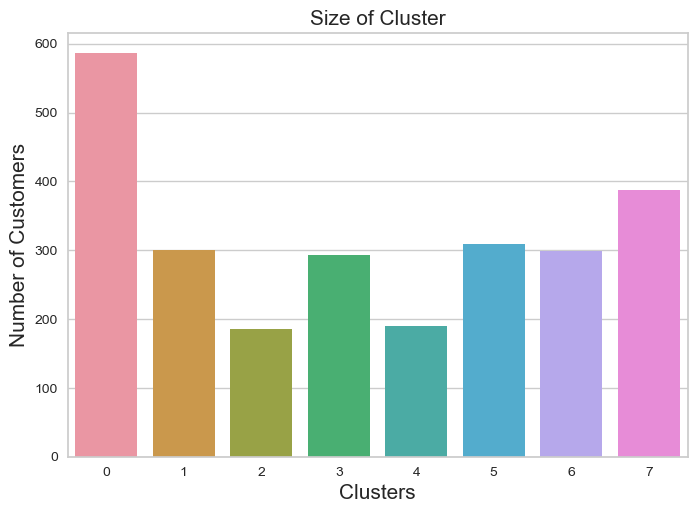

In [144]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df1, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)




# display the plot
plt.show()

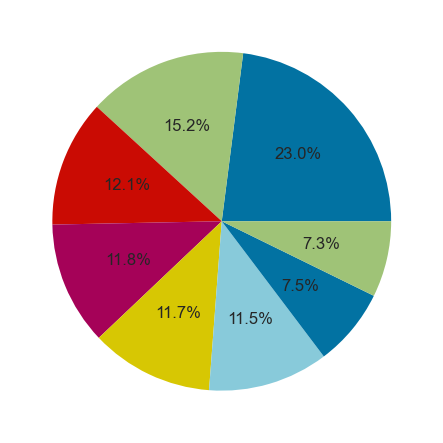

In [145]:
plt.pie(df1['Cluster'].value_counts(),autopct='%1.1f%%')
plt.show()